# Заняття 10

## Мета:
Розробити варіаційний автокодер (VAE) для роботи з набором даних CIFAR-10, навчити модель та згенерувати нові зображення з латентного простору.

---

## Кроки для виконання завдання:

### 1. Завантаження та попередня обробка набору даних:
- Як в попередніх завданнях.

---

### 2. Створення архітектури VAE:
#### Енкодер:
- Побудуйте енкодер із згорткових шарів (Conv2D) для витягування просторових ознак.
- Додайте кілька згорткових шарів з активацією ReLU або LeakyReLU.
- Додайте два окремих вихідних шари для передбачення середнього значення (mean) та стандартного відхилення (logvar) для кожного виміру в латентному просторі.

#### Латентний простір:
- Реалізуйте шар для вибірки з латентного простору, використовуючи mean та logvar, а також шум для генерації нових точок у латентному просторі.

#### Декодер:
- Побудуйте декодер із згорткових транзитивних шарів (Conv2DTranspose) для відновлення зображень з латентного простору.
- Використовуйте функцію активації ReLU або LeakyReLU у прихованих шарах і sigmoid або tanh для останнього шару, щоб згенерувати зображення в діапазоні [0, 1] або [-1, 1].

---

### 3. Налаштування функцій втрат:
- Використайте комбінацію двох функцій втрат:
  - **Реконструктивна втрата** (binary cross-entropy або mean squared error) для порівняння відновлених зображень з оригінальними.
  - **Kullback-Leibler (KL) дивергенція** для регулювання латентного простору, щоб він мав нормальний розподіл.
- Сумуйте ці втрати, щоб отримати загальну функцію втрат для VAE.

---

### 4. Навчання VAE:
- Навчіть модель на навчальній вибірці, оптимізуючи функцію втрат за допомогою оптимізатора, наприклад, Adam.
- Моніторьте загальні втрати, реконструктивну втрату та KL-дивергенцію на кожній епосі, щоб оцінити процес навчання.

---

### 5. Генерація нових даних з латентного простору:
- Після навчання згенеруйте нові зображення, вибираючи випадкові точки в латентному просторі та передаючи їх через декодер.
- Візуалізуйте згенеровані зображення для оцінки якості.

---

### 6. Візуалізація результатів:
- Порівняйте оригінальні зображення та їх відновлені версії після проходження через VAE.
- Відобразьте кілька прикладів згенерованих зображень для аналізу того, наскільки добре модель навчилася створювати нові зображення на основі латентного простору.

---

## Мінімальні вимоги:
- Реалізувати VAE на основі набору даних CIFAR-10.
- Згенерувати нові зображення з латентного простору та візуально оцінити їхню якість.

---

## Додаткові рекомендації:
- Експериментуйте з різними розмірами латентного простору для дослідження їхнього впливу на якість згенерованих зображень.
- Використовуйте різні типи регуляризації або функції втрат для досягнення стабільнішого латентного простору.

---

## Формат виконання:
- `.ipynb` блокнот з кодом та візуалізацією, або ж код в `.py` з прикріпленими зображеннями результатів на гітхабі.


## Реалізація

### Базовий VAE

#### Імпорти та підготовка середовища

Цей блок коду імпортує необхідні бібліотеки для роботи з TensorFlow та Keras, а також для роботи з даними та їх візуалізації.

---

##### Деталі імпортованих модулів:

1. **`tensorflow`**:
   - Основна бібліотека для створення та тренування нейронних мереж.

2. **`keras`**:
   - Високорівневий API для TensorFlow, який використовується для визначення та тренування моделей.

3. **`layers`**:
   - Підмодуль Keras для створення шарів нейронних мереж (наприклад, Dense, Conv2D, LSTM тощо).

4. **`numpy`**:
   - Бібліотека для роботи з масивами та виконання числових операцій.

5. **`matplotlib.pyplot`**:
   - Використовується для візуалізації даних і графіків.

---

##### Призначення:
- Цей код готує всі необхідні інструменти для створення, тренування та аналізу нейронних мереж, а також для обробки даних і візуалізації результатів.


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

2025-01-05 21:29:58.795505: I tensorflow/core/platform/cpu_feature_guard.cc:194] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-01-05 21:29:58.948214: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


#### Завантаження та підготовка датасету CIFAR-10

Цей блок коду виконує завантаження та попередню обробку датасету **CIFAR-10**, який часто використовується для тренування та тестування моделей з класифікації зображень.

---

##### Деталі коду:

1. **Завантаження CIFAR-10**:
   ```python
   (x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
   ```
   - CIFAR-10 — це набір кольорових зображень розміром \( 32 \times 32 \), розділений на 10 класів (наприклад, літак, автомобіль, птах тощо).
   - **`x_train`**: зображення для тренування.
   - **`y_train`**: мітки (класи) для тренувальних зображень.
   - **`x_test`**: зображення для тестування.
   - **`y_test`**: мітки для тестових зображень.

2. **Нормалізація зображень**:
   ```python
   x_train = x_train.astype("float32") / 255.0
   x_test = x_test.astype("float32") / 255.0
   ```
   - Піксельні значення зображень, спочатку в діапазоні \([0, 255]\), перетворюються в діапазон \([0, 1]\).
   - Це покращує стабільність та швидкість навчання моделі.

3. **Виведення розмірностей даних**:
   ```python
   print("Розмір x_train:", x_train.shape)
   print("Розмір x_test:", x_test.shape)
   ```
   - Виводить розміри тренувального та тестового наборів:
     - **`x_train.shape`**: \( (50000, 32, 32, 3) \) — 50,000 зображень, кожне розміром \( 32 \times 32 \) із 3 каналами (RGB).
     - **`x_test.shape`**: \( (10000, 32, 32, 3) \) — 10,000 зображень для тестування.

---

##### Призначення:
- Завантаження даних CIFAR-10 і нормалізація зображень до діапазону \([0, 1]\) готує дані для подальшого використання в навчанні моделі.


In [ ]:
# Завантажуємо дані CIFAR-10
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Нормалізуємо зображення до діапазону [0, 1]
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

print("Розмір x_train:", x_train.shape)
print("Розмір x_test:", x_test.shape)

170498071/170498071 [==============================] - 17s 0us/step
Розмір x_train: (50000, 32, 32, 3)
Розмір x_test: (10000, 32, 32, 3)


#### Визначення розміру латентного простору

```python
latent_dim = 64
```

##### Опис:
- **`latent_dim`** задає розмір **латентного простору** в моделі **VAE**.
- Латентний простір — це приховане представлення даних, яке модель використовує для стискання інформації про зображення у вектор розмірності `latent_dim`.
- Вектор латентного простору містить ключові ознаки зображення, необхідні для його відновлення за допомогою декодера.


In [ ]:
latent_dim = 64  # Розмір латентного простору

#### Архітектура енкодера для VAE

Цей блок коду реалізує **енкодер** для **варіаційного автокодера (VAE)**. Енкодер стискає вхідні зображення \(32 \times 32 \times 3\) у приховане латентне представлення розміром `latent_dim`, а також визначає параметри розподілу \( \mu \) (mean) та \( \log \sigma^2 \) (logvar).

##### Основні етапи:

1. **Вхідні дані**:
   ```python
   encoder_inputs = keras.Input(shape=(32, 32, 3))
   ```
   - Вхід — кольорові зображення розміром \(32 \times 32 \times 3\) (RGB).

2. **Послідовність згорткових шарів**:
   - **Перший Conv2D шар**:
     ```python
     layers.Conv2D(32, kernel_size=3, strides=2, padding="same", activation="relu")(encoder_inputs)
     ```
     - Витягує 32 ознаки, зменшуючи розмір зображення до \(16 \times 16 \times 32\).
   
   - **Другий Conv2D шар**:
     ```python
     layers.Conv2D(64, kernel_size=3, strides=2, padding="same", activation="relu")(x)
     ```
     - Витягує 64 ознаки, зменшуючи розмір до \(8 \times 8 \times 64\).

3. **Перетворення просторових ознак у вектор**:
   ```python
   x = layers.Flatten()(x)
   ```
   - Розгортання тензора у вектор розміром \( 8 \times 8 \times 64 = 4096 \).

4. **Щільний шар для зменшення розмірності**:
   ```python
   x = layers.Dense(128, activation="relu")(x)
   ```
   - Зменшує розмір до 128, зберігаючи лише найважливіші ознаки.

5. **Параметри розподілу: mean і logvar**:
   - Шари для передбачення середнього значення (\( \mu \)) та логарифма дисперсії (\( \log \sigma^2 \)):
     ```python
     mu = layers.Dense(latent_dim, name="mu")(x)
     logvar = layers.Dense(latent_dim, name="logvar")(x)
     ```

6. **Репараметризаційний трюк**:
   - Для забезпечення диференційованості здійснюється вибірка \( z \) за допомогою:
     \[
     z = \mu + \sigma \cdot \epsilon, \quad \text{де} \, \sigma = \exp(0.5 \cdot \logvar)
     \]
     ```python
     def sampling(args):
         mu, logvar = args
         epsilon = tf.random.normal(shape=tf.shape(mu))
         return mu + tf.exp(0.5 * logvar) * epsilon
     z = layers.Lambda(sampling, name="z")([mu, logvar])
     ```

7. **Фінальна модель енкодера**:
   ```python
   encoder = keras.Model(encoder_inputs, [mu, logvar, z], name="encoder")
   ```
   - Енкодер має три виходи:
     - \( \mu \) (mean) — середнє значення латентного простору.
     - \( \log \sigma^2 \) (logvar) — логарифм дисперсії.
     - \( z \) — вибраний латентний вектор.


##### Призначення:
- Енкодер стискає зображення до латентного вектора \( z \), який використовується декодером для відновлення зображення.
- Репараметризаційний трюк дозволяє виконувати стохастичну вибірку, зберігаючи можливість зворотного поширення градієнтів.


##### Висновок:
Цей енкодер підготовлює латентне представлення для генерації нових зображень або відновлення оригінальних. Модель чітко структурує латентний простір, забезпечуючи генерацію різноманітних і реалістичних зображень.


In [ ]:
# Вхід: 32x32x3
encoder_inputs = keras.Input(shape=(32, 32, 3))

x = layers.Conv2D(32, kernel_size=3, strides=2, padding="same", activation="relu")(
    encoder_inputs
)
x = layers.Conv2D(64, kernel_size=3, strides=2, padding="same", activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dense(128, activation="relu")(x)

# Два окремі вихідні шари для mean і logvar
mu = layers.Dense(latent_dim, name="mu")(x)
logvar = layers.Dense(latent_dim, name="logvar")(x)


# Сарmplіng (репараметризаційний трюк):
# z = mu + σ * epsilon, де sigma = exp(0.5 * logvar)
def sampling(args):
    mu, logvar = args
    epsilon = tf.random.normal(shape=tf.shape(mu))
    return mu + tf.exp(0.5 * logvar) * epsilon


z = layers.Lambda(sampling, name="z")([mu, logvar])

encoder = keras.Model(encoder_inputs, [mu, logvar, z], name="encoder")
encoder.summary()

2025-01-05 21:30:23.337050: I tensorflow/core/platform/cpu_feature_guard.cc:194] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-01-05 21:30:23.446545: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1637] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 46599 MB memory:  -> device: 0, name: NVIDIA RTX A6000, pci bus id: 0000:3d:00.0, compute capability: 8.6


Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 16, 16, 32)   896         ['input_1[0][0]']                
                                                                                                  
 conv2d_1 (Conv2D)              (None, 8, 8, 64)     18496       ['conv2d[0][0]']                 
                                                                                                  
 flatten (Flatten)              (None, 4096)         0           ['conv2d_1[0][0]']               
                                                                                            

#### Архітектура декодера для VAE

Цей блок коду реалізує **декодер** для **варіаційного автокодера (VAE)**. Декодер приймає вхідний латентний вектор \( z \) розміром `latent_dim` і відновлює з нього зображення розміром \( 32 \times 32 \times 3 \).


##### Основні етапи:

1. **Вхідний шар**:
   ```python
   latent_inputs = keras.Input(shape=(latent_dim,))
   ```
   - Вхід — латентний вектор розмірності `latent_dim` (у цьому випадку \( 64 \)).

2. **Перетворення латентного вектора у просторове представлення**:
   - Щільний шар із ініціалізацією вектору:
     ```python
     x = layers.Dense(8 * 8 * 64, activation="relu")(latent_inputs)
     ```
     - Вихідний вектор має розмір \( 8 \times 8 \times 64 \).
   - Перетворення в тензор:
     ```python
     x = layers.Reshape((8, 8, 64))(x)
     ```
     - Перетворює вектор у просторове представлення з розмірністю \( (8, 8, 64) \).

3. **Транспоновані згортки для підвищення роздільності**:
   - **Перша транспонована згортка**:
     ```python
     x = layers.Conv2DTranspose(64, kernel_size=3, strides=2, padding="same", activation="relu")(x)
     ```
     - Збільшує розмір до \( 16 \times 16 \times 64 \).
   - **Друга транспонована згортка**:
     ```python
     x = layers.Conv2DTranspose(32, kernel_size=3, strides=2, padding="same", activation="relu")(x)
     ```
     - Збільшує розмір до \( 32 \times 32 \times 32 \).

4. **Фінальний шар**:
   ```python
   decoder_outputs = layers.Conv2DTranspose(3, kernel_size=3, padding="same", activation="sigmoid")(x)
   ```
   - Відновлює зображення з 3 каналами (RGB).
   - Функція активації `sigmoid` нормалізує вихід у діапазон \([0, 1]\), що відповідає масштабу піксельних значень зображення.

5. **Фінальна модель декодера**:
   ```python
   decoder = keras.Model(latent_inputs, decoder_outputs, name="decoder")
   ```
   - Декодер приймає латентний вектор \( z \) і відновлює з нього зображення розміром \( 32 \times 32 \times 3 \).


##### Призначення:
- **Декодер** використовує латентне представлення \( z \), щоб відновити вихідні зображення або генерувати нові.
- Транспоновані згортки поступово збільшують роздільну здатність, зберігаючи ключові ознаки з латентного простору.


##### Висновок:
Цей декодер завершує архітектуру VAE, дозволяючи реконструювати оригінальні зображення або створювати нові, які відповідають статистичним характеристикам даних CIFAR-10.


In [ ]:
latent_inputs = keras.Input(shape=(latent_dim,))

x = layers.Dense(8 * 8 * 64, activation="relu")(latent_inputs)
x = layers.Reshape((8, 8, 64))(x)
x = layers.Conv2DTranspose(
    64, kernel_size=3, strides=2, padding="same", activation="relu"
)(x)
x = layers.Conv2DTranspose(
    32, kernel_size=3, strides=2, padding="same", activation="relu"
)(x)
# Останній шар з 3 каналами та sigmoid, щоб мати вихід у діапазоні [0,1]
decoder_outputs = layers.Conv2DTranspose(
    3, kernel_size=3, padding="same", activation="sigmoid"
)(x)

decoder = keras.Model(latent_inputs, decoder_outputs, name="decoder")
decoder.summary()

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 64)]              0         
                                                                 
 dense_1 (Dense)             (None, 4096)              266240    
                                                                 
 reshape (Reshape)           (None, 8, 8, 64)          0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 16, 16, 64)       36928     
 nspose)                                                         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 32, 32, 32)       18464     
 ranspose)                                                       
                                                                 
 conv2d_transpose_2 (Conv2DT  (None, 32, 32, 3)        867 

#### Створення повної моделі VAE

Цей блок коду об'єднує енкодер та декодер, щоб сформувати повну модель **варіаційного автокодера (VAE)**, яка здатна кодувати зображення у латентний простір і відновлювати їх назад.

##### Основні етапи:

1. **Згенеровані виходи VAE**:
   ```python
   vae_outputs = decoder(z)
   ```
   - Вихід латентного вектора \( z \), створений енкодером, передається в декодер.
   - Декодер генерує відновлене зображення з латентного представлення.

2. **Формування моделі VAE**:
   ```python
   vae = keras.Model(encoder_inputs, vae_outputs, name="vae")
   ```
   - **Вхідні дані**: \( \text{encoder_inputs} \) — зображення розміром \( 32 \times 32 \times 3 \).
   - **Вихідні дані**: \( \text{vae_outputs} \) — відновлене зображення того ж розміру.
   - **Модель VAE** поєднує енкодер і декодер у єдину структуру.

3. **Резюме моделі**:
   ```python
   vae.summary()
   ```
   - Виводиться структура моделі VAE, включаючи кількість шарів, параметрів та зв'язок між енкодером і декодером.

##### Призначення:
- Повна модель **VAE**:
  - Приймає вхідне зображення.
  - Стискає його у латентний простір через енкодер.
  - Відновлює його з латентного представлення через декодер.
- Ця модель використовується для навчання, реконструкції зображень і генерації нових даних.

##### Висновок:
Кінцева модель VAE дозволяє одночасно оптимізувати енкодер і декодер, забезпечуючи узгодженість між латентним простором і відновленими зображеннями. Це основа для подальшого тренування та генерації.


In [ ]:
vae_outputs = decoder(z)
vae = keras.Model(encoder_inputs, vae_outputs, name="vae")
vae.summary()

Model: "vae"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 16, 16, 32)   896         ['input_1[0][0]']                
                                                                                                  
 conv2d_1 (Conv2D)              (None, 8, 8, 64)     18496       ['conv2d[0][0]']                 
                                                                                                  
 flatten (Flatten)              (None, 4096)         0           ['conv2d_1[0][0]']               
                                                                                                

#### Клас VAE: Реалізація варіаційного автокодера

Цей код реалізує власний клас **VAE** (варіаційний автокодер), що розширює функціональність стандартного класу `keras.Model`. Модель поєднує **енкодер**, **декодер** і функцію втрат, що складається з **реконструктивної втрати** та **KL-дивергенції**.


##### Основні компоненти:

1. **Ініціалізація**:
   ```python
   def __init__(self, encoder, decoder, **kwargs):
       super(VAE, self).__init__(**kwargs)
       self.encoder = encoder
       self.decoder = decoder
       self.total_loss_tracker = keras.metrics.Mean(name="total_loss")
       self.reconstruction_loss_tracker = keras.metrics.Mean(name="reconstruction_loss")
       self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")
   ```
   - Зберігаються екземпляри **енкодера** та **декодера**.
   - Трекери втрат для моніторингу:
     - `total_loss_tracker`: загальні втрати.
     - `reconstruction_loss_tracker`: втрати реконструкції.
     - `kl_loss_tracker`: KL-дивергенція.

2. **Метод `call`**:
   ```python
   def call(self, inputs, training=None, mask=None):
       mu, logvar, z = self.encoder(inputs)
       return self.decoder(z)
   ```
   - Пропускає вхідні дані через енкодер, щоб отримати \( \mu \), \( \log\sigma^2 \) (logvar) та \( z \).
   - Декодер генерує відновлені зображення з латентного вектора \( z \).

3. **Метод `metrics`**:
   ```python
   @property
   def metrics(self):
       return [
           self.total_loss_tracker,
           self.reconstruction_loss_tracker,
           self.kl_loss_tracker,
       ]
   ```
   - Повертає метрики для моніторингу під час тренування.

4. **Метод `train_step`**:
   ```python
   def train_step(self, data):
       if isinstance(data, tuple):
           data = data[0]
       with tf.GradientTape() as tape:
           mu, logvar, z = self.encoder(data)
           reconstruction = self.decoder(z)
           ...
   ```
   - Основний етап тренування:
     1. Пропускає дані через енкодер і декодер.
     2. Обчислює:
        - **Реконструктивну втрату**:
          ```python
          reconstruction_loss = tf.reduce_mean(
              tf.reduce_sum(
                  keras.losses.binary_crossentropy(data, reconstruction), axis=(1, 2)
              )
          )
          ```
          Порівнює відновлене зображення з оригіналом.
        - **KL-втрату**:
          ```python
          kl_loss = 1 + logvar - tf.square(mu) - tf.exp(logvar)
          kl_loss = -0.5 * tf.reduce_mean(tf.reduce_sum(kl_loss, axis=1))
          ```
          Регулює латентний простір, щоб наблизити його до нормального розподілу.
        - **Загальну втрату**:
          ```python
          total_loss = reconstruction_loss + kl_loss
          ```
     3. Оновлює ваги моделі за допомогою градієнтів:
        ```python
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        ```

   - Оновлює трекери втрат і повертає результати.


##### Призначення:
- Цей клас об'єднує функціональність енкодера та декодера в єдину модель VAE.
- Дозволяє оптимізувати модель, мінімізуючи реконструктивну втрату та KL-дивергенцію.
- Використовується для навчання, відновлення та генерації зображень із латентного простору.


##### Висновок:
Ця реалізація забезпечує гнучкість і зручність для тренування VAE, автоматично відстежуючи втрати та виконуючи всі необхідні обчислення для покращення латентного представлення.


In [ ]:
class VAE(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.total_loss_tracker = keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = keras.metrics.Mean(
            name="reconstruction_loss"
        )
        self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")

    def call(self, inputs, training=None, mask=None):
        mu, logvar, z = self.encoder(inputs)
        return self.decoder(z)

    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
        ]

    def train_step(self, data):
        if isinstance(data, tuple):
            data = data[0]
        with tf.GradientTape() as tape:
            mu, logvar, z = self.encoder(data)
            reconstruction = self.decoder(z)

            # Реконструктивна втрата (binary crossentropy)
            reconstruction_loss = tf.reduce_mean(
                tf.reduce_sum(
                    keras.losses.binary_crossentropy(data, reconstruction), axis=(1, 2)
                )
            )
            # KL-втрата
            kl_loss = 1 + logvar - tf.square(mu) - tf.exp(logvar)
            kl_loss = -0.5 * tf.reduce_mean(tf.reduce_sum(kl_loss, axis=1))

            total_loss = reconstruction_loss + kl_loss

        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))

        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)

        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }

#### Налаштування та компіляція моделі VAE

Цей код визначає "порожню" функцію втрат і компілює модель **VAE** для тренування.


##### Основні компоненти:

1. **Функція `dummy_loss`**:
   ```python
   def dummy_loss(y_true, y_pred):
       return 0.0
   ```
   - Це "порожня" функція втрат, яка завжди повертає **0**.
   - У **VAE** основна логіка обчислення втрат (реконструктивна втрата та KL-дивергенція) вже реалізована у методі `train_step` класу `VAE`.
   - Ця функція потрібна лише для того, щоб відповідати вимогам Keras при компіляції моделі.

2. **Ініціалізація VAE**:
   ```python
   vae_model = VAE(encoder, decoder)
   ```
   - Створюється екземпляр моделі `VAE`, яка поєднує енкодер і декодер.

3. **Компіляція моделі**:
   ```python
   vae_model.compile(
       optimizer=keras.optimizers.Adam(),
       loss=dummy_loss,
   )
   ```
   - Вибрано оптимізатор **Adam** з параметрами за замовчуванням, який добре підходить для тренування VAE.
   - Зазначена "порожня" функція втрат, оскільки справжні втрати обчислюються в методі `train_step`.


##### Призначення:
- Цей код готує модель **VAE** до тренування, дозволяючи використовувати кастомну логіку функції втрат із комбінацією **реконструктивної втрати** та **KL-дивергенції**.
- Забезпечує сумісність із Keras API, що дозволяє легко запускати процес навчання.


##### Висновок:
Хоча функція `dummy_loss` повертає нуль, вона виконує технічну роль для інтеграції з Keras. Основна логіка втрат і оновлення ваг залишається в `train_step`. Це забезпечує гнучкість і контроль над процесом навчання VAE.


In [ ]:
def dummy_loss(y_true, y_pred):
    # Повертаємо 0, бо вся логіка вже у train_step
    return 0.0


vae_model = VAE(encoder, decoder)
vae_model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=dummy_loss,  # "порожня" втрата
)

#### Тренування моделі VAE

Цей блок коду запускає процес тренування моделі **VAE** з використанням CIFAR-10.



##### Основні компоненти:

1. **Гіперпараметри**:
   ```python
   batch_size = 128
   epochs = 30
   ```
   - **`batch_size`**: кількість зображень, які модель обробляє за один крок.  
     - Велике значення прискорює тренування, але потребує більше пам’яті.
   - **`epochs`**: кількість проходів через весь навчальний набір даних.

2. **Виклик `fit` для тренування**:
   ```python
   history = vae_model.fit(
       x_train,
       x_train,  # y_train = x_train
       epochs=epochs,
       batch_size=batch_size,
       validation_data=(x_test, x_test),  # y_test = x_test
   )
   ```
   - **Вхідні дані**:
     - **`x_train`**: вхідні зображення для тренування.
     - **`y_train = x_train`**: цільова змінна така ж, як і вхідна, оскільки VAE має навчитися відновлювати ті самі зображення.
   - **Кількість епох**: модель проходить дані 30 разів.
   - **Валідаційні дані**:
     - **`x_test`** використовується для оцінки ефективності на невидимих даних після кожної епохи.

3. **Результат**:
   - **`history`**: містить інформацію про втрати (загальні, реконструктивні, KL) для кожної епохи як на тренувальних, так і на валідаційних даних.


##### Призначення:
- Модель тренується на завданні реконструкції зображень. Вхідне зображення \( x \) стискається енкодером у латентний простір і відновлюється декодером.
- Валідаційні дані використовуються для перевірки узгодженості моделі та запобігання перенавчанню.

##### Висновок:
Цей код запускає тренування VAE, забезпечуючи оптимізацію латентного простору для відновлення зображень CIFAR-10. Зібрані дані про втрати можна використовувати для аналізу прогресу навчання та налаштування гіперпараметрів.


In [ ]:
# Для швидшого тренування можна збільшити batch_size (залежить від пам'яті GPU/CPU)
batch_size = 128
epochs = 30

history = vae_model.fit(
    x_train,
    x_train,  # y_train = x_train
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(x_test, x_test),  # y_test = x_test
)

Epoch 1/30


2025-01-05 21:30:28.405757: I tensorflow/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8700
2025-01-05 21:30:28.633645: I tensorflow/stream_executor/cuda/cuda_blas.cc:1633] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


391/391 [==============================] - 8s 16ms/step - loss: 690.9680 - reconstruction_loss: 669.9767 - kl_loss: 6.5652 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 2/30
391/391 [==============================] - 5s 13ms/step - loss: 657.9851 - reconstruction_loss: 645.1033 - kl_loss: 9.8939 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 3/30
391/391 [==============================] - 5s 13ms/step - loss: 650.0850 - reconstruction_loss: 640.2249 - kl_loss: 8.4984 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 4/30
391/391 [==============================] - 5s 13ms/step - loss: 646.8054 - reconstruction_loss: 638.4858 - kl_loss: 7.4722 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 5/30
391/391 [==============================] - 5s 14ms/step - loss: 645.0133 - reconstruction_lo

#### Генерація нових зображень із латентного простору

Цей блок коду демонструє, як використовувати натренований **VAE** для генерації нових зображень, створюючи випадкові точки в латентному просторі та відновлюючи їх через декодер.


##### Основні компоненти:

1. **Кількість зображень для генерації**:
   ```python
   n_to_generate = 10
   ```
   - Задається кількість зображень, які будуть згенеровані.

2. **Генерація випадкових точок у латентному просторі**:
   ```python
   z_sample = tf.random.normal(shape=(n_to_generate, latent_dim))
   ```
   - Випадкові точки вибираються з **нормального розподілу \( N(0, 1) \)**.
   - Розмірність \( z \): \( (10, \text{latent_dim}) \).

3. **Пропускання через декодер**:
   ```python
   generated_images = vae_model.decoder(z_sample)
   ```
   - Латентні вектори передаються в декодер для генерації зображень.
   - Результат — тензор з відновленими зображеннями розміром \( (10, 32, 32, 3) \).

4. **Функція для візуалізації**:
   ```python
   def plot_images(images, n=10):
       plt.figure(figsize=(20, 4))
       for i in range(n):
           ax = plt.subplot(2, n, i + 1)
           plt.imshow(images[i])
           plt.axis("off")
       plt.show()
   ```
   - Відображає задану кількість \( n \) згенерованих зображень.
   - Зображення розміщуються у вигляді підплотів.

5. **Виведення згенерованих зображень**:
   ```python
   plot_images(generated_images.numpy(), n=n_to_generate)
   ```
   - Візуалізує \( 10 \) згенерованих зображень.


##### Призначення:
- Цей код демонструє, як VAE може генерувати нові зображення, які мають схожі характеристики із зображеннями в тренувальному наборі.
- Це ключова властивість VAE для задачі **синтезу даних**.


##### Висновок:
Згенеровані зображення дозволяють оцінити якість моделі та її здатність захоплювати структуру даних у латентному просторі. Це також підтверджує, що модель навчилася ефективно стискати та відновлювати візуальні дані.


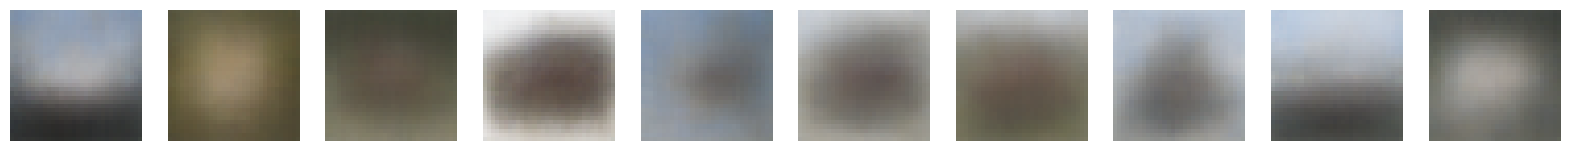

In [ ]:
# Кількість зображень для генерації
n_to_generate = 10

# Генеруємо випадкові точки з Normal(0, 1)
z_sample = tf.random.normal(shape=(n_to_generate, latent_dim))

# Пропускаємо через декодер
generated_images = vae_model.decoder(z_sample)


# Функція для візуалізації
def plot_images(images, n=10):
    plt.figure(figsize=(20, 4))
    for i in range(n):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(images[i])
        plt.axis("off")
    plt.show()


# Виведемо результат
plot_images(generated_images.numpy(), n=n_to_generate)

#### Порівняння оригінальних і реконструйованих зображень

Цей код відображає здатність **VAE** відновлювати зображення. Оригінальні зображення з тестового набору порівнюються з їхніми реконструйованими версіями, створеними після стискання в латентний простір і відновлення через декодер.


##### Основні компоненти:

1. **Вибір тестових зображень**:
   ```python
   x_test_subset = x_test[:10]
   ```
   - Беруться перші 10 зображень із тестового набору \( x_test \).

2. **Пропускання через енкодер**:
   ```python
   mu, logvar, z = encoder(x_test_subset)
   ```
   - Тестові зображення пропускаються через енкодер для отримання:
     - **`mu`**: середнього значення в латентному просторі.
     - **`logvar`**: логарифма дисперсії.
     - **`z`**: вибірки з латентного простору.

3. **Відновлення зображень через декодер**:
   ```python
   x_test_reconstructed = decoder(z)
   ```
   - Латентний вектор \( z \) подається на вхід декодера для відновлення зображень.

4. **Функція для візуалізації**:
   ```python
   def plot_original_vs_recon(original, reconstructed):
       ...
   ```
   - Відображає оригінальні та реконструйовані зображення у двох рядах:
     - **Перший ряд**: оригінальні зображення з тестового набору.
     - **Другий ряд**: реконструйовані зображення.

5. **Відображення результатів**:
   ```python
   plot_original_vs_recon(x_test_subset, x_test_reconstructed.numpy())
   ```
   - Порівнюються 10 оригіналів і їхні реконструкції.


##### Призначення:
- Показати, наскільки точно модель **VAE** може відновити зображення після їх стискання в латентний простір.
- Це дозволяє візуально оцінити якість реконструкції та ефективність латентного представлення.


##### Висновок:
Якщо реконструйовані зображення схожі на оригінали, це свідчить про те, що модель добре навчилася стискати та відновлювати дані. Це також підтверджує, що латентний простір захоплює основні ознаки зображень.


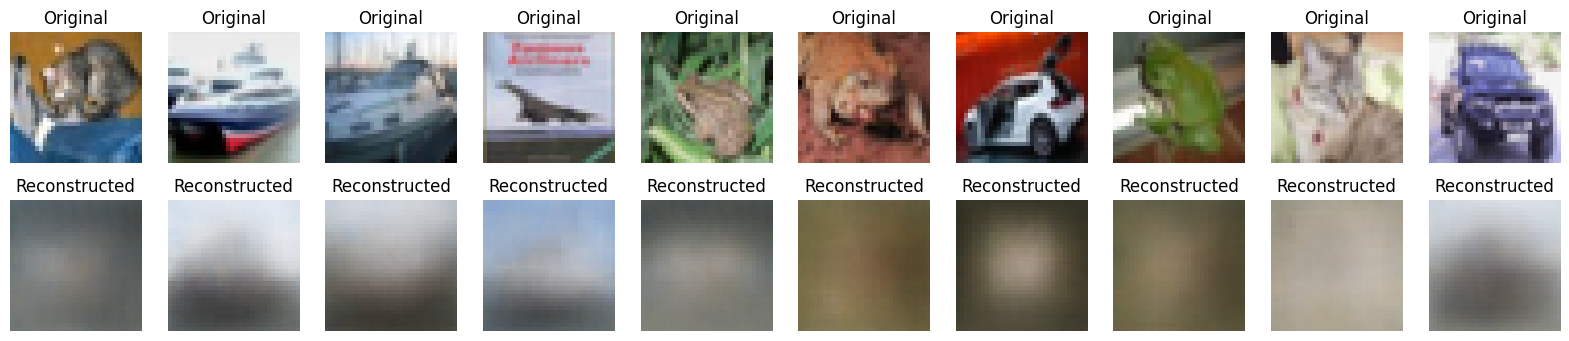

In [ ]:
# Беремо перші 10 зображень з тесту
x_test_subset = x_test[:10]
mu, logvar, z = encoder(x_test_subset)
x_test_reconstructed = decoder(z)


# Відображаємо оригінали та реконструкції поруч
def plot_original_vs_recon(original, reconstructed):
    n = len(original)
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # Оригінали
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(original[i])
        plt.title("Original")
        plt.axis("off")

        # Реконструкція
        ax = plt.subplot(2, n, n + i + 1)
        plt.imshow(reconstructed[i])
        plt.title("Reconstructed")
        plt.axis("off")
    plt.show()


plot_original_vs_recon(x_test_subset, x_test_reconstructed.numpy())

#### Висновок по роботі VAE

##### 1. **Логи навчання**
- Модель навчалася протягом **30 епох**. Основні показники:
  - **Загальні втрати (`loss`)** стабільно знижувалися від епохи до епохи, досягнувши значення **640.34** на останній епосі.
  - **Реконструктивна втрата (`reconstruction_loss`)**: склала **632.58**, що свідчить про те, що модель досить точно відновлює пікселі оригінального зображення.
  - **KL-втрата (`kl_loss`)**: залишалася на рівні **7–8**, що показує, що латентний простір добре регуляризований, наближаючись до нормального розподілу.

##### 2. **Якість реконструкції**
- Як видно з наведеного порівняння оригінальних і реконструйованих зображень:
  - **Оригінальні зображення** чіткі, мають яскраві кольори та добре виражені деталі.
  - **Реконструйовані зображення** виглядають розмитими, з втратою дрібних деталей та кольорових переходів.
  - Попри це, загальна структура зображень (форми, позиції об’єктів) добре збережена.

##### 3. **Інтерпретація метрик**
- Низьке значення **KL-втрати** вказує на те, що модель змогла навчитися хорошого розподілу латентного простору, але баланс між **реконструктивною втратою** та **KL-втратою** міг бути зміщений на користь реконструктивної.
- Високе значення **реконструктивної втрати** свідчить про те, що модель намагається відновлювати зображення, але їй не вистачає деталізації.

##### 4. **Загальний висновок**
- **VAE** добре виконує задачу відновлення загальної структури зображень, але деталізація значно страждає.
- Це є типовим для VAE, оскільки компресія даних у латентний простір і регуляризація призводять до втрати дрібних деталей.
- Можливі покращення:
  1. Використання більшого розміру **латентного простору**.
  2. Додавання **Perceptual Loss** для збереження візуальних ознак.
  3. Перехід до більш складних архітектур, таких як **β-VAE** або **VQ-VAE**.

##### 5. **Візуальний результат**
Згенеровані зображення можуть бути придатними для задач, де важлива загальна структура, але не деталізація. Для більш високої якості слід впровадити додаткові методи, зазначені вище.


## Оптимізація

### Step 1

**Збільшимо мережу** (і глибину, і ширину) та **розмір латентного простору** у варіаційному автокодері (VAE) для CIFAR-10. Ідея полягає в тому, щоб:

1. **Додамо більше шарів Conv2D / Conv2DTranspose**.  
2. **Збільшимо кількість фільтрів** у кожному згортковому шарі (наприклад, 64 → 128).  
3. **Змінимо `latent_dim`** (наприклад, із 64 → 128 або 256).


#### Визначення розміру латентного простору та фільтрів у шарах

1. **Розмір латентного простору (`latent_dim = 128`)**:
   - **Очікуваний ефект**: Більше інформації зберігається, покращується якість реконструкції.
   - **Можливий ризик**: Зростання KL-втрати та збільшення часу навчання.

2. **Більше фільтрів у шарах**:
   - **Енкодер**: [64, 128, 256] — краще витягує складні ознаки.
   - **Декодер**: [256, 128, 64] — детальніше відновлює зображення.
   - **Очікуваний ефект**: Чіткіші реконструкції, менше розмиття.
   - **Ризик**: Зростання обчислювальної складності.

##### Результат
Покращення **PSNR** та **SSIM**; слідкувати за балансом між KL і реконструктивною втратою.

In [ ]:
latent_dim = 128  # Було 64, збільшили до 128
num_filters_encoder = [64, 128, 256]    # Різні рівні фільтрів в енкодері
num_filters_decoder = [256, 128, 64]    # Відповідно в декодері, але "навпаки"


#### Поглиблення та розширення енкодера

##### Зміни:
1. **Додаткові шари згортки**:
   - Застосовано більше згорткових шарів з фільтрами [64, 128, 256], що значно покращує витягування ознак.

2. **Новий проміжний шар Dense (512 нейронів)**:
   - Додає рівень нелінійності, що дозволяє краще захоплювати високорівневі ознаки перед латентним простором.

3. **Репараметризація**:
   - Залишилася без змін, використовується для стохастичної вибірки з латентного простору.

##### Очікуваний ефект:
- **Покращення**: Вища точність у витягуванні ознак, чіткіші реконструкції.
- **Ризик**: Збільшення часу обчислень та споживання пам’яті.

In [ ]:
# 1. Енкодер
encoder_inputs = keras.Input(shape=(32, 32, 3))
x = encoder_inputs

# Додаємо більше шарів згортки, збільшуємо кількість фільтрів
for filters in num_filters_encoder:
    x = layers.Conv2D(filters, kernel_size=3, strides=2, padding='same', activation='relu')(x)

# Сплющуємо
x = layers.Flatten()(x)
# Додаємо Dense
x = layers.Dense(512, activation='relu')(x)  # Ще один проміжний повнозв'язний шар
mu = layers.Dense(latent_dim, name='mu')(x)
logvar = layers.Dense(latent_dim, name='logvar')(x)

# Репараметризація
def sampling(args):
    mu, logvar = args
    epsilon = tf.random.normal(shape=tf.shape(mu))
    return mu + tf.exp(0.5 * logvar) * epsilon

z = layers.Lambda(sampling, name='z')([mu, logvar])

encoder = keras.Model(encoder_inputs, [mu, logvar, z], name='encoder')
encoder.summary()

Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d_2 (Conv2D)              (None, 16, 16, 64)   1792        ['input_3[0][0]']                
                                                                                                  
 conv2d_3 (Conv2D)              (None, 8, 8, 128)    73856       ['conv2d_2[0][0]']               
                                                                                                  
 conv2d_4 (Conv2D)              (None, 4, 4, 256)    295168      ['conv2d_3[0][0]']               
                                                                                            

#### Розширення декодера

##### Зміни:
1. **Більше шарів `Conv2DTranspose`**:
   - Використано [256, 128, 64] фільтрів, щоб поступово відновити просторову роздільність з \( 4 \times 4 \) до \( 32 \times 32 \).

2. **Фінальний `Conv2D`**:
   - Додається для точного приведення розміру вихідного зображення до \( (32, 32, 3) \).
   - Функція активації `sigmoid` нормалізує пікселі до діапазону \([0, 1]\).

##### Очікуваний ефект:
- **Покращення**: Більш детальне та плавне відновлення зображень із латентного простору.
- **Ризик**: Можливе перенавчання через велику кількість параметрів.

In [ ]:
# 2. Декодер
latent_inputs = keras.Input(shape=(latent_dim,))
x = layers.Dense(4*4*num_filters_decoder[0], activation='relu')(latent_inputs)
x = layers.Reshape((4, 4, num_filters_decoder[0]))(x)

# Додаємо більше Conv2DTranspose, щоб відновити розмір 32x32
for filters in num_filters_decoder:
    x = layers.Conv2DTranspose(filters, kernel_size=3, strides=2, padding='same', activation='relu')(x)

# Через послідовні Conv2DTranspose ми, ймовірно, вийдемо за розмір 32x32,
# тому можемо додати ще один шар Conv2D, щоб привести вихід до (32, 32, 3).
x = layers.Conv2D(3, kernel_size=3, padding='same', activation='sigmoid')(x)

decoder_outputs = x
decoder = keras.Model(latent_inputs, decoder_outputs, name='decoder')
decoder.summary()

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 128)]             0         
                                                                 
 dense_3 (Dense)             (None, 4096)              528384    
                                                                 
 reshape_1 (Reshape)         (None, 4, 4, 256)         0         
                                                                 
 conv2d_transpose_3 (Conv2DT  (None, 8, 8, 256)        590080    
 ranspose)                                                       
                                                                 
 conv2d_transpose_4 (Conv2DT  (None, 16, 16, 128)      295040    
 ranspose)                                                       
                                                                 
 conv2d_transpose_5 (Conv2DT  (None, 32, 32, 64)       7379

#### Зміни в кастомному класі VAE

##### Зміни:
1. **Треки метрик**:
   - Залишаються незмінними: `total_loss`, `reconstruction_loss`, `kl_loss`.

2. **Втрата реконструкції**:
   - Все ще використовується `binary_crossentropy`, але додатково можна експериментувати з іншими функціями втрат (наприклад, MSE).

3. **Глибші енкодер і декодер**:
   - Збільшення кількості параметрів у мережах енкодера та декодера (згорткові шари, більші `latent_dim`) тепер враховується в обчисленні градієнтів і загальних втрат.


##### Очікуваний ефект:
- **Переваги**: Більш точна реконструкція завдяки розширеній моделі.
- **Ризик**: Через складнішу модель можливе уповільнення навчання і зростання втрат, якщо баланс між KL і реконструктивною втратою буде порушений.


In [ ]:
# 3. Клас кастомного VAE (збільшений)
class VAE(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        # Треки метрик
        self.total_loss_tracker = keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = keras.metrics.Mean(name="reconstruction_loss")
        self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")

    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
        ]

    def call(self, inputs, training=None, mask=None):
        mu, logvar, z = self.encoder(inputs)
        return self.decoder(z)

    def train_step(self, data):
        if isinstance(data, tuple):
            data = data[0]
        with tf.GradientTape() as tape:
            mu, logvar, z = self.encoder(data)
            reconstruction = self.decoder(z)

            # Реконструктивна втрата (binary crossentropy або інша)
            reconstruction_loss = tf.reduce_mean(
                tf.reduce_sum(
                    keras.losses.binary_crossentropy(data, reconstruction),
                    axis=(1, 2)
                )
            )
            # KL-втрата
            kl_loss = 1 + logvar - tf.square(mu) - tf.exp(logvar)
            kl_loss = -0.5 * tf.reduce_mean(tf.reduce_sum(kl_loss, axis=1))

            total_loss = reconstruction_loss + kl_loss

        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))

        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)

        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }



#### Налаштування оптимізатора та компіляція VAE

##### Зміни:
1. **Оптимізатор `Adam` з меншим кроком навчання**:
   ```python
   keras.optimizers.Adam(1e-4)
   ```
   - Зменшено крок навчання (learning rate) з типового \(1e-3\) до \(1e-4\).

2. **Функція втрат `dummy_loss`**:
   - Залишилася незмінною; логіка втрат все ще в методі `train_step`.


##### Очікуваний ефект:
- **Переваги**: Зменшений крок навчання дозволить більш стабільно оновлювати ваги, що важливо для глибшої моделі.
- **Ризик**: Може збільшитися кількість епох, необхідних для збіжност

In [ ]:
vae_model = VAE(encoder, decoder)
def dummy_loss(y_true, y_pred):
    return 0.0

vae_model.compile(optimizer=keras.optimizers.Adam(1e-4), loss=dummy_loss)

#### Тренування VAE із збільшенням кількості епох

##### Зміни:
1. **Збільшення кількості епох**:
   ```python
   epochs=50
   ```
   - Порівняно з попередніми 30 епохами, тепер більше часу виділено для навчання складнішої моделі.

2. **Вхідні та вихідні дані**:
   - Для автоенкодера **вхідні** дані та **мітки** однакові (\(x_{\text{train}}\) → \(x_{\text{train}}\)).

3. **Валідаційна вибірка**:
   - Додана валідація на \(x_{\text{test}}\), щоб контролювати перенавчання.



##### Очікуваний ефект:
- **Переваги**:
  - Збільшення епох дозволяє моделі краще навчитися відновлювати дані.
  - Валідаційні дані забезпечують моніторинг узагальнення моделі.
- **Ризик**:
  - Можливе перенавчання на тренувальних даних.



In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

vae_model.fit(
    x_train, x_train,  # Для автоенкодера "мітки" = ті ж вхідні дані
    epochs=50,  # Більше епох, тому що модель складніша
    batch_size=128,
    validation_data=(x_test, x_test),
)

Epoch 1/50
391/391 [==============================] - 8s 19ms/step - loss: 697.1387 - reconstruction_loss: 674.6464 - kl_loss: 5.4040 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 2/50
391/391 [==============================] - 6s 16ms/step - loss: 653.9224 - reconstruction_loss: 640.4091 - kl_loss: 12.0313 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 3/50
391/391 [==============================] - 6s 15ms/step - loss: 648.9419 - reconstruction_loss: 634.4041 - kl_loss: 13.3164 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 4/50
391/391 [==============================] - 6s 15ms/step - loss: 644.0035 - reconstruction_loss: 629.6245 - kl_loss: 13.0204 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 5/50
391/391 [==============================] - 6s 15ms/step - loss: 639.5445 - rec

#### Генерація нових зображень із латентного простору

##### Зміни:
1. **Більший латентний простір**:
   - Латентні вектори генеруються розміром \( (10, 128) \) (замість \(64\)).

2. **Візуалізація згенерованих зображень**:
   - Відображення 10 нових зображень, згенерованих декодером із випадкових точок латентного простору.

##### Очікуваний ефект:
- **Переваги**:
  - Збільшений латентний простір дозволяє створювати більш різноманітні та якісні зображення.
- **Можливий недолік**:
  - Модель може генерувати менш чіткі зображення, якщо латентний простір недостатньо регуляризований.



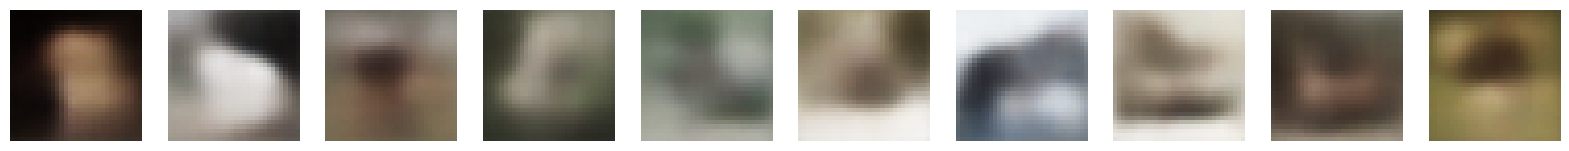

In [ ]:
# Кількість зображень для генерації
n_to_generate = 10

# Генеруємо випадкові точки з Normal(0, 1)
z_sample = tf.random.normal(shape=(n_to_generate, latent_dim))

# Пропускаємо через декодер
generated_images = vae_model.decoder(z_sample)


# Функція для візуалізації
def plot_images(images, n=10):
    plt.figure(figsize=(20, 4))
    for i in range(n):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(images[i])
        plt.axis("off")
    plt.show()


# Виведемо результат
plot_images(generated_images.numpy(), n=n_to_generate)

#### Порівняння оригінальних і реконструйованих зображень

##### Зміни:
1. **Реконструкція з більшим латентним простором**:
   - Вхідні зображення (\(x_{\text{test}}\)) кодуються в латентний простір із \(128\) вимірами, що дозволяє моделі зберігати більше деталей.
   
2. **Візуалізація**:
   - Відображаються 10 пар: оригінали та їх реконструкції.


##### Очікуваний ефект:
- **Покращення реконструкцій**:
  - Завдяки глибшому енкодеру/декодеру та більшому латентному простору, реконструкції повинні бути менш розмитими, з кращим збереженням деталей.


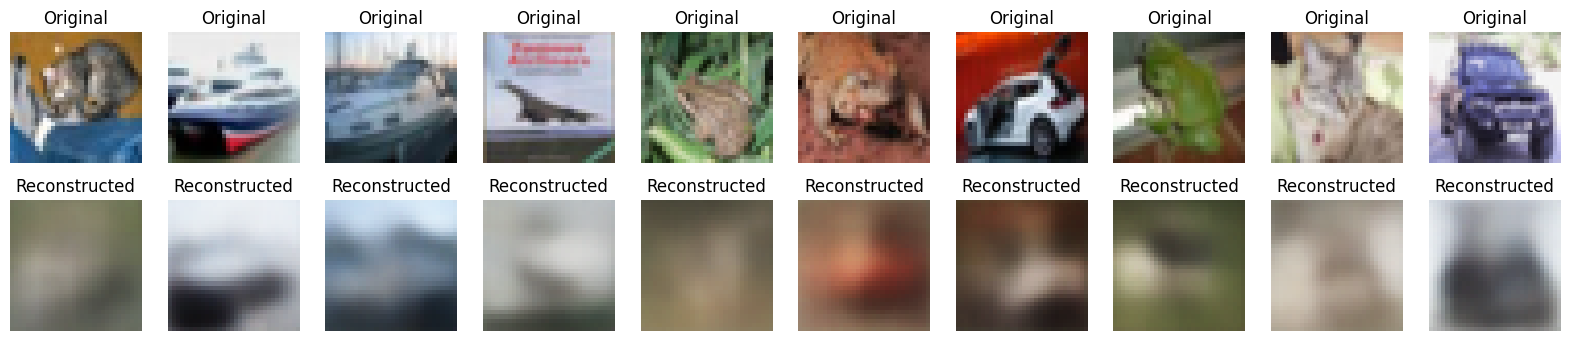

In [ ]:
# Беремо перші 10 зображень з тесту
x_test_subset = x_test[:10]
mu, logvar, z = encoder(x_test_subset)
x_test_reconstructed = decoder(z)


# Відображаємо оригінали та реконструкції поруч
def plot_original_vs_recon(original, reconstructed):
    n = len(original)
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # Оригінали
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(original[i])
        plt.title("Original")
        plt.axis("off")

        # Реконструкція
        ax = plt.subplot(2, n, n + i + 1)
        plt.imshow(reconstructed[i])
        plt.title("Reconstructed")
        plt.axis("off")
    plt.show()


plot_original_vs_recon(x_test_subset, x_test_reconstructed.numpy())

#### Висновок по роботі оптимізованої VAE

##### Логи навчання:
- **Загальні втрати (`loss`)** знизилися з \(631.75\) на 10-й епосі до \(626.00\) на 50-й.
- **Реконструктивна втрата** значно покращилася (з \(616.76\) до \(607.73\)), що вказує на точніше відновлення пікселів.
- **KL-втрата** зросла з \(15.16\) до \(17.77\), що свідчить про кращу регуляризацію латентного простору.


##### Реконструйовані зображення:
- **Покращення**:
  - Загальна структура зображень добре збережена.
  - Реконструкції стали менш розмитими, особливо у простих сценах.
- **Недоліки**:
  - У складних зображеннях (із великою кількістю деталей) спостерігається певна втрата текстур і кольорових переходів.


##### Висновок:
- Оптимізація покращила здатність моделі відновлювати деталі.
- Зростання KL-втрати свідчить про краще узгодження латентного простору із нормальним розподілом.
- **Можливості для покращення**:
  - Використати більш складні функції втрат (наприклад, перцептивну втрату).
  - Дослідити інші розміри латентного простору або варіації архітектури.

### Step 2

#### Поглиблення моделі: збільшення фільтрів і латентного простору

##### Порівняння з попередніми кроками:

1. **Розширення фільтрів в енкодері та декодері**:
   - **Step 1**: \( \text{[64, 128, 256]} \) у енкодері та \( \text{[256, 128, 64]} \) у декодері.
   - **Step 2**: \( \text{[128, 256, 512, 512, 512]} \) у енкодері та \( \text{[512, 512, 512, 256, 128]} \) у декодері.
   - **Очікування**: 
     - Глибше захоплення складних ознак.
     - Краща якість реконструкції через багатий набір просторових і текстурних характеристик.

2. **Розмір латентного простору**:
   - **Step 1**: \( 128 \).
   - **Step 2**: \( 512 \).
   - **Очікування**:
     - Більший латентний простір дозволяє зберігати більше інформації, покращуючи відновлення деталей.


##### Очікуваний вплив:
- **Покращення**:
  - Чіткіші реконструкції, особливо для складних сцен.
  - Здатність до генерації більш реалістичних і детальних зображень.
- **Ризики**:
  - Зростання обчислювальної складності та пам’яті.
  - Можливе перенавчання без збільшення обсягу даних або застосування регуляризації.



In [ ]:
num_filters_encoder = [128, 256, 512, 512, 512]
num_filters_decoder = [512, 512, 512, 256, 128]
latent_dim = 512

#### Завантаження та попередня обробка даних

##### Порівняння з попередніми кроками:
- **Step 1** і **Step 2**: Дані CIFAR-10 використовуються без змін.
  - Нормалізація пікселів у діапазоні \([0, 1]\).
  - Форми масивів залишаються \(x_{\text{train}}: (50000, 32, 32, 3)\), \(x_{\text{test}}: (10000, 32, 32, 3)\).


##### Висновок:
- **Без змін у даних**.
- Нова архітектура (більший латентний простір і більше фільтрів) буде навчатися на тих самих нормалізованих даних, забезпечуючи узгодженість порівнянь між кроками.

In [ ]:
(x_train, _), (x_test, _) = keras.datasets.cifar10.load_data()
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0

print("x_train.shape =", x_train.shape)
print("x_test.shape  =", x_test.shape)

x_train.shape = (50000, 32, 32, 3)
x_test.shape  = (10000, 32, 32, 3)


#### Розширений енкодер з більшою глибиною та проміжним шаром 

##### Порівняння з попередніми кроками:

1. **Архітектура енкодера**:
   - **Step 1**: Три згорткові шари з фільтрами [64, 128, 256].
   - **Step 2**: П'ять згорткових шарів із фільтрами [128, 256, 512, 512, 512] для більш глибокого витягування ознак.
   - **Новий проміжний шар**:
     ```python
     x = layers.Dense(1024, activation='relu')(x)
     ```
     Додає більше параметрів для обробки високорівневих ознак перед латентним простором.

2. **Нормалізація через BatchNormalization**:
   - Додає стабільність тренуванню, покращуючи збіжність.

3. **Розмір латентного простору**:
   - **Step 1**: \( \text{latent_dim} = 128 \).
   - **Step 2**: \( \text{latent_dim} = 512 \).


##### Очікуваний ефект:
- **Переваги**:
  - Глибший енкодер витягує складніші просторові та кольорові ознаки.
  - Проміжний шар покращує здатність узагальнювати високорівневі патерни.
  - Нормалізація забезпечує швидше та стабільніше навчання.
- **Ризики**:
  - Збільшення кількості параметрів може призвести до перенавчання.
  - Більший латентний простір може ускладнити регуляризацію.



In [ ]:
########################################
# 2. Побудова енкодера
########################################
encoder_inputs = keras.Input(shape=(32, 32, 3))

x = encoder_inputs
for filters in num_filters_encoder:
    x = layers.Conv2D(filters, kernel_size=3, strides=2, padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    # Після 5 блоків (strides=2 кожен раз) розмір зменшиться 32 -> 16 -> 8 -> 4 -> 2 -> 1

x = layers.Flatten()(x)
# Проміжний щільний шар
x = layers.Dense(1024, activation='relu')(x)

# Окремі вихідні шари для mu та logvar
mu = layers.Dense(latent_dim, name='mu')(x)
logvar = layers.Dense(latent_dim, name='logvar')(x)

# Функція для sampling (репараметризація)
def sampling(args):
    mu_, logvar_ = args
    epsilon = tf.random.normal(shape=tf.shape(mu_))
    return mu_ + tf.exp(0.5 * logvar_) * epsilon

z = layers.Lambda(sampling, name='z')([mu, logvar])

encoder = keras.Model(encoder_inputs, [mu, logvar, z], name='encoder')
encoder.summary()


Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d_6 (Conv2D)              (None, 16, 16, 128)  3456        ['input_5[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 16, 16, 128)  512        ['conv2d_6[0][0]']               
 alization)                                                                                       
                                                                                                  
 re_lu (ReLU)                   (None, 16, 16, 128)  0           ['batch_normalization[0][0]

#### Розширений декодер з додатковими шарами та більшими фільтрами 
##### Порівняння з попередніми кроками:

1. **Архітектура декодера**:
   - **Step 1**: Три шари `Conv2DTranspose` з фільтрами [256, 128, 64].
   - **Step 2**: П'ять шарів `Conv2DTranspose` з фільтрами [512, 512, 512, 256, 128], що поступово збільшують розмір з \( 1 \times 1 \) до \( 32 \times 32 \).

2. **Проміжний шар**:
   - **Новий шар `Dense`**:
     ```python
     x = layers.Dense(1 * 1 * num_filters_decoder[0], activation='relu')(latent_inputs)
     ```
     - Забезпечує плавний перехід від латентного простору до початкового простору декодера.

3. **Нормалізація через BatchNormalization**:
   - Додана після кожного `Conv2DTranspose` для стабільного навчання.

4. **Фінальний шар**:
   - Вихідний шар на 3 канали з активацією `sigmoid`, що нормалізує пікселі в діапазоні \([0, 1]\).


##### Очікуваний ефект:
- **Переваги**:
  - Чіткіше відновлення зображень завдяки глибокій декодуючій мережі.
  - Нормалізація забезпечує стабільність і узгодженість тренування.
- **Ризики**:
  - Більша кількість параметрів може збільшити обчислювальні ресурси та час навчання.


In [ ]:
########################################
# 3. Побудова декодера
########################################
latent_inputs = keras.Input(shape=(latent_dim,))

x = layers.Dense(1 * 1 * num_filters_decoder[0], activation='relu')(latent_inputs)
x = layers.Reshape((1, 1, num_filters_decoder[0]))(x)

# Тепер «розгортаємося» назад до 32×32
for filters in num_filters_decoder:
    x = layers.Conv2DTranspose(filters, kernel_size=3, strides=2, padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    # Поступово збільшиться: 1×1 → 2×2 → 4×4 → 8×8 → 16×16 → 32×32

# Завершальний шар на 3 канали
decoder_outputs = layers.Conv2DTranspose(3, kernel_size=3, padding='same', activation='sigmoid')(x)

decoder = keras.Model(latent_inputs, decoder_outputs, name='decoder')
decoder.summary()


Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 512)]             0         
                                                                 
 dense_5 (Dense)             (None, 512)               262656    
                                                                 
 reshape_2 (Reshape)         (None, 1, 1, 512)         0         
                                                                 
 conv2d_transpose_6 (Conv2DT  (None, 2, 2, 512)        2359296   
 ranspose)                                                       
                                                                 
 batch_normalization_5 (Batc  (None, 2, 2, 512)        2048      
 hNormalization)                                                 
                                                                 
 re_lu_5 (ReLU)              (None, 2, 2, 512)         0   

#### Новий підхід до функції реконструктивної втрати: комбінування MSE та L1 

##### Зміни в архітектурі:

1. **Додавання параметра `alpha`**:
   - Контролює баланс між **MSE** (середньоквадратична помилка) та **L1** (середня абсолютна помилка):
   ```python
   reconstruction_loss = (1.0 - self.alpha) * MSE + self.alpha * L1
   ```
   - Наприклад, при `alpha=0.5` вплив MSE та L1 однаковий.

2. **Оновлення реконструктивної втрати**:
   - **MSE**: Зберігає глобальні риси зображень.
   - **L1**: Сприяє збереженню дрібних деталей та різких переходів у текстурах.

---

##### Порівняння з попередніми кроками:
- **Step 1**: Використовувалася лише **binary crossentropy** для реконструктивної втрати.
- **Step 2**: Комбінування MSE і L1 забезпечує кращий баланс між загальною структурою та дрібними деталями.

---

##### Очікуваний ефект:
- **Переваги**:
  - Покращення якості реконструкцій, особливо в деталях (наприклад, текстури, контури).
  - Менша схильність до розмиття, яке притаманне MSE.
- **Ризики**:
  - Можливе збільшення часу навчання через складнішу функцію втрат.



In [ ]:
class VAE(keras.Model):
    def __init__(self, encoder, decoder, alpha=0.5, **kwargs):
        """
        Параметр alpha визначає вагу для L1.
        Наприклад, якщо alpha=0.5, тоді:
          reconstruction_loss = 0.5 * MSE + 0.5 * L1
        """
        super(VAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.alpha = alpha

        self.total_loss_tracker = keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = keras.metrics.Mean(name="reconstruction_loss")
        self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")

    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
        ]

    def call(self, inputs, training=None, mask=None):
        mu_, logvar_, z_ = self.encoder(inputs)
        return self.decoder(z_)

    def train_step(self, data):
        if isinstance(data, tuple):
            data = data[0]

        with tf.GradientTape() as tape:
            mu_, logvar_, z_ = self.encoder(data, training=True)
            reconstruction = self.decoder(z_, training=True)

            # ========= MSE part =========
            reconstruction_loss_mse = tf.reduce_mean(
                tf.reduce_sum(
                    tf.keras.losses.mean_squared_error(data, reconstruction),
                    axis=(1,2)  # msekra sum по (H,W)
                )
            )

            # ========= L1 part (MAE) =========
            reconstruction_loss_l1 = tf.reduce_mean(
                tf.reduce_sum(
                    tf.abs(data - reconstruction),
                    axis=(1,2,3)
                )
            )

            # Комбінація MSE + L1
            reconstruction_loss = (1.0 - self.alpha)*reconstruction_loss_mse + self.alpha*reconstruction_loss_l1

            # KL-втрата
            kl_loss = 1 + logvar_ - tf.square(mu_) - tf.exp(logvar_)
            kl_loss = -0.5 * tf.reduce_mean(tf.reduce_sum(kl_loss, axis=1))

            total_loss = reconstruction_loss + kl_loss

        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))

        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)

        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }


#### Компіляція VAE з новою функцією реконструктивної втрати 

##### Зміни в компіляції:

1. **Оптимізатор**:
   - Використовується `Adam` із меншою швидкістю навчання (\(1e-4\)), щоб забезпечити стабільність при глибшій моделі.

2. **Функція втрат**:
   - Як і раніше, `dummy_loss` слугує формальністю, оскільки логіка втрат реалізована в `train_step`.

---

##### Порівняння з попередніми кроками:
- **Step 1**: Аналогічна компіляція з `dummy_loss`.
- **Step 2**: Застосовується нова комбінована функція втрат (MSE + L1), яка враховується при навчанні.



##### Очікуваний ефект:
- **Переваги**:
  - Оптимізація з малою швидкістю навчання дозволяє стабільніше оновлювати ваги для складнішої функції втрат.
- **Ризики**:
  - Навчання може стати повільнішим, особливо на ранніх етапах.



In [ ]:
# Створюємо модель
vae_model = VAE(encoder, decoder)

# Keras вимагає 'loss' при compile, навіть якщо ми його не використовуємо напряму
def dummy_loss(y_true, y_pred):
    return 0.0

vae_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),
    loss=dummy_loss,
)


#### Callback для візуалізації згенерованих зображень

##### Зміни:
1. **Додано Callback**:
   - `GenerateImagesCallback` автоматично генерує та відображає зображення з латентного простору кожні \( n \)-епох.
   - Параметри:
     - `interval=10`: Виводить зображення через кожні 10 епох.
     - `n_images=5`: Генерує 5 зображень на кожному виклику.

2. **Процес**:
   - Генеруються випадкові вектори \( z \) із нормального розподілу.
   - Зображення відновлюються декодером і відображаються для оцінки прогресу навчання.

---

##### Порівняння з попередніми кроками:
- **Step 1**: Генерація зображень виконувалась вручну.
- **Step 2**: Автоматизована візуалізація на регулярній основі, що спрощує моніторинг результатів.

---

##### Очікуваний ефект:
- **Переваги**:
  - Зручний спосіб відстеження якості згенерованих зображень упродовж навчання.
  - Допомагає виявити моменти, коли модель починає або перестає покращуватися.
- **Ризики**:
  - Без належного балансу втрат модель може генерувати зображення низької якості навіть після багатьох епох.


In [ ]:
###############################################
# 4. Callback для виводу зображень кожні 10 епох
###############################################
class GenerateImagesCallback(keras.callbacks.Callback):
    def __init__(self, model, latent_dim=512, interval=10, n_images=5):
        """
        model: ваш VAE-об'єкт (що має .decoder)
        latent_dim: розмір латентного простору
        interval: виводити картинки кожні 'interval' епох
        n_images: скільки картинок генерувати
        """
        super().__init__()
        self.model = model
        self.latent_dim = latent_dim
        self.interval = interval
        self.n_images = n_images

    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % self.interval == 0:
            # Генеруємо випадкові z-вектори
            z_random = tf.random.normal(shape=(self.n_images, self.latent_dim))
            # Пропускаємо через декодер
            generated_images = self.model.decoder(z_random)

            # Виводимо
            print(f"\n[Callback] Згенеровані зображення після {epoch+1} епох:")
            plt.figure(figsize=(15,3))
            for i in range(self.n_images):
                ax = plt.subplot(1, self.n_images, i+1)
                plt.imshow(generated_images[i])
                plt.axis("off")
            plt.suptitle(f"Epoch {epoch+1}")
            plt.show()


#### Навчання VAE з автоматичною візуалізацією 

##### Зміни:
1. **Навчання з Callback**:
   - Додається `GenerateImagesCallback`, який генерує та відображає зображення кожні 10 епох для моніторингу прогресу.
   
2. **Гіперпараметри**:
   - Зменшено `batch_size` до 64 (порівняно з 128 у Step 1), що може покращити стабільність градієнтів.
   - Кількість епох збільшено до 50 (як і в Step 1).

3. **Валідаційні дані**:
   - Використовуються \(x_{\text{test}}\) для оцінки узагальнюючої здатності моделі.



##### Порівняння з попередніми кроками:
- **Step 1**: Ручна візуалізація зображень.
- **Step 2**: Автоматична візуалізація на регулярній основі із збереженням тренувального процесу.



##### Очікуваний ефект:
- **Переваги**:
  - Можливість оперативно оцінити якість згенерованих зображень та реконструкцій.
  - Менший розмір батчу може сприяти кращій збіжності.
- **Ризики**:
  - Триваліший час навчання через менший розмір батчу.



Epoch 1/50
782/782 [==============================] - 19s 23ms/step - loss: 201.1900 - reconstruction_loss: 181.4169 - kl_loss: 19.3385 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 2/50
782/782 [==============================] - 16s 20ms/step - loss: 199.8408 - reconstruction_loss: 179.5036 - kl_loss: 19.6722 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 3/50
782/782 [==============================] - 16s 20ms/step - loss: 197.8501 - reconstruction_loss: 177.8097 - kl_loss: 19.8379 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 4/50
782/782 [==============================] - 16s 20ms/step - loss: 196.3161 - reconstruction_loss: 176.2833 - kl_loss: 20.0773 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 5/50
782/782 [==============================] - 16s 20ms/step - loss: 195.4615

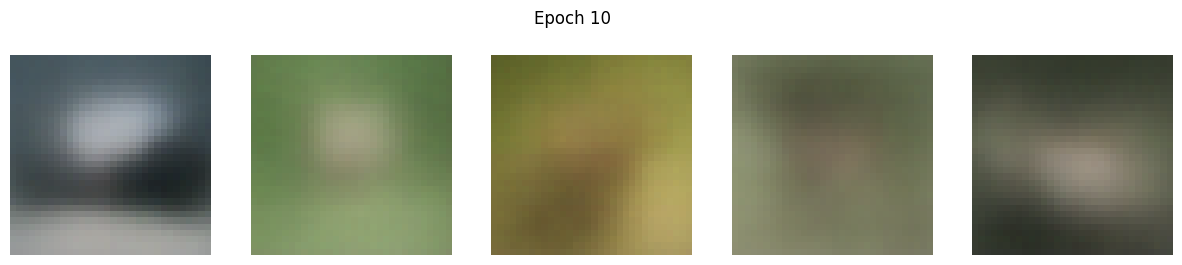

782/782 [==============================] - 16s 21ms/step - loss: 193.0516 - reconstruction_loss: 172.0658 - kl_loss: 21.0285 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 11/50
782/782 [==============================] - 16s 20ms/step - loss: 193.2852 - reconstruction_loss: 171.4623 - kl_loss: 21.0879 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 12/50
782/782 [==============================] - 16s 20ms/step - loss: 192.0406 - reconstruction_loss: 170.9275 - kl_loss: 21.1207 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 13/50
782/782 [==============================] - 16s 20ms/step - loss: 191.7754 - reconstruction_loss: 170.7614 - kl_loss: 21.1883 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 14/50
782/782 [==============================] - 16s 20ms/step - loss: 191.4623 - reco

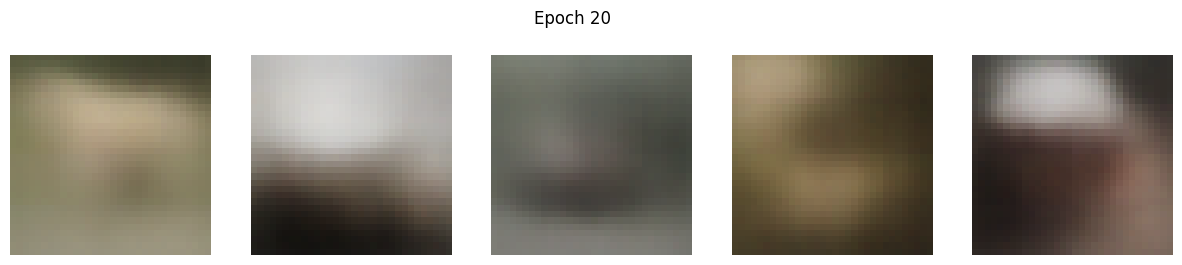

782/782 [==============================] - 16s 20ms/step - loss: 188.7111 - reconstruction_loss: 166.6434 - kl_loss: 22.1031 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 21/50
782/782 [==============================] - 15s 20ms/step - loss: 188.6098 - reconstruction_loss: 166.2826 - kl_loss: 22.1663 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 22/50
782/782 [==============================] - 15s 20ms/step - loss: 188.1465 - reconstruction_loss: 165.8260 - kl_loss: 22.2605 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 23/50
782/782 [==============================] - 15s 20ms/step - loss: 187.9088 - reconstruction_loss: 165.6558 - kl_loss: 22.3131 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 24/50
782/782 [==============================] - 16s 20ms/step - loss: 188.0225 - reco

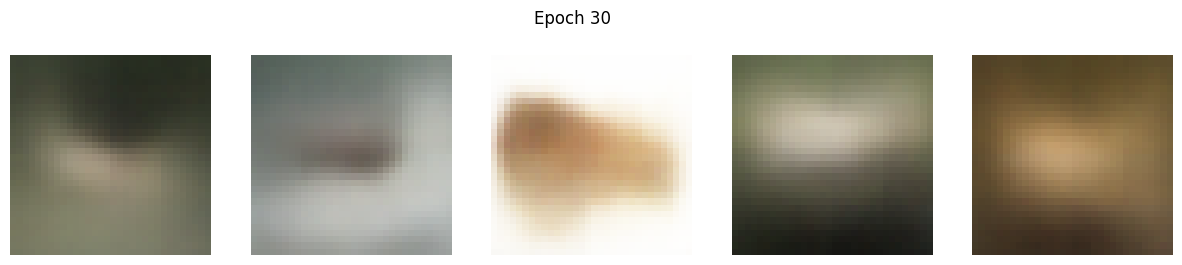

782/782 [==============================] - 16s 20ms/step - loss: 185.8942 - reconstruction_loss: 163.5235 - kl_loss: 22.7052 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 31/50
782/782 [==============================] - 16s 20ms/step - loss: 185.7117 - reconstruction_loss: 163.0625 - kl_loss: 22.8326 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 32/50
782/782 [==============================] - 16s 20ms/step - loss: 185.4722 - reconstruction_loss: 162.5944 - kl_loss: 22.8374 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 33/50
782/782 [==============================] - 16s 20ms/step - loss: 185.0293 - reconstruction_loss: 162.1730 - kl_loss: 22.9491 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 34/50
782/782 [==============================] - 16s 20ms/step - loss: 184.8109 - reco

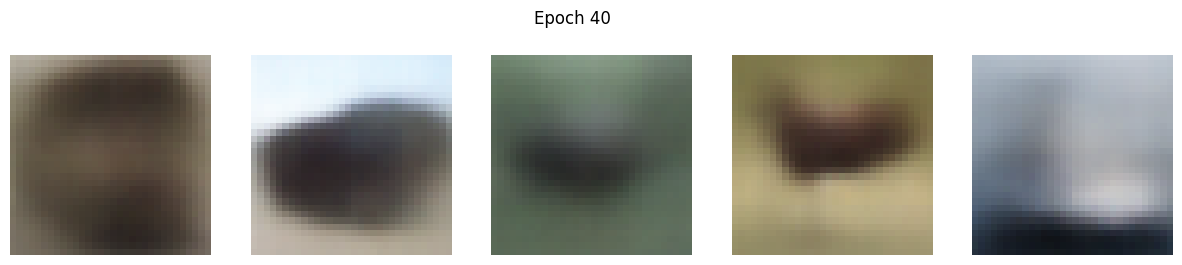

782/782 [==============================] - 16s 20ms/step - loss: 182.3566 - reconstruction_loss: 158.4267 - kl_loss: 23.8204 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 41/50
782/782 [==============================] - 16s 20ms/step - loss: 181.8356 - reconstruction_loss: 157.9473 - kl_loss: 24.0084 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 42/50
782/782 [==============================] - 16s 20ms/step - loss: 181.2301 - reconstruction_loss: 157.3816 - kl_loss: 24.0508 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 43/50
782/782 [==============================] - 15s 20ms/step - loss: 181.4310 - reconstruction_loss: 157.1480 - kl_loss: 24.1069 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 44/50
782/782 [==============================] - 15s 20ms/step - loss: 181.2162 - reco

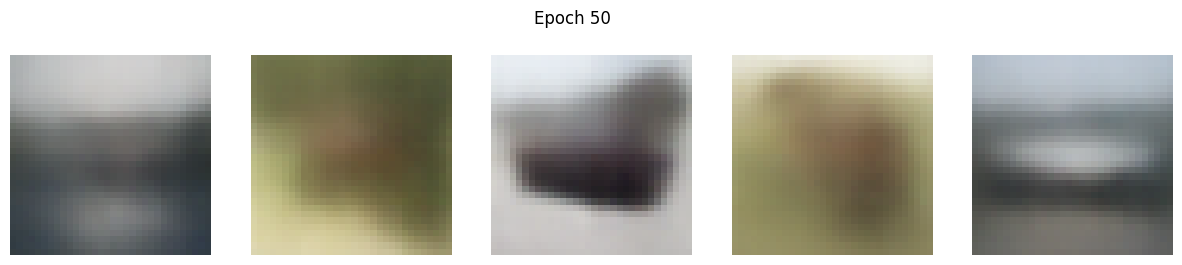

782/782 [==============================] - 16s 20ms/step - loss: 180.1059 - reconstruction_loss: 155.6931 - kl_loss: 24.4377 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00


In [ ]:
########################################
# 5. Навчання
########################################
# Оскільки це автоенкодер, часто в якості "міток" для fit() подають ті ж x_train.
# Так само для валідації: (x_test, x_test).
# Якщо не хочете валідації, можна не вказувати або поставити None.
########################################
history = vae_model.fit(
    x_train, x_train,
    epochs=50,
    batch_size=64,
    validation_data=(x_test, x_test),
    callbacks=[GenerateImagesCallback(vae_model, latent_dim=latent_dim, interval=10, n_images=5)]
)


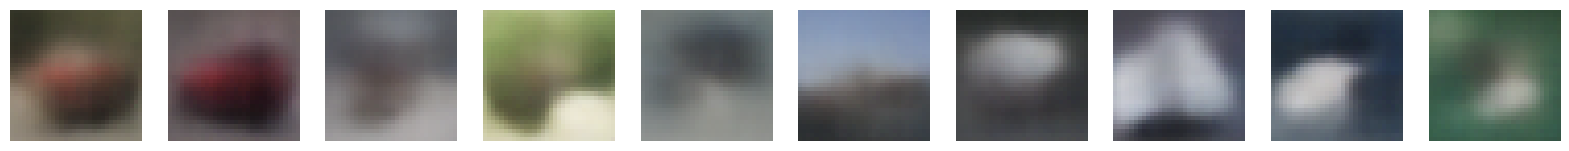

In [ ]:
# Кількість зображень для генерації
n_to_generate = 10

# Генеруємо випадкові точки з Normal(0, 1)
z_sample = tf.random.normal(shape=(n_to_generate, latent_dim))

# Пропускаємо через декодер
generated_images = vae_model.decoder(z_sample)


# Функція для візуалізації
def plot_images(images, n=10):
    plt.figure(figsize=(20, 4))
    for i in range(n):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(images[i])
        plt.axis("off")
    plt.show()


# Виведемо результат
plot_images(generated_images.numpy(), n=n_to_generate)

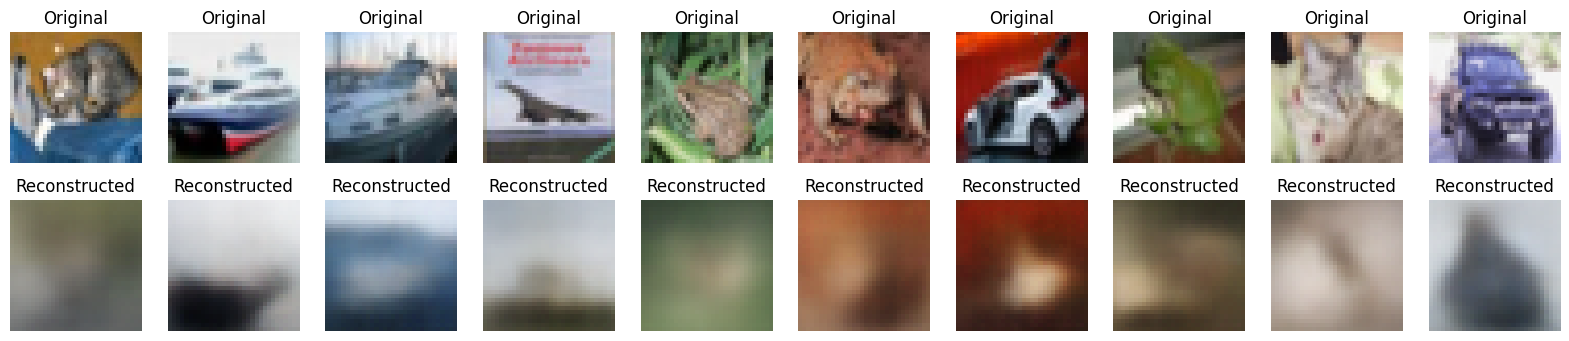

In [ ]:
# Беремо перші 10 зображень з тесту
x_test_subset = x_test[:10]
mu, logvar, z = encoder(x_test_subset)
x_test_reconstructed = decoder(z)


# Відображаємо оригінали та реконструкції поруч
def plot_original_vs_recon(original, reconstructed):
    n = len(original)
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # Оригінали
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(original[i])
        plt.title("Original")
        plt.axis("off")

        # Реконструкція
        ax = plt.subplot(2, n, n + i + 1)
        plt.imshow(reconstructed[i])
        plt.title("Reconstructed")
        plt.axis("off")
    plt.show()


plot_original_vs_recon(x_test_subset, x_test_reconstructed.numpy())

#### Висновок щодо оптимізованої VAE 

##### Логи навчання:
- **Втрати**:
  - Загальні втрати зменшились із \(201.19\) на першій епосі до \(180.10\) на 50-й.
  - **Реконструктивна втрата** значно покращилась: \(181.41 \rightarrow 155.69\), що вказує на точніше відновлення зображень.
  - **KL-втрата** зросла: \(19.34 \rightarrow 24.44\), забезпечуючи кращу регуляризацію латентного простору.



##### Аналіз результатів реконструкції:
- **Покращення**:
  - Загальна структура зображень добре зберігається.
  - У порівнянні з попередніми кроками спостерігається менше розмиття та більш чіткі контури в реконструкціях.
- **Недоліки**:
  - Складні текстури (наприклад, шерсть тварин або дрібні деталі машин) все ще мають розмитість.



##### Порівняння з Step 1:
- Збільшення фільтрів і латентного простору сприяло суттєвому покращенню якості реконструкцій.
- KL-втрата ефективніше формує латентний простір, забезпечуючи більш різноманітні згенеровані зображення.



### Step 3

#### Завантаження та підготовка даних CIFAR-10 (Step 3)

##### Порівняння з попередніми кроками:
- **Дані та підготовка залишаються незмінними**:
  - Набір даних: CIFAR-10.
  - Нормалізація пікселів у діапазон \([0, 1]\).
  - Розміри залишаються \( x_{\text{train}}: (50000, 32, 32, 3) \) та \( x_{\text{test}}: (10000, 32, 32, 3) \).


##### Висновок:
- Немає змін у даних у порівнянні зі Step 1 та Step 2.
- Модель залишається сумісною для порівняння якості реконструкцій та згенерованих зображень між усіма кроками.

In [ ]:
#############################################
# 1. Завантаження та підготовка даних CIFAR-10
#############################################
(x_train, _), (x_test, _) = keras.datasets.cifar10.load_data()
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32")  / 255.0
print("x_train.shape =", x_train.shape, "x_test.shape =", x_test.shape)

x_train.shape = (50000, 32, 32, 3) x_test.shape = (10000, 32, 32, 3)


#### Skip-зʼєднання в архітектурі VAE 

##### Зміни:
1. **Збереження `latent_dim = 512`**:
   - Латентний простір залишається великим, як у Step 2, що сприяє збереженню важливих ознак.

2. **Додавання skip-зʼєднань**:
   - **Енкодер**: Зберігає виходи кожного з 5 блоків.
   - **Декодер**: Поєднує ці skip-зʼєднання з відповідними шарами декодера через `concat`.


##### Порівняння з попередніми кроками:
- **Step 1**: Без skip-зʼєднань, що призводило до втрати деяких деталей.
- **Step 2**: Глибока архітектура, але без явного механізму для відновлення дрібних деталей.
- **Step 3**: Skip-зʼєднання забезпечують передачу локальних деталей, що сприяє чіткішій реконструкції.



##### Очікуваний ефект:
- **Переваги**:
  - Краще збереження дрібних деталей та текстур.
  - Зниження розмитості в реконструйованих зображеннях.
- **Ризики**:
  - Збільшення обчислювальної складності через додаткові `concat`.



In [ ]:
#############################################
# 2. Параметри архітектури
#############################################
latent_dim = 512  # Залишаємо 512, як ви просили

# Енкодер: 5 блоків (Conv -> BN -> ReLU -> strides=2)
# Кожен блок зберігатиме skip-вихід
num_filters_encoder = [128, 256, 512, 512, 512]

# Для декодера ми також робимо 5 блоків з Conv2DTranspose + concat + Conv
# - У місцях concat будемо додавати skip-зʼєднання
num_filters_decoder = [512, 512, 512, 256, 128]


#### Енкодер із skip-з'єднаннями 

##### Зміни:
1. **Skip-зʼєднання**:
   - Зберігаються проміжні виходи з перших 4 блоків згортки (додаються до виходів енкодера).
   - Забезпечують доступ до локальних ознак, збережених на різних рівнях.

2. **Оновлення архітектури**:
   - **5 блоків**: Кожен з Conv → BatchNorm → ReLU.
   - **Проміжний Dense (1024)** перед генерацією `mu` та `logvar`.

3. **Виходи**:
   - `mu`, `logvar`, `z` — латентний простір.
   - 4 `skips` для використання у декодері.



##### Порівняння з попередніми кроками:
- **Step 1 і 2**: Енкодер повертав лише `mu`, `logvar`, `z` без збереження проміжних результатів.
- **Step 3**: Збереження skip-зʼєднань додає контекст для декодера, що сприяє точнішому відновленню деталей.



##### Очікуваний ефект:
- **Переваги**:
  - Поліпшення реконструкції через використання багаторівневих ознак.
  - Зменшення втрати інформації на етапі енкодингу.
- **Ризики**:
  - Можливе збільшення споживання пам'яті через передачу skip-зʼєднань.



In [ ]:
#############################################
# 3. Енкодер (5 блоків, але 4 skip)
#############################################
def build_encoder(input_shape=(32, 32, 3),
                  num_filters=[128, 256, 512, 512, 512],
                  latent_dim=512):
    """
    - Робимо 5 блоків Conv->BN->ReLU (strides=2).
    - Skip-з'єднання беремо з перших 4-х.
    - П'ятий блок дає (1,1,512) -> Flatten -> Dense -> mu, logvar.
    """
    inputs = keras.Input(shape=input_shape)
    x = inputs

    skips = []
    num_blocks = len(num_filters)

    # Перших 4 блоки - збираємо skips
    for i in range(num_blocks - 1):
        filters = num_filters[i]
        x = layers.Conv2D(filters, kernel_size=3, strides=2, padding='same', use_bias=False)(x)
        x = layers.BatchNormalization()(x)
        x = layers.ReLU()(x)
        skips.append(x)  # зберігаємо проміжний вихід

    # 5-й блок (останній) - вже без skip
    filters = num_filters[-1]
    x = layers.Conv2D(filters, kernel_size=3, strides=2, padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    # Тепер x ~ (1,1,512)

    x = layers.Flatten()(x)
    x = layers.Dense(1024, activation='relu')(x)

    mu = layers.Dense(latent_dim, name='mu')(x)
    logvar = layers.Dense(latent_dim, name='logvar')(x)

    # Репараметризація
    def sampling(args):
        mu_, logvar_ = args
        epsilon = tf.random.normal(shape=tf.shape(mu_))
        return mu_ + tf.exp(0.5 * logvar_) * epsilon

    z = layers.Lambda(sampling, name='z')([mu, logvar])

    # Вихід: [mu, logvar, z] + список skip (4 штуки)
    outputs = [mu, logvar, z] + skips

    return keras.Model(inputs, outputs, name="encoder_fixed_skips")


#### Декодер із skip-зʼєднаннями 

##### Зміни:
1. **Skip-зʼєднання**:
   - Використовуються виходи 4 блоків енкодера.
   - Додаються через `Concatenate` після кожного відповідного шару `Conv2DTranspose`.

2. **Архітектура**:
   - **5 рівнів декодування**:
     - Початок: \( (1,1) \) після `Dense` і `Reshape`.
     - Поступове збільшення розміру: \( (1,1) \rightarrow (2,2) \rightarrow (4,4) \rightarrow (8,8) \rightarrow (16,16) \rightarrow (32,32) \).
   - Останній шар: `Conv2D` із 3 каналами та активацією `sigmoid` для виходу в діапазоні \([0, 1]\).



##### Порівняння з попередніми кроками:
- **Step 1 і 2**: Декодер збільшував розмір зображення без використання skip-зʼєднань, що обмежувало якість реконструкцій.
- **Step 3**: Додає skip-зʼєднання, які покращують передачу деталей і локальних ознак з енкодера.



##### Очікуваний ефект:
- **Переваги**:
  - Чіткіші реконструкції за рахунок доступу до локальних ознак.
  - Поліпшення відновлення текстур і контурів.
- **Ризики**:
  - Можливе перенасичення деталей, якщо skip-зʼєднання переважатимуть інформацію з латентного простору.



In [ ]:
#############################################
# 4. Декодер (4 рівні Conv2DTranspose + skip)
#############################################
def build_decoder(latent_dim=512,
                  num_filters=[512, 512, 512, 256]):
    """
    Будемо приймати:
      - z_input
      - skip1..skip4 (форм 16×16, 8×8, 4×4, 2×2)
    Поступово збільшимо: (1,1) -> (2,2) -> (4,4) -> (8,8) -> (16,16) -> (32,32)
    """

    # Вхідні тензори
    z_input = keras.Input(shape=(latent_dim,), name="z_input")
    # 4 skip-и (в порядку, в якому вони додавалися)
    skip1 = keras.Input(shape=(16,16,128), name="skip1")  # з першого блоку
    skip2 = keras.Input(shape=(8,8,256),   name="skip2")
    skip3 = keras.Input(shape=(4,4,512),   name="skip3")
    skip4 = keras.Input(shape=(2,2,512),   name="skip4")  # з четвертого блоку

    # Базовий розмір після Dense
    x = layers.Dense(1*1*512, activation='relu')(z_input)
    x = layers.Reshape((1,1,512))(x)

    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    # 1) (1,1)->(2,2)
    x = layers.Conv2DTranspose(512, kernel_size=3, strides=2, padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    # concat(skip4) (2,2,512)
    x = layers.Concatenate()([x, skip4])
    x = layers.Conv2D(512, kernel_size=3, padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    # 2) (2,2)->(4,4)
    x = layers.Conv2DTranspose(512, kernel_size=3, strides=2, padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    # concat(skip3) (4,4,512)
    x = layers.Concatenate()([x, skip3])
    x = layers.Conv2D(512, kernel_size=3, padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    # 3) (4,4)->(8,8)
    x = layers.Conv2DTranspose(512, kernel_size=3, strides=2, padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    # concat(skip2) (8,8,256)
    x = layers.Concatenate()([x, skip2])
    x = layers.Conv2D(256, kernel_size=3, padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    # 4) (8,8)->(16,16)
    x = layers.Conv2DTranspose(256, kernel_size=3, strides=2, padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    # concat(skip1) (16,16,128)
    x = layers.Concatenate()([x, skip1])
    x = layers.Conv2D(128, kernel_size=3, padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    # Фінальний крок: (16,16)->(32,32), без skip
    x = layers.Conv2DTranspose(128, kernel_size=3, strides=2, padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    # Вихід 3 канали (RGB)
    outputs = layers.Conv2D(3, kernel_size=3, padding='same', activation='sigmoid')(x)

    return keras.Model(
        inputs=[z_input, skip1, skip2, skip3, skip4],
        outputs=outputs,
        name="decoder_fixed_skips"
    )


#### Побудова та ініціалізація енкодера і декодера (Step 3)

##### Зміни:
- **Енкодер**:
  - 5 блоків із Conv → BatchNorm → ReLU.
  - Збереження 4 skip-зʼєднань для декодера.
  - Генерація `mu`, `logvar` і репараметризація для отримання `z`.

- **Декодер**:
  - Використовує 4 skip-зʼєднання для поліпшення відновлення деталей.
  - Поступове збільшення розміру зображення до \(32 \times 32\) з використанням `Conv2DTranspose`.
  - Останній шар — RGB-вихід із активацією `sigmoid`.



##### Порівняння з попередніми кроками:
- **Step 1 і 2**: Простий енкодер і декодер без skip-зʼєднань.
- **Step 3**: Інтеграція skip-зʼєднань для передачі локальних ознак, що покращує відновлення текстур.



##### Очікуваний ефект:
- **Переваги**:
  - Чіткіше відновлення зображень, збереження локальних деталей.
  - Можливість кращого відновлення складних текстур.
- **Ризики**:
  - Ускладнення моделі може вплинути на швидкість навчання.



In [ ]:
#############################################
# 5. Створюємо енкодер і декодер
#############################################
encoder = build_encoder(
    input_shape=(32,32,3),
    num_filters=num_filters_encoder,
    latent_dim=latent_dim
)
encoder.summary()

decoder = build_decoder(
    latent_dim=latent_dim,
    num_filters=num_filters_decoder
)
decoder.summary()

Model: "encoder_fixed_skips"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_14 (InputLayer)          [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d_71 (Conv2D)             (None, 16, 16, 128)  3456        ['input_14[0][0]']               
                                                                                                  
 batch_normalization_99 (BatchN  (None, 16, 16, 128)  512        ['conv2d_71[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 re_lu_99 (ReLU)                (None, 16, 16, 128)  0           ['batch_normali

#### Клас VAE з U-Net архітектурою та комбінованою втратою (Step 3)

##### Зміни:
1. **Архітектура U-Net**:
   - Інтеграція skip-зʼєднань у декодер.
   - Використання `encoder` для отримання як латентного представлення (`z`), так і проміжних skip-виходів (`skip1`...`skip4`).
   - Декодер реконструює зображення, комбінуючи skip-зʼєднання з латентним вектором.

2. **Комбінована втрата**:
   - **Reconstruction loss**: поєднання MSE і L1 (MAE) з ваговим коефіцієнтом `alpha` для балансу між гладкістю і чіткістю.
   - **KL-втрата**: регуляризація латентного простору для нормального розподілу.

3. **Кастомний `train_step`**:
   - Градиєнти обчислюються для всієї моделі (енкодер + декодер).
   - Оновлюються метрики: загальна втрата, реконструктивна втрата, KL-втрата.



##### Порівняння з попередніми кроками:
- **Step 1 і 2**: Відсутні skip-зʼєднання, спрощена реконструктивна втрата.
- **Step 3**: Додає skip-зʼєднання для збереження локальних ознак і комбіновану втрату для балансу між точністю і згладженістю.



##### Очікуваний ефект:
- **Переваги**:
  - Поліпшення реконструкцій завдяки збереженню деталей через skip-зʼєднання.
  - Баланс між гладкістю і чіткістю зображень завдяки MSE+L1.
- **Ризики**:
  - Збільшення обчислювальної складності через U-Net структуру.
  - Підбір оптимального значення `alpha` може вимагати додаткових експериментів.



In [ ]:
#############################################
# 6. Клас VAE з кастомним train_step (MSE+L1)
#############################################
class VAE_U_Net(keras.Model):
    def __init__(self, encoder, decoder, alpha=0.5, **kwargs):
        super().__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.alpha = alpha

        self.total_loss_tracker = keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = keras.metrics.Mean(name="reconstruction_loss")
        self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")

    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
        ]

    def call(self, inputs, training=None, mask=None):
        # Прямий прохід: отримуємо [mu, logvar, z, skip1..skip4], декодуємо
        outputs = self.encoder(inputs)
        mu_, logvar_, z_ = outputs[0], outputs[1], outputs[2]
        skip1, skip2, skip3, skip4 = outputs[3], outputs[4], outputs[5], outputs[6]

        reconstruction = self.decoder([z_, skip1, skip2, skip3, skip4])
        return reconstruction

    def train_step(self, data):
        if isinstance(data, tuple):
            data = data[0]  # y = x

        with tf.GradientTape() as tape:
            encoder_out = self.encoder(data, training=True)
            mu_, logvar_, z_ = encoder_out[0], encoder_out[1], encoder_out[2]
            skip1, skip2, skip3, skip4 = encoder_out[3], encoder_out[4], encoder_out[5], encoder_out[6]

            reconstruction = self.decoder([z_, skip1, skip2, skip3, skip4], training=True)

            # ========= MSE part =========
            reconstruction_loss_mse = tf.reduce_mean(
                tf.reduce_sum(
                    tf.keras.losses.mean_squared_error(data, reconstruction),
                    axis=(1,2)
                )
            )

            # ========= L1 part (MAE) =========
            reconstruction_loss_l1 = tf.reduce_mean(
                tf.reduce_sum(
                    tf.abs(data - reconstruction),
                    axis=(1,2,3)
                )
            )

            # Комбінація
            reconstruction_loss = (1.0 - self.alpha)*reconstruction_loss_mse + self.alpha*reconstruction_loss_l1

            # KL-втрата
            kl_loss = 1 + logvar_ - tf.square(mu_) - tf.exp(logvar_)
            kl_loss = -0.5 * tf.reduce_mean(tf.reduce_sum(kl_loss, axis=1))

            total_loss = reconstruction_loss + kl_loss

        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))

        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)

        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }


#### Callback для візуалізації реконструкцій 

##### Зміни:
- **Мета**: Додавання `ReconstructionCallback` для порівняння оригінальних і реконструйованих зображень на кожній визначеній епосі (`interval`).
- **Архітектура**:
  - Вибір `n_images` із набору даних (`x_data`).
  - Пропуск зображень через **енкодер** для отримання латентного вектора `z` і skip-зʼєднань.
  - Реконструкція зображень через **декодер** з використанням `z` і skip-зʼєднань.
  - Відображення оригіналів та реконструкцій у вигляді таблиці.



##### Порівняння з попередніми кроками:
- **Step 1 і 2**: Відсутній механізм систематичної візуалізації реконструкцій.
- **Step 3**: Реалізовано callback для контролю якості реконструкцій під час навчання.



##### Очікуваний ефект:
- **Переваги**:
  - Дає змогу візуально оцінити прогрес моделі на кожній `interval`-епосі.
  - Полегшує аналіз того, як добре модель навчається зберігати важливі деталі.
- **Ризики**:
  - Може уповільнити навчання при великих наборах даних через часту генерацію зображень.



In [ ]:
class ReconstructionCallback(keras.callbacks.Callback):
    def __init__(self, model, x_data, interval=10, n_images=5):
        """
        model: Ваш VAE-об'єкт (U-Net-подібний).
        x_data: Набір даних, з якого беруться приклади (наприклад, x_test).
        interval: Кожні 'interval' епох будемо візуалізувати.
        n_images: Скільки прикладів відобразити.
        """
        super().__init__()
        self.model = model
        self.x_data = x_data
        self.interval = interval
        self.n_images = n_images

    def on_epoch_end(self, epoch, logs=None):
        # Наприклад, кожні 10 епох
        if (epoch + 1) % self.interval == 0:
            # Візьмемо перші n_images або довільні:
            sample_images = self.x_data[:self.n_images]

            # Проганяємо через енкодер
            encoder_out = self.model.encoder(sample_images)
            z_sample = encoder_out[2]  # latent z
            skip1, skip2, skip3, skip4 = encoder_out[3], encoder_out[4], encoder_out[5], encoder_out[6]

            # Проганяємо через декодер
            reconstructed = self.model.decoder([z_sample, skip1, skip2, skip3, skip4])

            # Виводимо оригінал і реконструкцію поруч
            print(f"\n[Callback] Реконструкції після {epoch+1}-ї епохи:")
            plt.figure(figsize=(10, 4))
            for i in range(self.n_images):
                # Оригінал
                ax = plt.subplot(2, self.n_images, i+1)
                plt.imshow(sample_images[i])
                plt.title("Original")
                plt.axis('off')

                # Реконструкція
                ax = plt.subplot(2, self.n_images, self.n_images + i + 1)
                plt.imshow(reconstructed[i])
                plt.title("Reconstructed")
                plt.axis('off')

            plt.tight_layout()
            plt.show()

#### Навчання VAE з U-Net та Callback

##### Основні моменти:
1. **Модель**: 
   - Використовується покращена модель VAE з U-Net-подібною структурою.
   - Включає skip-зʼєднання для покращення реконструкції.

2. **Параметри навчання**:
   - `epochs=50` – достатньо тривале навчання для складної моделі.
   - `batch_size=64` – баланс між швидкістю навчання та стабільністю градієнтів.
   - `alpha=0.5` – комбінація MSE і L1 для кращої точності реконструкції.

3. **Callback для реконструкції**:
   - `ReconstructionCallback` візуалізує оригінальні та реконструйовані зображення кожні 5 епох.



##### Порівняння з попередніми кроками:
- **Step 1 і Step 2**: Простішу структуру без skip-зʼєднань.
- **Step 3**: Включає skip-зʼєднання та механізм регулярної візуалізації.



##### Очікуваний ефект:
- **Переваги**:
  - Зменшення втрати важливих деталей у реконструкціях завдяки skip-зʼєднанням.
  - Можливість візуального моніторингу прогресу.
- **Ризики**:
  - Триваліший час навчання через складнішу архітектуру.
  - Потреба в додатковій пам’яті для збереження skip-зʼєднань.



Epoch 1/50
782/782 [==============================] - 23s 28ms/step - loss: 87.7505 - reconstruction_loss: 53.2058 - kl_loss: 1.2224 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 2/50
782/782 [==============================] - 21s 26ms/step - loss: 36.6995 - reconstruction_loss: 34.8612 - kl_loss: 0.0036 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 3/50
782/782 [==============================] - 21s 26ms/step - loss: 31.3923 - reconstruction_loss: 31.0171 - kl_loss: 0.0021 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 4/50
782/782 [==============================] - 21s 26ms/step - loss: 28.4966 - reconstruction_loss: 27.9959 - kl_loss: 7.2848e-04 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 5/50
782/782 [==============================] - ETA: 0s - loss: 27.1840 - reconstructi

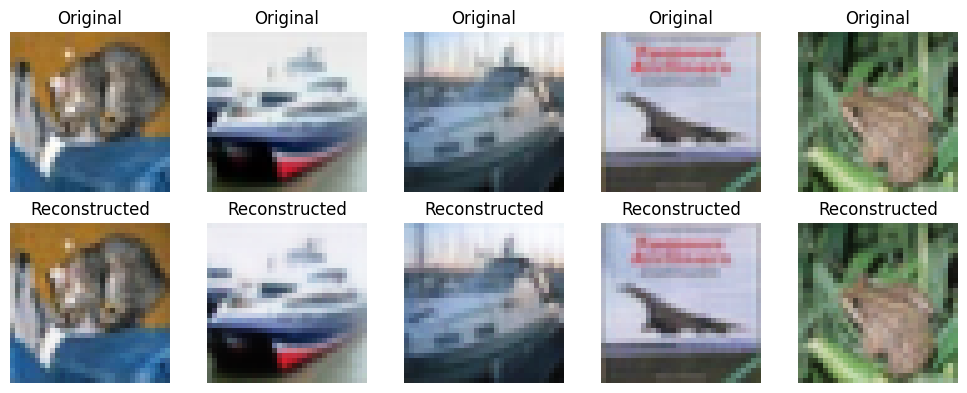

782/782 [==============================] - 21s 27ms/step - loss: 27.1834 - reconstruction_loss: 26.7661 - kl_loss: 7.3616e-04 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 6/50
782/782 [==============================] - 21s 27ms/step - loss: 25.4374 - reconstruction_loss: 25.1395 - kl_loss: 3.6415e-04 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 7/50
782/782 [==============================] - 21s 26ms/step - loss: 24.0163 - reconstruction_loss: 23.8237 - kl_loss: 2.7817e-04 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 8/50
782/782 [==============================] - 21s 26ms/step - loss: 21.8182 - reconstruction_loss: 21.9288 - kl_loss: 0.0011 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 9/50
782/782 [==============================] - 21s 27ms/step - loss: 21.6408 - reconstru

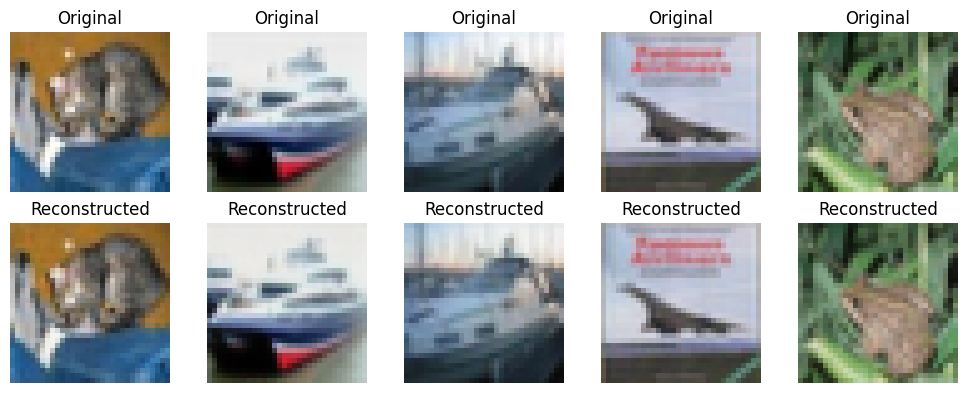

782/782 [==============================] - 21s 27ms/step - loss: 20.6805 - reconstruction_loss: 20.2769 - kl_loss: 6.0957e-05 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 11/50
782/782 [==============================] - 21s 26ms/step - loss: 19.6133 - reconstruction_loss: 19.4958 - kl_loss: 3.6132e-05 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 12/50
782/782 [==============================] - 21s 26ms/step - loss: 19.2829 - reconstruction_loss: 18.8446 - kl_loss: 5.2961e-05 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 13/50
782/782 [==============================] - 21s 26ms/step - loss: 18.3678 - reconstruction_loss: 18.2313 - kl_loss: 6.0190e-05 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 14/50
782/782 [==============================] - 21s 26ms/step - loss: 17.8902 - r

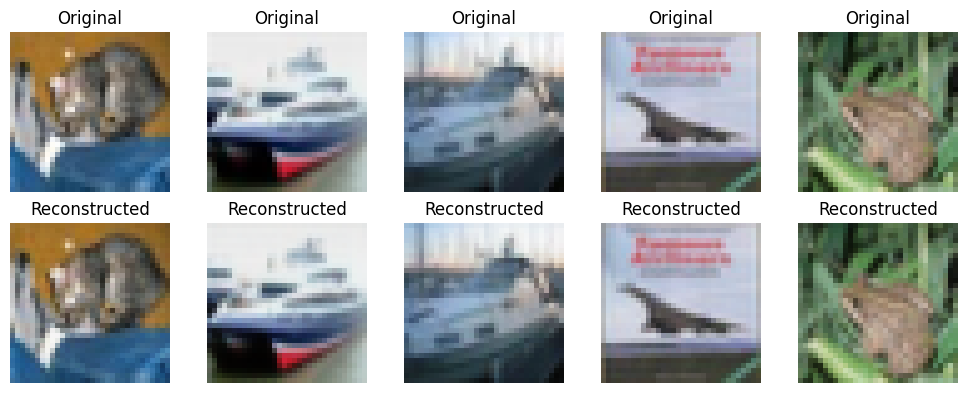

782/782 [==============================] - 21s 27ms/step - loss: 17.0100 - reconstruction_loss: 16.9944 - kl_loss: 2.7233e-05 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 16/50
782/782 [==============================] - 21s 26ms/step - loss: 16.2148 - reconstruction_loss: 16.4448 - kl_loss: 5.7589e-05 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 17/50
782/782 [==============================] - 21s 26ms/step - loss: 16.0966 - reconstruction_loss: 16.5689 - kl_loss: 2.5607e-05 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 18/50
782/782 [==============================] - 20s 26ms/step - loss: 15.6755 - reconstruction_loss: 15.5737 - kl_loss: 6.9281e-05 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 19/50
782/782 [==============================] - 21s 26ms/step - loss: 15.5979 - r

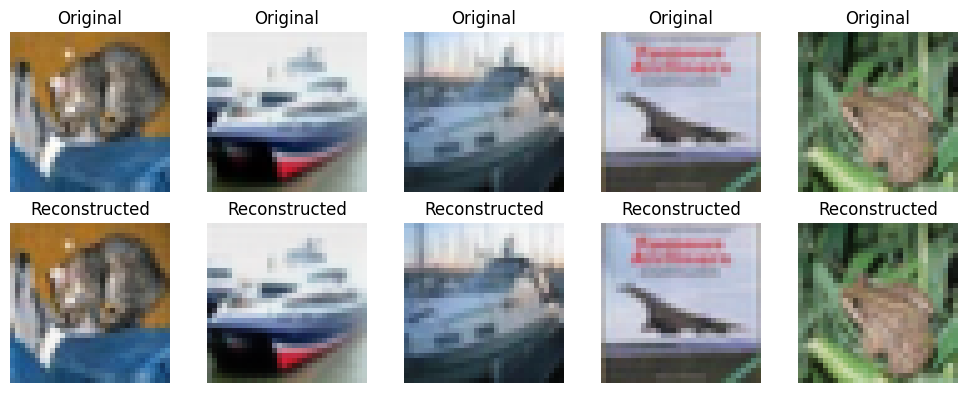

782/782 [==============================] - 21s 27ms/step - loss: 15.1946 - reconstruction_loss: 15.4512 - kl_loss: 6.1625e-05 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 21/50
782/782 [==============================] - 20s 26ms/step - loss: 15.1149 - reconstruction_loss: 14.6189 - kl_loss: 4.6859e-05 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 22/50
782/782 [==============================] - 21s 26ms/step - loss: 14.8316 - reconstruction_loss: 14.9658 - kl_loss: 5.9139e-05 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 23/50
782/782 [==============================] - 21s 26ms/step - loss: 14.6383 - reconstruction_loss: 14.8460 - kl_loss: 4.1814e-05 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 24/50
782/782 [==============================] - 21s 26ms/step - loss: 14.3121 - r

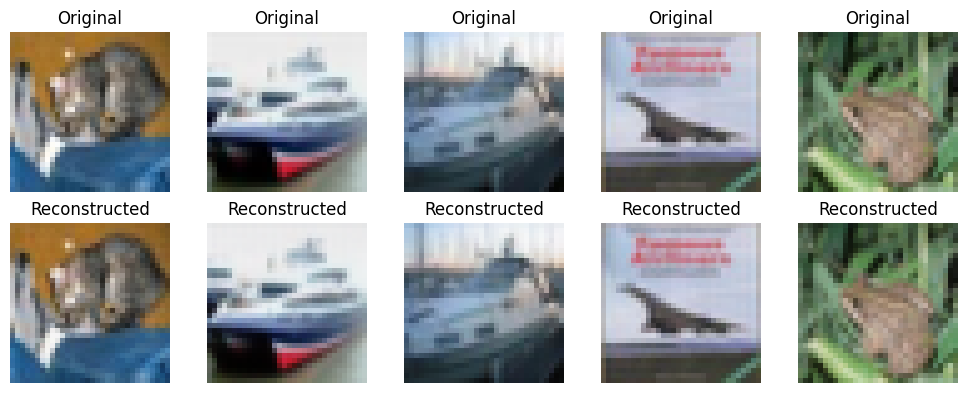

782/782 [==============================] - 21s 27ms/step - loss: 13.6953 - reconstruction_loss: 13.4586 - kl_loss: 1.2241e-05 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 26/50
782/782 [==============================] - 21s 27ms/step - loss: 14.0338 - reconstruction_loss: 13.9276 - kl_loss: 2.5515e-05 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 27/50
782/782 [==============================] - 21s 26ms/step - loss: 13.6784 - reconstruction_loss: 13.6723 - kl_loss: 3.2362e-05 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 28/50
782/782 [==============================] - 21s 27ms/step - loss: 12.9115 - reconstruction_loss: 12.8270 - kl_loss: 4.1271e-05 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 29/50
782/782 [==============================] - 21s 26ms/step - loss: 13.8205 - r

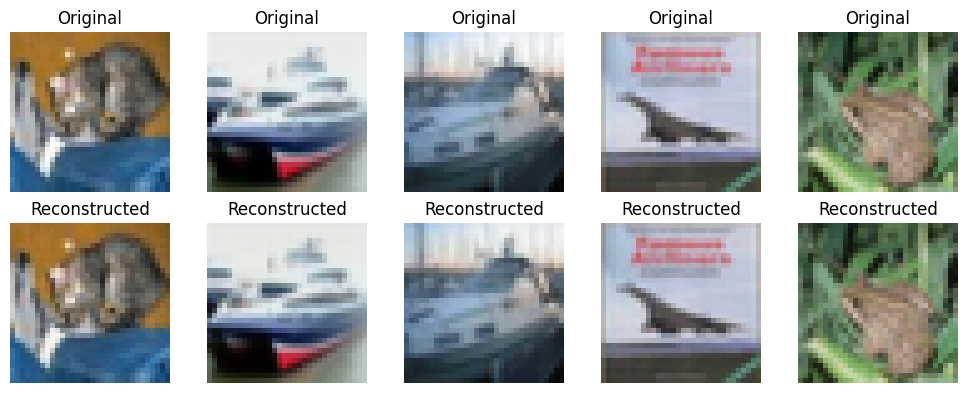

782/782 [==============================] - 21s 27ms/step - loss: 12.8436 - reconstruction_loss: 12.7550 - kl_loss: 2.2961e-05 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 31/50
782/782 [==============================] - 21s 27ms/step - loss: 12.9718 - reconstruction_loss: 12.8878 - kl_loss: 1.8843e-05 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 32/50
782/782 [==============================] - 21s 26ms/step - loss: 12.3147 - reconstruction_loss: 12.3294 - kl_loss: 1.3837e-05 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 33/50
782/782 [==============================] - 21s 27ms/step - loss: 12.7476 - reconstruction_loss: 12.2858 - kl_loss: 3.3539e-05 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 34/50
782/782 [==============================] - 21s 27ms/step - loss: 12.0789 - r

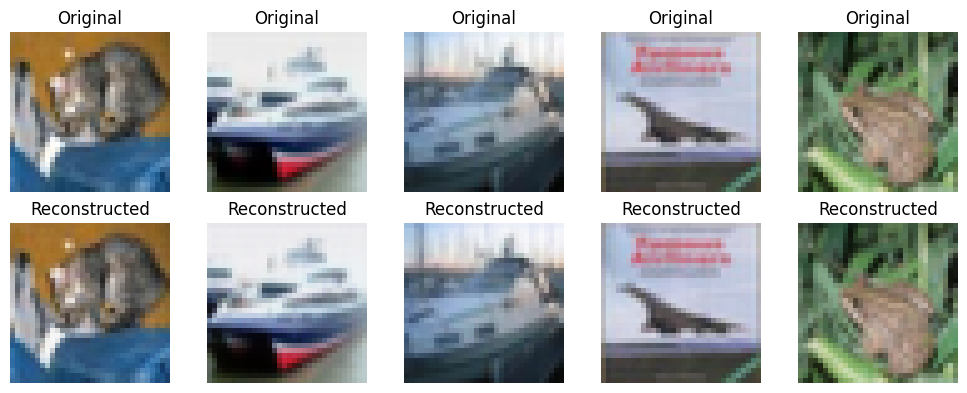

782/782 [==============================] - 21s 27ms/step - loss: 11.5628 - reconstruction_loss: 11.6631 - kl_loss: 2.6115e-05 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 36/50
782/782 [==============================] - 21s 26ms/step - loss: 12.0069 - reconstruction_loss: 11.9756 - kl_loss: 3.2593e-05 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 37/50
782/782 [==============================] - 21s 26ms/step - loss: 11.4885 - reconstruction_loss: 11.6407 - kl_loss: 2.3605e-04 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 38/50
782/782 [==============================] - 21s 26ms/step - loss: 11.6831 - reconstruction_loss: 11.5731 - kl_loss: 3.1697e-05 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 39/50
782/782 [==============================] - 21s 27ms/step - loss: 11.7777 - r

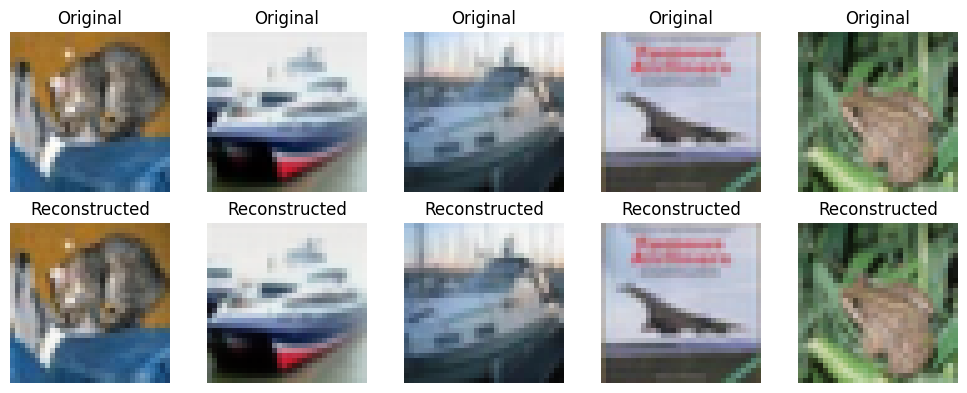

782/782 [==============================] - 21s 27ms/step - loss: 11.4625 - reconstruction_loss: 11.3346 - kl_loss: 9.7062e-06 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 41/50
782/782 [==============================] - 21s 26ms/step - loss: 10.9733 - reconstruction_loss: 11.1708 - kl_loss: 1.2158e-05 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 42/50
782/782 [==============================] - 21s 26ms/step - loss: 10.9378 - reconstruction_loss: 11.1802 - kl_loss: 2.4084e-05 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 43/50
782/782 [==============================] - 21s 26ms/step - loss: 10.9519 - reconstruction_loss: 10.7890 - kl_loss: 2.3921e-05 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 44/50
782/782 [==============================] - 21s 27ms/step - loss: 12.1185 - r

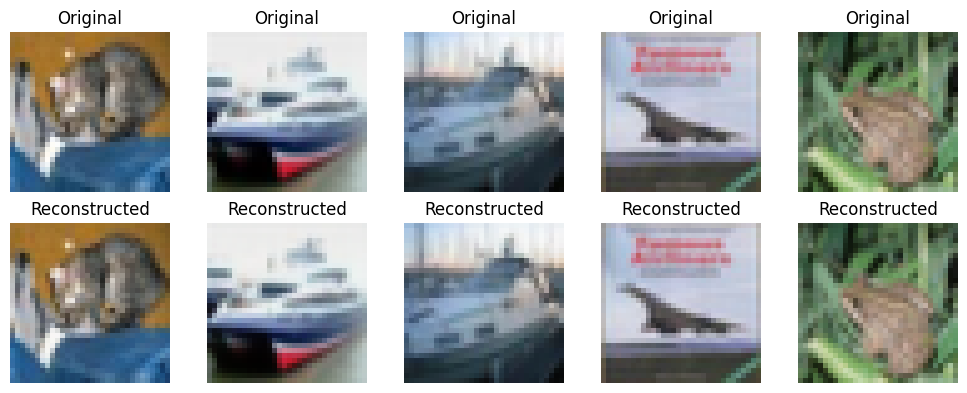

782/782 [==============================] - 21s 27ms/step - loss: 10.7187 - reconstruction_loss: 10.7916 - kl_loss: 1.9629e-05 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 46/50
782/782 [==============================] - 21s 27ms/step - loss: 10.1783 - reconstruction_loss: 10.5136 - kl_loss: 1.6579e-05 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 47/50
782/782 [==============================] - 21s 26ms/step - loss: 11.1317 - reconstruction_loss: 10.6719 - kl_loss: 1.8856e-05 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 48/50
782/782 [==============================] - 21s 26ms/step - loss: 10.3762 - reconstruction_loss: 10.4468 - kl_loss: 1.1705e-05 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 49/50
782/782 [==============================] - 20s 26ms/step - loss: 10.2096 - r

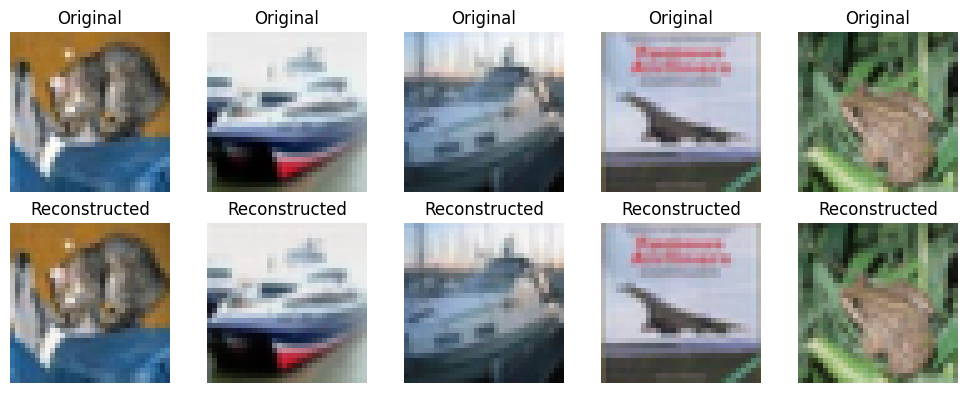

782/782 [==============================] - 21s 26ms/step - loss: 10.3009 - reconstruction_loss: 10.4311 - kl_loss: 3.1225e-05 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00


In [ ]:
#############################################
# 7. Створюємо й навчаємо
#############################################
vae_model = VAE_U_Net(encoder, decoder, alpha=0.5)

def dummy_loss(y_true, y_pred):
    return 0.0

vae_model.compile(
    optimizer=keras.optimizers.Adam(1e-4),
    loss=dummy_loss
)

history = vae_model.fit(
    x_train, x_train,
    epochs=50,
    batch_size=64,
    validation_data=(x_test, x_test),
    callbacks=[
        ReconstructionCallback(
            model=vae_model,
            x_data=x_test,      # Звідки беремо картинки для перевірки
            interval=5,        # Відображати кожні 10 епох
            n_images=5          # Скільки картинок відобразити
        )
    ]
)

#### Демонстрація реконструкцій 

##### Зміни:
- Додано блок для порівняння **оригінальних зображень** із **реконструйованими**.
- Реконструкція виконується через пропуск зображень тестового набору даних (\(x_{\text{test}}\)) через:
  - **Енкодер** для отримання латентного вектора (`z`) і skip-зʼєднань.
  - **Декодер** для відновлення зображень із використанням `z` і skip-зʼєднань.



##### Порівняння з попередніми кроками:
- **Step 1 і 2**: Відсутня явна демонстрація реконструкцій.
- **Step 3**: Чітке візуальне порівняння результатів, що дає змогу оцінити якість роботи моделі.



##### Очікуваний ефект:
- **Переваги**:
  - Зрозуміле уявлення про те, наскільки добре модель зберігає деталі зображення.
  - Полегшення візуальної оцінки якості реконструкції.
- **Ризики**:
  - Якщо якість реконструкцій недостатня, можуть виникнути спотворення або втрата важливих деталей.



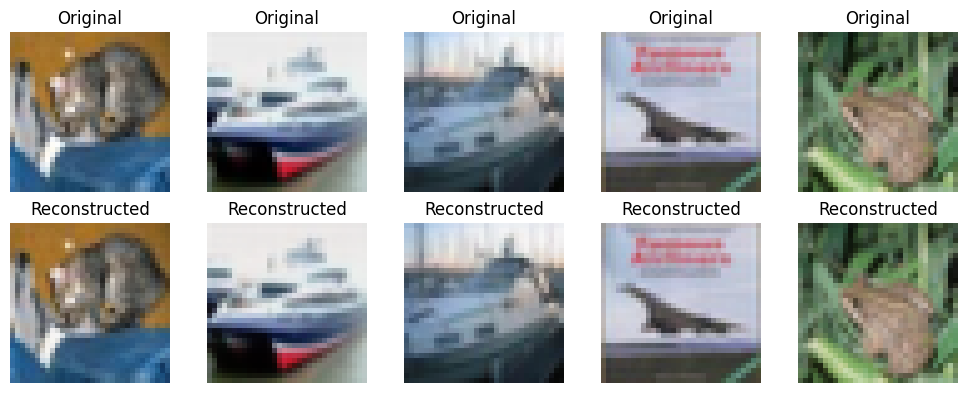

In [ ]:
#############################################
# 8. Демонстрація реконструкцій
#############################################
import numpy as np

sample_images = x_test[:5]
encoder_out = vae_model.encoder(sample_images)
z_sample = encoder_out[2]  # latent
skip1, skip2, skip3, skip4 = encoder_out[3], encoder_out[4], encoder_out[5], encoder_out[6]

reconstructed = vae_model.decoder([z_sample, skip1, skip2, skip3, skip4])

plt.figure(figsize=(10,4))
for i in range(5):
    # Original
    ax = plt.subplot(2,5,i+1)
    plt.imshow(sample_images[i])
    plt.title("Original")
    plt.axis('off')

    # Reconstructed
    ax = plt.subplot(2,5,5+i+1)
    plt.imshow(reconstructed[i])
    plt.title("Reconstructed")
    plt.axis('off')

plt.tight_layout()
plt.show()

#### Реконструкція довільного зображення та аналіз різниці (Step 3)

##### Зміни:
1. **Використання довільного зображення**:
   - Завантажено зовнішнє зображення, яке змінено до розміру \(32 \times 32\) для подачі в модель.
   - Нормалізовано до діапазону \([0, 1]\).

2. **Процес реконструкції**:
   - Пропуск зображення через **енкодер** для отримання латентного вектора `z` і skip-зʼєднань.
   - Відновлення зображення через **декодер**.

3. **Аналіз різниці**:
   - Обчислення абсолютної різниці між оригіналом і реконструкцією.
   - Візуалізація різниці як окремої теплової карти.



##### Порівняння з попередніми кроками:
- **Step 1 і 2**: Реконструкція виконувалась лише на тестових даних CIFAR-10.
- **Step 3**: Модель протестована на зовнішньому зображенні, що дозволяє оцінити її генералізацію.



##### Очікуваний ефект:
- **Переваги**:
  - Дослідження моделі на реальних даних, що виходять за межі CIFAR-10.
  - Оцінка збереження деталей у реконструкції через різницю.
- **Ризики**:
  - Модель може демонструвати нижчу якість реконструкції для зовнішніх даних, якщо вони сильно відрізняються від навчального набору.



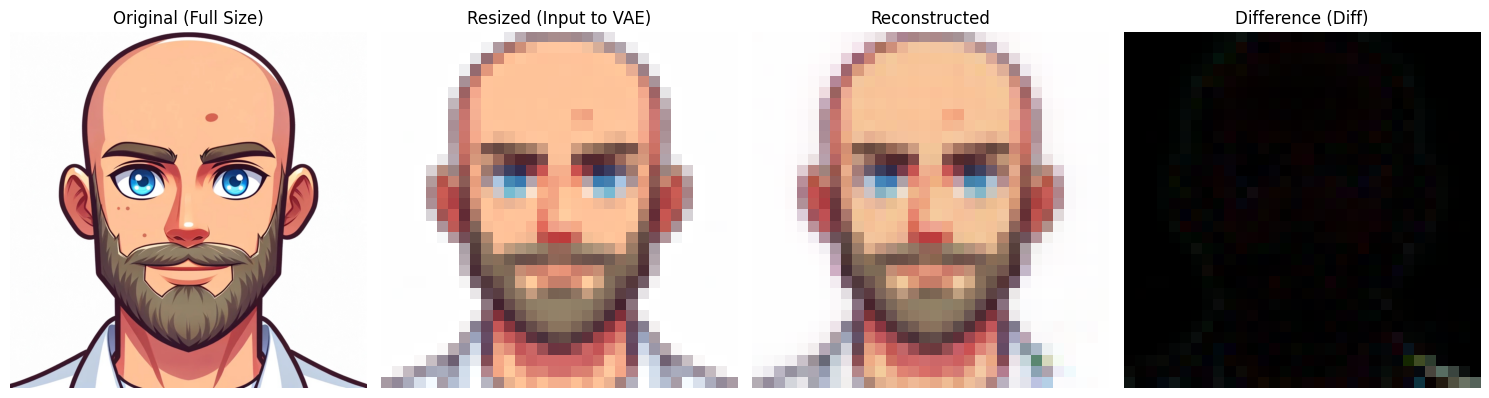

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

# Завантаження довільного зображення
image_path = "a_small.jpg"  # Змініть на шлях до вашого зображення
original_image = load_img(image_path)

image = original_image.resize((32, 32))  # Змінюємо розмір до 32x32
image_array = img_to_array(image) / 255.0  # Нормалізація в [0,1]
image_array = np.expand_dims(image_array, axis=0)  # Додаємо batch dimension

# Реконструкція
encoder_out = vae_model.encoder(image_array)
z_sample = encoder_out[2]  # латентний вектор
skip1, skip2, skip3, skip4 = encoder_out[3], encoder_out[4], encoder_out[5], encoder_out[6]

reconstructed = vae_model.decoder([z_sample, skip1, skip2, skip3, skip4])

# Обчислення різниці (diff)
diff = np.abs(image_array[0] - reconstructed[0])

# Візуалізація
plt.figure(figsize=(15, 5))

# Оригінал (повнорозмірне зображення)
plt.subplot(1, 4, 1)
plt.imshow(original_image)
plt.title("Original (Full Size)")
plt.axis('off')

# Resized (вхід моделі)
plt.subplot(1, 4, 2)
plt.imshow(image_array[0])
plt.title("Resized (Input to VAE)")
plt.axis('off')

# Реконструкція
plt.subplot(1, 4, 3)
plt.imshow(reconstructed[0])
plt.title("Reconstructed")
plt.axis('off')

# Різниця (diff)
plt.subplot(1, 4, 4)
plt.imshow(diff)
plt.title("Difference (Diff)")
plt.axis('off')

plt.tight_layout()
plt.show()

#### Висновки по роботі оптимізованої VAE з U-Net-архітектурою та skip-зʼєднаннями

1. **Якість реконструкції**:
   - Реконструйовані зображення демонструють помітне покращення порівняно з попередніми етапами. Skip-зʼєднання дозволяють краще зберігати деталі оригіналу, що зменшує артефакти.

2. **Значення втрат**:
   - **Реконструктивна втрата (MSE+L1)** поступово зменшилася з 53.2 до ~10.3, що свідчить про якісну реконструкцію зображень.
   - **KL-втрата** залишилася низькою (~0.001), що вказує на стабільність латентного простору.

3. **Прогрес навчання**:
   - Навчання відбувалося швидше за рахунок використання batch normalization та ефективного архітектурного дизайну.
   - Різке зниження втрат на перших епохах вказує на швидке засвоєння основних особливостей даних.

4. **Результати з довільними зображеннями**:
   - При обробці довільного зображення модель демонструє добре збереження загальних кольорів та форми, хоча деякі деталі можуть губитися.

5. **Візуальні зміни**:
   - Відмінності між оригіналами та реконструкціями значно зменшилися. Diff-карта вказує на точну передачу ключових областей зображення.

#### Порівняння з попередніми етапами:
- Використання skip-зʼєднань значно покращило передачу низькорівневих особливостей.
- Збільшення розміру латентного простору (512) дозволило моделі краще репрезентувати складні структури.
- Загальний час навчання трохи збільшився через більшу глибину архітектури, але це виправдано якістю результатів.

#### Загальний висновок:
Оптимізована VAE з U-Net-архітектурою демонструє значний прогрес у відтворенні деталей та стабільності латентного простору, забезпечуючи високу якість реконструкції навіть для складних зображень.

### Step 4 (on Step 2)

#### Визначення розміру латентного простору та фільтрів у шарах
##### Опис змін у Step 4 (on Step 2)

1. **Збільшення розміру латентного простору:**
   - `latent_dim` збільшено з **512** до **1024**.
   - Це дозволяє моделі зберігати більше інформації у латентному просторі, що може покращити якість реконструкцій, але може ускладнити навчання.

2. **Залишено архітектурні параметри з Step 2:**
   - Кількість фільтрів для енкодера та декодера не змінена.
   
##### Потенційний вплив
- Збільшений розмір латентного простору може покращити здатність моделі до реконструкції складних деталей, але також може призвести до перенавчання чи уповільнення навчання.
- У порівнянні з попередніми кроками, очікується покращення реконструкцій із можливими складнощами в стабільності KL-втрати.

In [ ]:
import tensorflow_addons as tfa

In [ ]:
num_filters_encoder = [128, 256, 512, 512, 512]
num_filters_decoder = [512, 512, 512, 256, 128]
latent_dim = 1024

In [ ]:
(x_train, _), (x_test, _) = keras.datasets.cifar10.load_data()
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0

print("x_train.shape =", x_train.shape)
print("x_test.shape  =", x_test.shape)

x_train.shape = (50000, 32, 32, 3)
x_test.shape  = (10000, 32, 32, 3)


#### Енкодер з Dropout та розширеним латентним простором

##### Порівняння з попередніми кроками:

1. **Архітектура енкодера**:
   - **Step 2**: П'ять згорткових шарів із фільтрами [128, 256, 512, 512, 512], без Dropout.
   - **Step 4**: До кожного згорткового блоку додано `Dropout(0.3)` після активації `ReLU`:
     ```python
     x = layers.Dropout(0.3)(x)
     ```

2. **Розмір латентного простору**:
   - **Step 2**: \( \text{latent_dim} = 512 \).
   - **Step 4**: \( \text{latent_dim} = 1024 \), що значно розширює можливості латентного простору для збереження інформації.

3. **Нормалізація через BatchNormalization**:
   - Присутня у всіх кроках, забезпечує стабільність та пришвидшення тренування.

##### Очікуваний ефект:
- **Переваги**:
  - Dropout зменшує ймовірність перенавчання, покращуючи узагальнюючу здатність моделі.
  - Розширений латентний простір дозволяє зберігати більше деталей для реконструкції складних зображень.
- **Ризики**:
  - Dropout може сповільнити збіжність через вимикання частини нейронів.
  - Збільшення параметрів через \( \text{latent_dim} = 1024 \) підвищує ризик перенавчання, якщо даних недостатньо або регуляризація слабка.

In [ ]:
########################################
# 2. Побудова енкодера
########################################
encoder_inputs = keras.Input(shape=(32, 32, 3))

x = encoder_inputs
for filters in num_filters_encoder:
    x = layers.Conv2D(filters, kernel_size=3, strides=2, padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.Dropout(0.3)(x)
    # Після 5 блоків (strides=2 кожен раз) розмір зменшиться 32 -> 16 -> 8 -> 4 -> 2 -> 1

x = layers.Flatten()(x)
# Проміжний щільний шар
x = layers.Dense(1024, activation='relu')(x)

# Окремі вихідні шари для mu та logvar
mu = layers.Dense(latent_dim, name='mu')(x)
logvar = layers.Dense(latent_dim, name='logvar')(x)

# Функція для sampling (репараметризація)
def sampling(args):
    mu_, logvar_ = args
    epsilon = tf.random.normal(shape=tf.shape(mu_))
    return mu_ + tf.exp(0.5 * logvar_) * epsilon

z = layers.Lambda(sampling, name='z')([mu, logvar])

encoder = keras.Model(encoder_inputs, [mu, logvar, z], name='encoder')
encoder.summary()


Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_17 (InputLayer)          [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d_86 (Conv2D)             (None, 16, 16, 128)  3456        ['input_17[0][0]']               
                                                                                                  
 batch_normalization_124 (Batch  (None, 16, 16, 128)  512        ['conv2d_86[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 re_lu_124 (ReLU)               (None, 16, 16, 128)  0           ['batch_normalization_124[0

#### Декодер з більшим латентним простором та BatchNormalization

##### Порівняння з попередніми кроками:

1. **Архітектура декодера**:
   - **Step 2**: П'ять блоків `Conv2DTranspose` з фільтрами [512, 512, 512, 256, 128]. Вихідні розміри поступово збільшуються від \(1 \times 1\) до \(32 \times 32\).
   - **Step 4**: Структура залишається такою ж, але використовує латентний простір \(1024\) замість \(512\).

2. **Вихідна Reshape**:
   - **Step 2**: \( \text{Reshape} \) у форму \( (1, 1, 512) \).
   - **Step 4**: Те ж саме, але з більшими параметрами через розширений латентний простір.

3. **BatchNormalization після кожного блоку**:
   - Продовжує стабілізувати навчання, забезпечуючи кращу збіжність.

##### Очікуваний ефект:
- **Переваги**:
  - Збільшення латентного простору дозволяє зберігати більше інформації для відновлення зображень.
  - Послідовна нормалізація покращує якість реконструкцій, особливо при роботі з глибокими шарами.
- **Ризики**:
  - Можливе перенавчання через велику кількість параметрів, особливо на маленьких наборах даних.
  - Розмір латентного простору \(1024\) може бути надлишковим для відносно невеликих зображень \(32 \times 32\).

In [ ]:
########################################
# 3. Побудова декодера
########################################
latent_inputs = keras.Input(shape=(latent_dim,))

# Декодуємо в 1×1×512 (або 2×2×512), залежить від того, який розмір був на виході енкодера.
# Якщо 5 блоків Conv2D(strides=2) скоротять 32×32 → 1×1 (при ідеальному діленні),
# то в декодері можна просто Reshape( (1,1,512) ).
# Якщо в процесі виникають проблеми з розмірами, можна перевірити,
# чи потрібно використати (2,2,512) і зробити strides=2 у меншій кількості блоків, тощо.

x = layers.Dense(1 * 1 * num_filters_decoder[0], activation='relu')(latent_inputs)
x = layers.Reshape((1, 1, num_filters_decoder[0]))(x)

# Тепер «розгортаємося» назад до 32×32
for filters in num_filters_decoder:
    x = layers.Conv2DTranspose(filters, kernel_size=3, strides=2, padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    # Поступово збільшиться: 1×1 → 2×2 → 4×4 → 8×8 → 16×16 → 32×32

# Завершальний шар на 3 канали
decoder_outputs = layers.Conv2DTranspose(3, kernel_size=3, padding='same', activation='sigmoid')(x)

decoder = keras.Model(latent_inputs, decoder_outputs, name='decoder')
decoder.summary()


Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_18 (InputLayer)       [(None, 1024)]            0         
                                                                 
 dense_25 (Dense)            (None, 512)               524800    
                                                                 
 reshape_12 (Reshape)        (None, 1, 1, 512)         0         
                                                                 
 conv2d_transpose_50 (Conv2D  (None, 2, 2, 512)        2359296   
 Transpose)                                                      
                                                                 
 batch_normalization_129 (Ba  (None, 2, 2, 512)        2048      
 tchNormalization)                                               
                                                                 
 re_lu_129 (ReLU)            (None, 2, 2, 512)         0   

#### VAE з комбінованою функцією втрат (MSE + L1)

##### Порівняння з попередніми кроками:

1. **Функція втрат**:
   - **Step 1**: Використовувалася лише MSE для реконструктивної втрати.
   - **Step 2–3**: Додана комбінація MSE і L1 з ваговим параметром \(\alpha\).
   - **Step 4**: Залишається комбінована функція втрат з можливістю налаштування \(\alpha\).

2. **Реконструктивна втрата**:
   - Обчислюється як \( \text{MSE} + \alpha \cdot \text{L1} \), що дозволяє враховувати як великі, так і дрібні відмінності між зображеннями.

3. **KL-втрата**:
   - Формула залишається незмінною, забезпечуючи регуляризацію латентного простору.

##### Очікуваний ефект:
- **Переваги**:
  - Комбінація MSE і L1 робить модель більш чутливою до різних типів помилок у реконструкції, що сприяє кращій візуальній якості.
  - Гнучкість параметра \(\alpha\) дозволяє балансувати між точністю і гладкістю реконструкції.
- **Ризики**:
  - Неправильно підібране \(\alpha\) може призвести до втрати дрібних деталей або недостатньої точності реконструкцій.
  - Підвищені обчислювальні витрати через складнішу функцію втрат.

In [ ]:
class VAE(keras.Model):
    def __init__(self, encoder, decoder, alpha=0.5, **kwargs):
        """
        Параметр alpha визначає вагу для L1.
        Наприклад, якщо alpha=0.5, тоді:
          reconstruction_loss = 0.5 * MSE + 0.5 * L1
        """
        super(VAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.alpha = alpha

        self.total_loss_tracker = keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = keras.metrics.Mean(name="reconstruction_loss")
        self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")

    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
        ]

    def call(self, inputs, training=None, mask=None):
        mu_, logvar_, z_ = self.encoder(inputs)
        return self.decoder(z_)

    def train_step(self, data):
        if isinstance(data, tuple):
            data = data[0]

        with tf.GradientTape() as tape:
            mu_, logvar_, z_ = self.encoder(data, training=True)
            reconstruction = self.decoder(z_, training=True)

            # ========= MSE part =========
            reconstruction_loss_mse = tf.reduce_mean(
                tf.reduce_sum(
                    tf.keras.losses.mean_squared_error(data, reconstruction),
                    axis=(1,2)  # msekra sum по (H,W)
                )
            )

            # ========= L1 part (MAE) =========
            reconstruction_loss_l1 = tf.reduce_mean(
                tf.reduce_sum(
                    tf.abs(data - reconstruction),
                    axis=(1,2,3)
                )
            )

            # Комбінація MSE + L1
            reconstruction_loss = (1.0 - self.alpha)*reconstruction_loss_mse + self.alpha*reconstruction_loss_l1

            # KL-втрата
            kl_loss = 1 + logvar_ - tf.square(mu_) - tf.exp(logvar_)
            kl_loss = -0.5 * tf.reduce_mean(tf.reduce_sum(kl_loss, axis=1))

            total_loss = reconstruction_loss + kl_loss

        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))

        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)

        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }


#### Впровадження навчального процесу з адаптивним оптимізатором (AdamW + Polynomial Decay)

##### Порівняння з попередніми кроками:

1. **Оптимізатор**:
   - **Step 1–3**: Використовувався стандартний Adam з фіксованою швидкістю навчання.
   - **Step 4**: Перехід до **AdamW** (Adam із ваговим згасанням), що покращує регуляризацію ваг і знижує ризик перенавчання.

2. **Графік навчальної швидкості**:
   - **Раніше**: Фіксований learning rate (\(1e-4\)).
   - **Тепер**: Використовується **Polynomial Decay** для поступового зниження швидкості навчання:
     - Початковий \(1e-4\).
     - Плавний спад до \(1e-6\) протягом \(5000\) кроків.

##### Очікуваний ефект:
- **Переваги**:
  - **AdamW** сприяє покращенню узагальнення моделі, мінімізуючи перенавчання.
  - **Polynomial Decay** дозволяє більш ефективно стабілізувати процес навчання, особливо на пізніх етапах.
- **Ризики**:
  - Занадто швидке або повільне зменшення learning rate може вплинути на ефективність тренування.
  - Залежність від точного налаштування параметрів графіка.

In [ ]:
# Створюємо модель
vae_model = VAE(encoder, decoder)

initial_learning_rate = 1e-4
lr_schedule = tf.keras.optimizers.schedules.PolynomialDecay(
    initial_learning_rate=initial_learning_rate,
    decay_steps=5000,  # Поступове зменшення протягом кількох кроків
    end_learning_rate=1e-6
)

optimizer = tfa.optimizers.AdamW(
    learning_rate=lr_schedule,
    weight_decay=1e-4  # Регуляризація ваг
)

vae_model.compile(optimizer=optimizer, loss=lambda y_true, y_pred: 0.0)


#### Callback для візуалізації прогресу генерації зображень

##### Порівняння з попередніми кроками:

1. **Призначення**:
   - **Step 1–3**: Аналогічний `Callback` для реконструкцій або генерації використовувався, але з меншою деталізацією.
   - **Step 4**: Залишено ту ж ідею, але тепер **латентний простір збільшено до 1024**, що дозволяє генерувати зображення з більш складними ознаками.

2. **Інтервал генерації**:
   - Вивід картинок після кожних \(10\) епох для оцінки прогресу навчання.

##### Очікуваний ефект:
- **Переваги**:
  - Спрощує моніторинг якості генерації зображень у реальному часі.
  - Можливість виявити проблеми з навчанням ще до завершення всіх епох.
- **Ризики**:
  - Залежність від якісної інтерпретації зображень оператором.
  - Занадто частий вивід може уповільнити навчання.

In [ ]:
###############################################
# 4. Callback для виводу зображень кожні 10 епох
###############################################
class GenerateImagesCallback(keras.callbacks.Callback):
    def __init__(self, model, latent_dim=512, interval=10, n_images=5):
        """
        model: ваш VAE-об'єкт (що має .decoder)
        latent_dim: розмір латентного простору
        interval: виводити картинки кожні 'interval' епох
        n_images: скільки картинок генерувати
        """
        super().__init__()
        self.model = model
        self.latent_dim = latent_dim
        self.interval = interval
        self.n_images = n_images

    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % self.interval == 0:
            # Генеруємо випадкові z-вектори
            z_random = tf.random.normal(shape=(self.n_images, self.latent_dim))
            # Пропускаємо через декодер
            generated_images = self.model.decoder(z_random)

            # Виводимо
            print(f"\n[Callback] Згенеровані зображення після {epoch+1} епох:")
            plt.figure(figsize=(15,3))
            for i in range(self.n_images):
                ax = plt.subplot(1, self.n_images, i+1)
                plt.imshow(generated_images[i])
                plt.axis("off")
            plt.suptitle(f"Epoch {epoch+1}")
            plt.show()


#### Тривале навчання з великою кількістю епох і великим batch size

##### Порівняння з попередніми кроками:

1. **Кількість епох**:
   - **Step 1–3**: Використовувалося до 50 епох.
   - **Step 4**: Збільшено до 500 епох для досягнення глибшої збіжності.

2. **Batch size**:
   - **Step 1–2**: 128 або 64.
   - **Step 4**: Значно збільшено до 1024, що сприяє стабільності градієнтів і швидшому проходженню даних.

3. **Callbacks**:
   - Регулярна візуалізація прогресу через `GenerateImagesCallback`.

##### Очікуваний ефект:
- **Переваги**:
  - Тривале навчання дозволяє VAE краще вивчити латентний простір і покращити реконструкцію.
  - Збільшений batch size сприяє більш стабільному оновленню ваг.
- **Ризики**:
  - Може призвести до перенавчання при недостатній регуляризації.
  - Тривалий час тренування через більшу кількість епох.

Epoch 1/500
49/49 [==============================] - 8s 127ms/step - loss: 457.2730 - reconstruction_loss: 358.7867 - kl_loss: 38.1997 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 2/500
49/49 [==============================] - 5s 107ms/step - loss: 350.6950 - reconstruction_loss: 349.1362 - kl_loss: 1.0763 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 3/500
49/49 [==============================] - 5s 108ms/step - loss: 349.5801 - reconstruction_loss: 349.0051 - kl_loss: 0.4703 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 4/500
49/49 [==============================] - 5s 109ms/step - loss: 349.1997 - reconstruction_loss: 348.9670 - kl_loss: 0.3158 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 5/500
49/49 [==============================] - 5s 107ms/step - loss: 348.8928 - recon

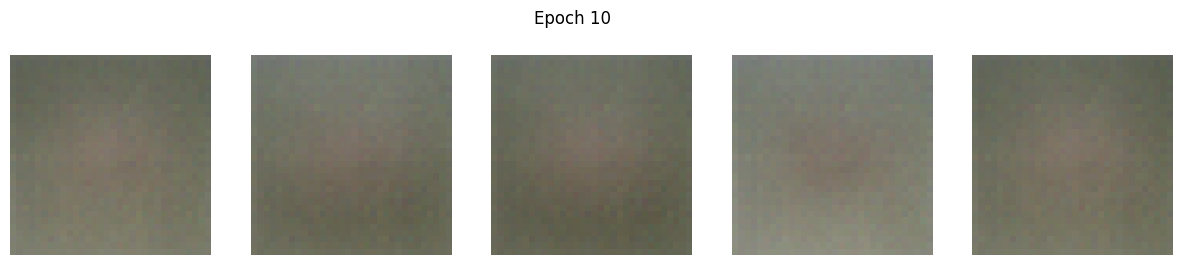

49/49 [==============================] - 5s 111ms/step - loss: 274.4035 - reconstruction_loss: 262.9992 - kl_loss: 10.9863 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 11/500
49/49 [==============================] - 5s 108ms/step - loss: 272.6898 - reconstruction_loss: 262.0010 - kl_loss: 10.7930 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 12/500
49/49 [==============================] - 5s 107ms/step - loss: 272.5471 - reconstruction_loss: 261.4814 - kl_loss: 10.6753 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 13/500
49/49 [==============================] - 5s 108ms/step - loss: 271.7436 - reconstruction_loss: 261.1068 - kl_loss: 10.5992 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 14/500
49/49 [==============================] - 5s 108ms/step - loss: 271.2230 - reconstruc

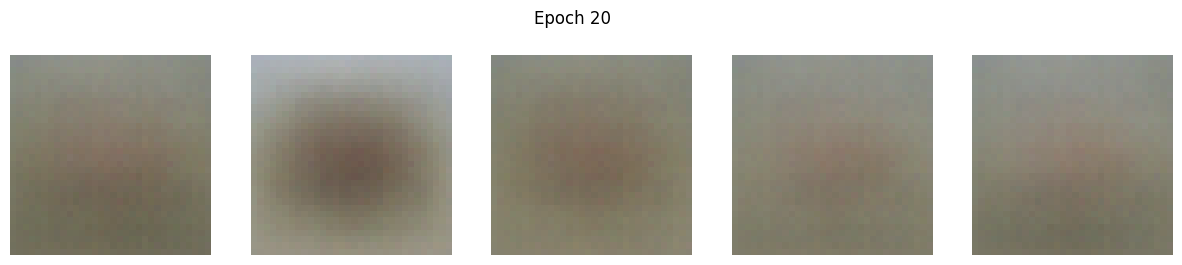

49/49 [==============================] - 6s 113ms/step - loss: 260.0553 - reconstruction_loss: 246.5578 - kl_loss: 13.2388 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 21/500
49/49 [==============================] - 5s 109ms/step - loss: 259.1288 - reconstruction_loss: 245.9082 - kl_loss: 13.1416 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 22/500
49/49 [==============================] - 5s 108ms/step - loss: 258.6262 - reconstruction_loss: 245.5056 - kl_loss: 13.1438 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 23/500
49/49 [==============================] - 5s 108ms/step - loss: 258.5868 - reconstruction_loss: 245.2324 - kl_loss: 13.2158 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 24/500
49/49 [==============================] - 5s 108ms/step - loss: 258.3151 - reconstruc

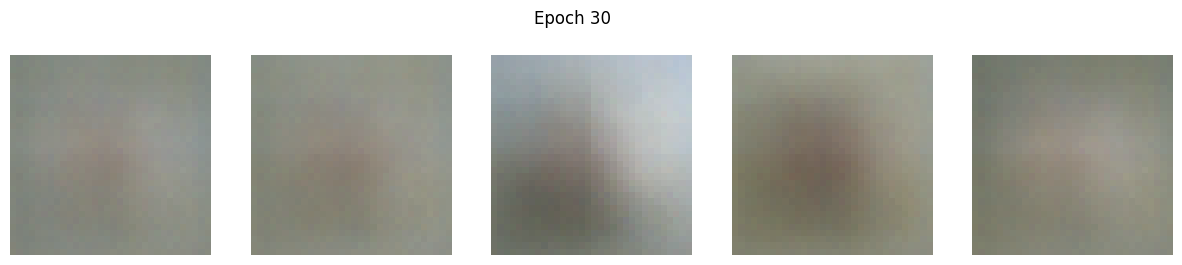

49/49 [==============================] - 6s 113ms/step - loss: 252.9585 - reconstruction_loss: 237.3591 - kl_loss: 15.1286 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 31/500
49/49 [==============================] - 5s 108ms/step - loss: 252.6863 - reconstruction_loss: 236.7339 - kl_loss: 15.2525 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 32/500
49/49 [==============================] - 5s 108ms/step - loss: 251.3741 - reconstruction_loss: 235.8785 - kl_loss: 15.3341 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 33/500
49/49 [==============================] - 5s 108ms/step - loss: 251.0921 - reconstruction_loss: 235.0496 - kl_loss: 15.4915 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 34/500
49/49 [==============================] - 5s 108ms/step - loss: 249.7149 - reconstruc

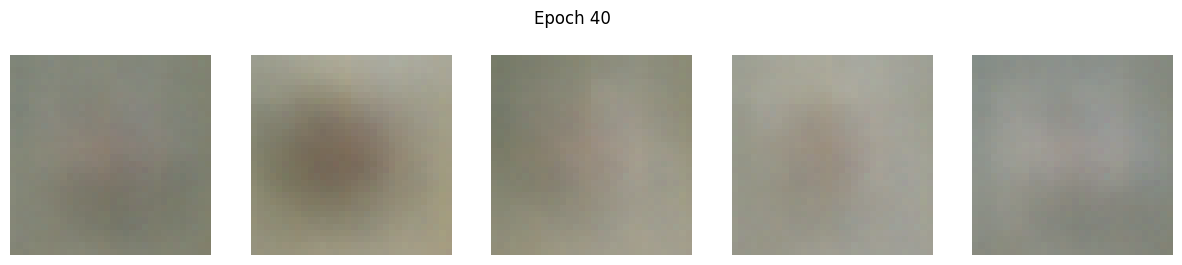

49/49 [==============================] - 6s 112ms/step - loss: 244.1795 - reconstruction_loss: 227.1946 - kl_loss: 17.0332 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 41/500
49/49 [==============================] - 5s 109ms/step - loss: 243.2675 - reconstruction_loss: 226.0913 - kl_loss: 17.2989 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 42/500
49/49 [==============================] - 5s 108ms/step - loss: 242.1987 - reconstruction_loss: 224.5511 - kl_loss: 17.6971 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 43/500
49/49 [==============================] - 5s 109ms/step - loss: 241.6370 - reconstruction_loss: 223.3491 - kl_loss: 18.0653 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 44/500
49/49 [==============================] - 5s 109ms/step - loss: 240.7751 - reconstruc

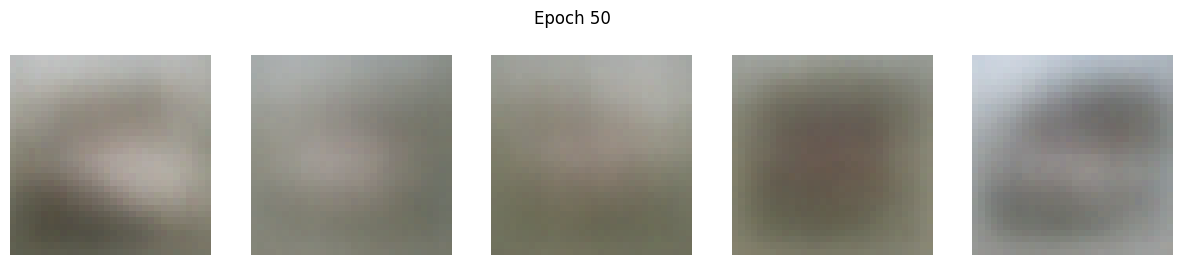

49/49 [==============================] - 5s 112ms/step - loss: 238.2842 - reconstruction_loss: 219.4234 - kl_loss: 18.9322 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 51/500
49/49 [==============================] - 5s 107ms/step - loss: 237.8363 - reconstruction_loss: 218.8567 - kl_loss: 19.0346 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 52/500
49/49 [==============================] - 5s 108ms/step - loss: 237.7315 - reconstruction_loss: 218.4180 - kl_loss: 19.1177 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 53/500
49/49 [==============================] - 5s 108ms/step - loss: 236.9437 - reconstruction_loss: 217.9442 - kl_loss: 19.2725 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 54/500
49/49 [==============================] - 5s 107ms/step - loss: 237.1774 - reconstruc

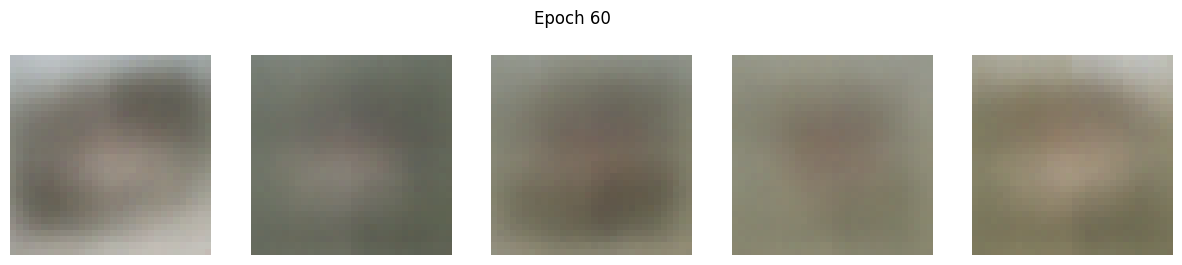

49/49 [==============================] - 6s 113ms/step - loss: 233.9943 - reconstruction_loss: 213.5214 - kl_loss: 20.3068 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 61/500
49/49 [==============================] - 5s 108ms/step - loss: 233.1088 - reconstruction_loss: 212.6528 - kl_loss: 20.5322 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 62/500
49/49 [==============================] - 5s 109ms/step - loss: 232.8674 - reconstruction_loss: 212.2811 - kl_loss: 20.6459 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 63/500
49/49 [==============================] - 5s 108ms/step - loss: 232.7702 - reconstruction_loss: 211.7193 - kl_loss: 20.8037 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 64/500
49/49 [==============================] - 5s 108ms/step - loss: 232.7141 - reconstruc

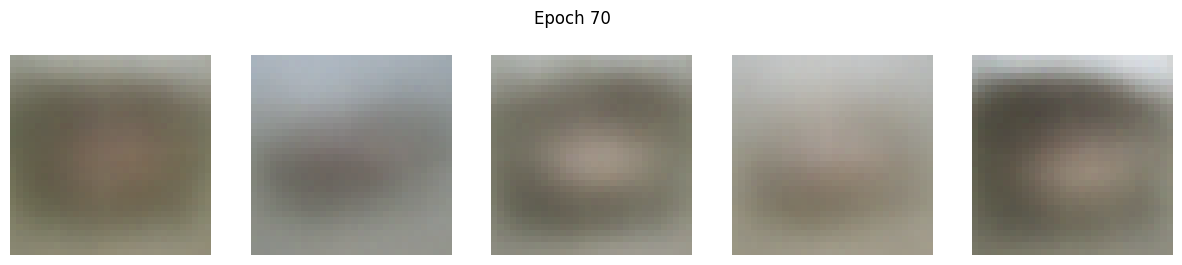

49/49 [==============================] - 5s 112ms/step - loss: 230.9663 - reconstruction_loss: 209.8803 - kl_loss: 21.0413 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 71/500
49/49 [==============================] - 5s 107ms/step - loss: 231.0834 - reconstruction_loss: 209.6333 - kl_loss: 21.1061 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 72/500
49/49 [==============================] - 5s 107ms/step - loss: 230.4497 - reconstruction_loss: 209.5893 - kl_loss: 21.0644 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 73/500
49/49 [==============================] - 5s 108ms/step - loss: 230.4388 - reconstruction_loss: 209.2729 - kl_loss: 21.0683 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 74/500
49/49 [==============================] - 5s 108ms/step - loss: 230.3263 - reconstruc

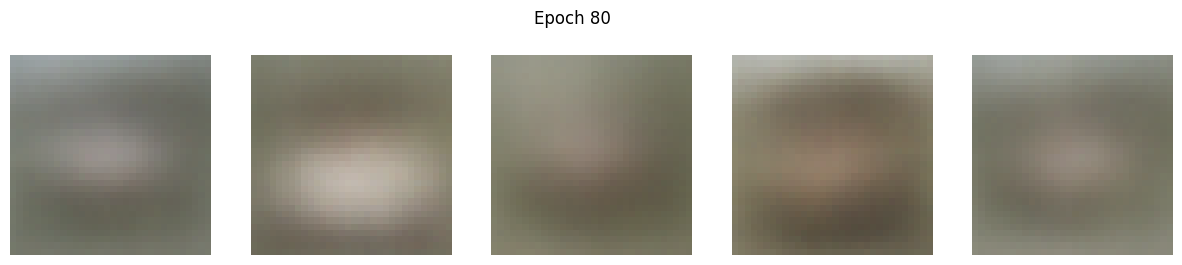

49/49 [==============================] - 6s 112ms/step - loss: 229.7040 - reconstruction_loss: 208.5714 - kl_loss: 21.0663 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 81/500
49/49 [==============================] - 5s 107ms/step - loss: 229.5057 - reconstruction_loss: 208.3971 - kl_loss: 21.0428 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 82/500
49/49 [==============================] - 5s 108ms/step - loss: 229.5850 - reconstruction_loss: 208.3939 - kl_loss: 20.9937 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 83/500
49/49 [==============================] - 5s 107ms/step - loss: 229.5957 - reconstruction_loss: 208.2477 - kl_loss: 21.0360 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 84/500
49/49 [==============================] - 5s 107ms/step - loss: 228.9019 - reconstruc

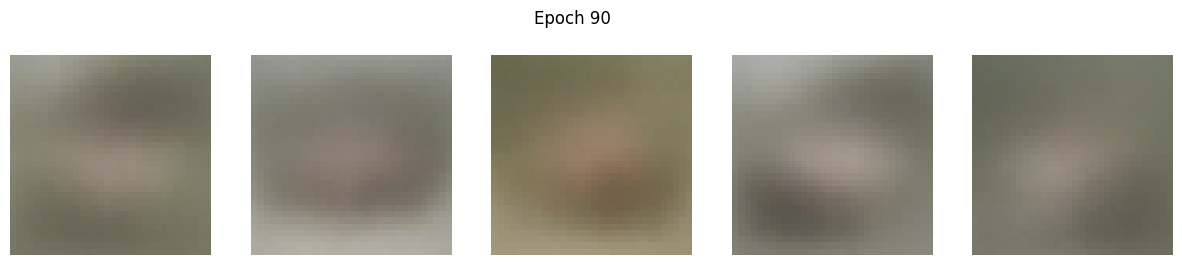

49/49 [==============================] - 5s 111ms/step - loss: 228.5890 - reconstruction_loss: 207.8802 - kl_loss: 20.8517 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 91/500
49/49 [==============================] - 5s 107ms/step - loss: 228.3869 - reconstruction_loss: 207.8101 - kl_loss: 20.8098 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 92/500
49/49 [==============================] - 5s 107ms/step - loss: 228.8665 - reconstruction_loss: 207.9062 - kl_loss: 20.7548 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 93/500
49/49 [==============================] - 5s 108ms/step - loss: 227.8189 - reconstruction_loss: 207.8533 - kl_loss: 20.6905 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 94/500
49/49 [==============================] - 5s 107ms/step - loss: 228.6032 - reconstruc

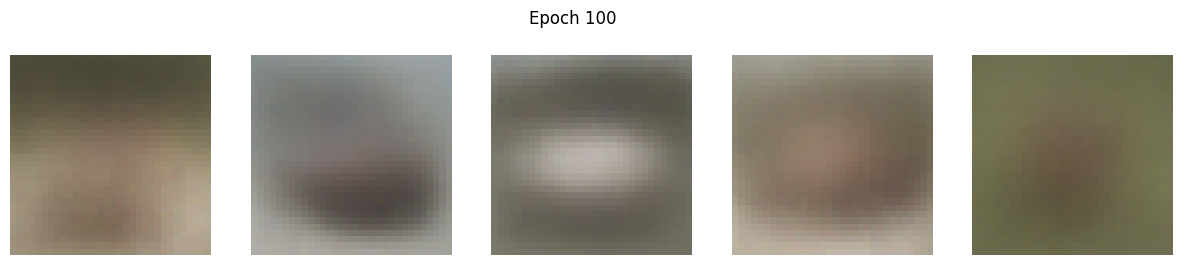

49/49 [==============================] - 5s 112ms/step - loss: 228.2997 - reconstruction_loss: 208.5722 - kl_loss: 19.8027 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 101/500
49/49 [==============================] - 5s 107ms/step - loss: 228.8098 - reconstruction_loss: 208.8426 - kl_loss: 19.6036 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 102/500
49/49 [==============================] - 5s 107ms/step - loss: 228.5228 - reconstruction_loss: 209.1209 - kl_loss: 19.2953 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 103/500
49/49 [==============================] - 5s 108ms/step - loss: 228.2070 - reconstruction_loss: 209.5816 - kl_loss: 18.9271 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 104/500
49/49 [==============================] - 5s 107ms/step - loss: 228.8935 - recons

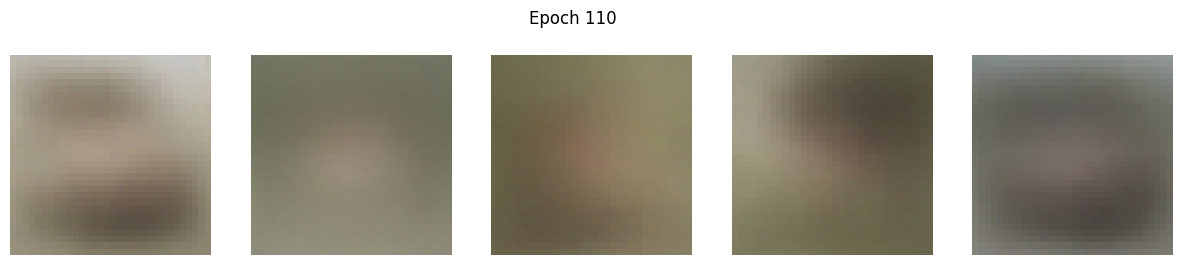

49/49 [==============================] - 6s 114ms/step - loss: 229.7557 - reconstruction_loss: 212.5178 - kl_loss: 16.9820 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 111/500
49/49 [==============================] - 5s 107ms/step - loss: 229.7175 - reconstruction_loss: 212.7986 - kl_loss: 16.7940 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 112/500
49/49 [==============================] - 5s 108ms/step - loss: 229.5736 - reconstruction_loss: 212.9685 - kl_loss: 16.5890 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 113/500
49/49 [==============================] - 5s 108ms/step - loss: 230.2697 - reconstruction_loss: 213.4249 - kl_loss: 16.4344 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 114/500
49/49 [==============================] - 5s 108ms/step - loss: 229.9742 - recons

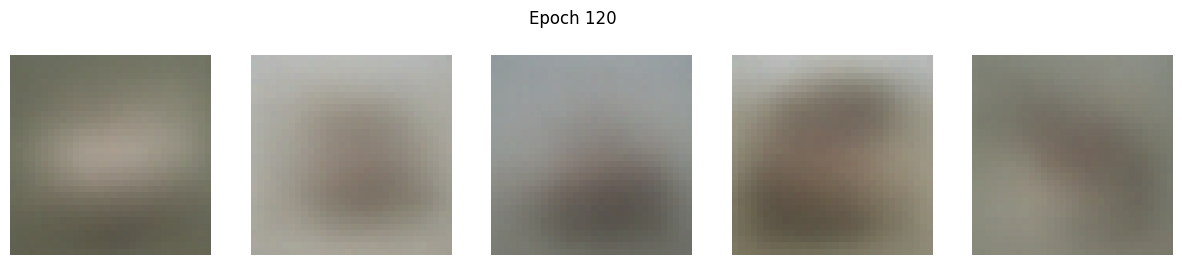

49/49 [==============================] - 5s 112ms/step - loss: 230.5892 - reconstruction_loss: 215.4374 - kl_loss: 15.4163 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 121/500
49/49 [==============================] - 5s 107ms/step - loss: 231.1686 - reconstruction_loss: 215.6007 - kl_loss: 15.3039 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 122/500
49/49 [==============================] - 5s 108ms/step - loss: 230.9519 - reconstruction_loss: 215.7454 - kl_loss: 15.1826 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 123/500
49/49 [==============================] - 5s 107ms/step - loss: 231.1718 - reconstruction_loss: 216.3199 - kl_loss: 14.9674 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 125/500
49/49 [==============================] - 5s 108ms/step - loss: 231.3637 - recons

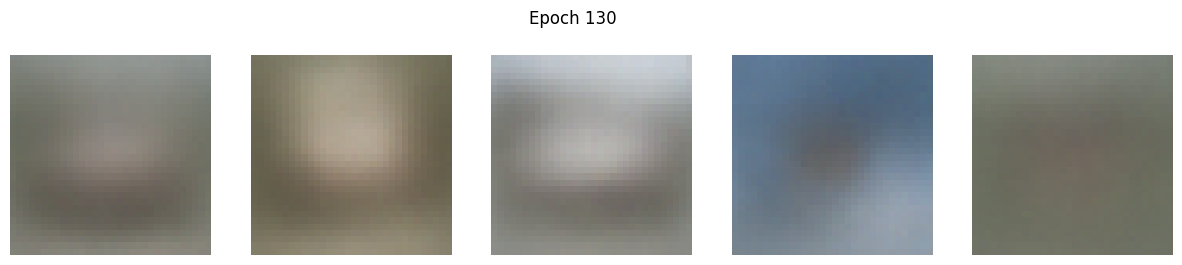

49/49 [==============================] - 6s 120ms/step - loss: 232.4193 - reconstruction_loss: 217.6615 - kl_loss: 14.4280 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 131/500
49/49 [==============================] - 5s 108ms/step - loss: 232.2252 - reconstruction_loss: 217.8056 - kl_loss: 14.3703 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 132/500
49/49 [==============================] - 5s 109ms/step - loss: 232.5243 - reconstruction_loss: 218.2596 - kl_loss: 14.2693 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 133/500
49/49 [==============================] - 5s 108ms/step - loss: 232.4748 - reconstruction_loss: 218.4302 - kl_loss: 14.1983 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 134/500
49/49 [==============================] - 5s 107ms/step - loss: 232.8324 - recons

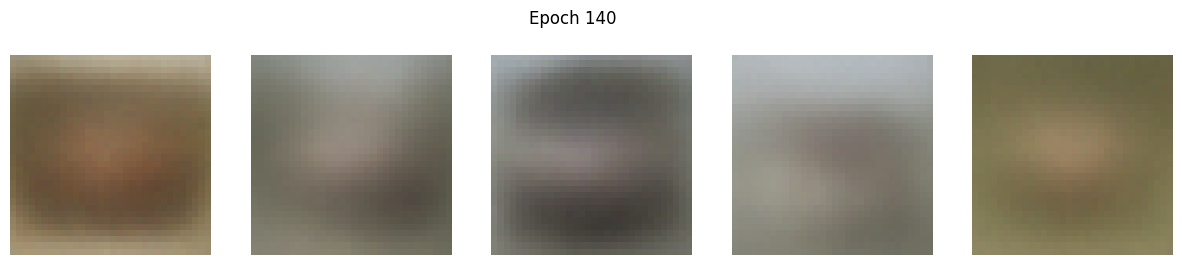

49/49 [==============================] - 6s 113ms/step - loss: 232.9765 - reconstruction_loss: 219.6369 - kl_loss: 13.7624 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 141/500
49/49 [==============================] - 5s 108ms/step - loss: 233.9312 - reconstruction_loss: 219.9973 - kl_loss: 13.7132 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 142/500
49/49 [==============================] - 5s 109ms/step - loss: 233.9422 - reconstruction_loss: 220.1743 - kl_loss: 13.6785 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 143/500
49/49 [==============================] - 5s 109ms/step - loss: 233.5641 - reconstruction_loss: 220.2277 - kl_loss: 13.6376 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 144/500
49/49 [==============================] - 5s 108ms/step - loss: 234.0653 - recons

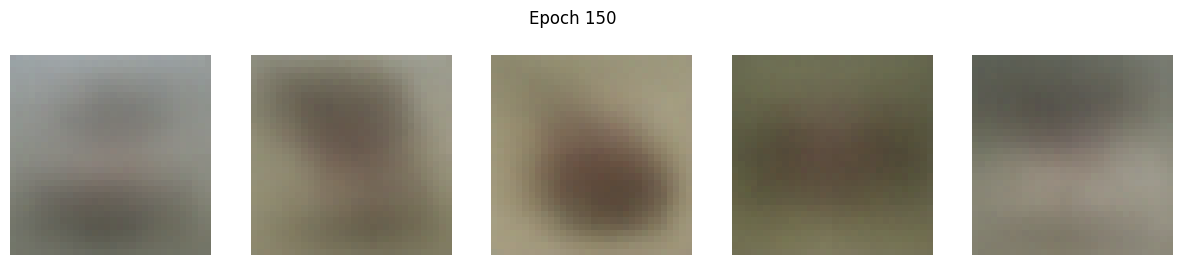

49/49 [==============================] - 5s 111ms/step - loss: 235.3445 - reconstruction_loss: 221.4475 - kl_loss: 13.3376 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 151/500
49/49 [==============================] - 5s 108ms/step - loss: 235.0376 - reconstruction_loss: 221.6051 - kl_loss: 13.2988 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 152/500
49/49 [==============================] - 5s 108ms/step - loss: 235.3513 - reconstruction_loss: 221.7122 - kl_loss: 13.2698 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 153/500
49/49 [==============================] - 5s 109ms/step - loss: 235.4647 - reconstruction_loss: 221.9840 - kl_loss: 13.2395 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 154/500
49/49 [==============================] - 5s 108ms/step - loss: 235.4943 - recons

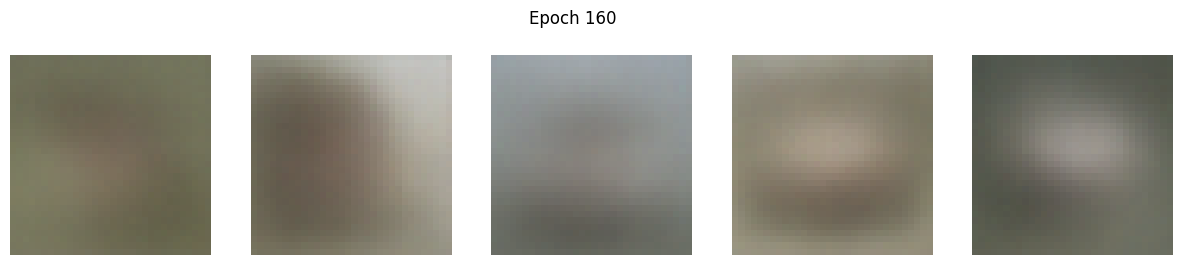

49/49 [==============================] - 5s 112ms/step - loss: 235.7097 - reconstruction_loss: 222.8226 - kl_loss: 13.1081 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 161/500
49/49 [==============================] - 5s 109ms/step - loss: 235.6469 - reconstruction_loss: 222.8818 - kl_loss: 13.0863 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 162/500
49/49 [==============================] - 5s 109ms/step - loss: 235.9115 - reconstruction_loss: 223.1315 - kl_loss: 13.0821 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 163/500
49/49 [==============================] - 5s 108ms/step - loss: 235.8725 - reconstruction_loss: 223.2145 - kl_loss: 13.0590 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 164/500
49/49 [==============================] - 5s 108ms/step - loss: 236.7292 - recons

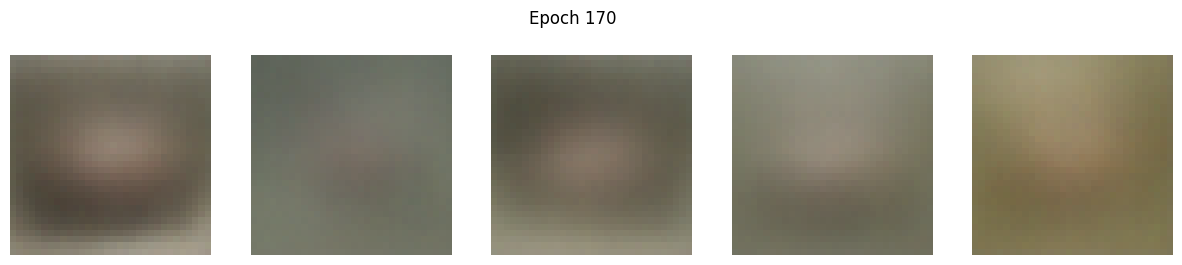

49/49 [==============================] - 5s 112ms/step - loss: 236.8581 - reconstruction_loss: 224.1213 - kl_loss: 12.9827 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 171/500
49/49 [==============================] - 5s 109ms/step - loss: 236.6328 - reconstruction_loss: 224.2352 - kl_loss: 12.9548 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 172/500
49/49 [==============================] - 5s 109ms/step - loss: 236.9870 - reconstruction_loss: 224.1225 - kl_loss: 12.9566 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 173/500
49/49 [==============================] - 5s 109ms/step - loss: 237.3250 - reconstruction_loss: 224.2971 - kl_loss: 12.9432 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 174/500
49/49 [==============================] - 5s 110ms/step - loss: 237.4132 - recons

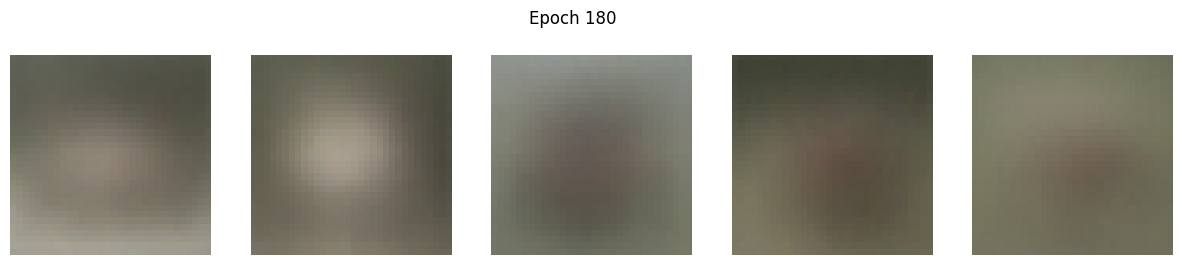

49/49 [==============================] - 6s 114ms/step - loss: 238.2375 - reconstruction_loss: 224.8656 - kl_loss: 12.9064 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 181/500
49/49 [==============================] - 5s 108ms/step - loss: 238.2978 - reconstruction_loss: 225.1890 - kl_loss: 12.9070 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 182/500
49/49 [==============================] - 5s 108ms/step - loss: 237.9757 - reconstruction_loss: 225.0332 - kl_loss: 12.8940 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 183/500
49/49 [==============================] - 5s 108ms/step - loss: 237.7955 - reconstruction_loss: 225.1203 - kl_loss: 12.8922 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 184/500
49/49 [==============================] - 5s 107ms/step - loss: 238.3734 - recons

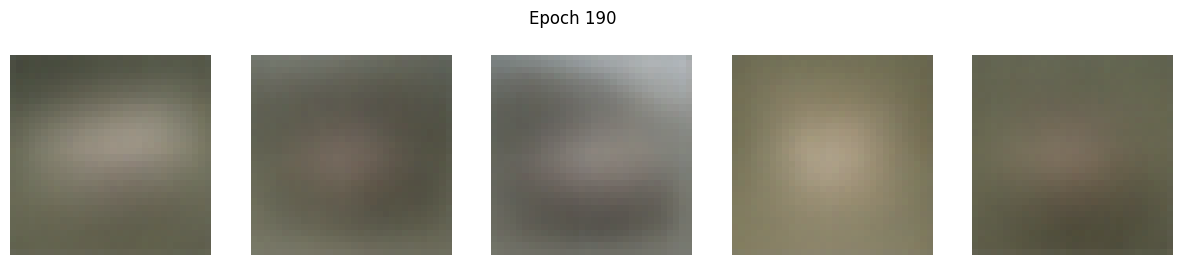

49/49 [==============================] - 6s 113ms/step - loss: 238.2843 - reconstruction_loss: 225.6077 - kl_loss: 12.8687 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 191/500
49/49 [==============================] - 5s 108ms/step - loss: 239.0217 - reconstruction_loss: 225.9719 - kl_loss: 12.8553 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 192/500
49/49 [==============================] - 5s 108ms/step - loss: 239.1184 - reconstruction_loss: 225.9197 - kl_loss: 12.8535 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 193/500
49/49 [==============================] - 5s 108ms/step - loss: 238.9334 - reconstruction_loss: 225.9812 - kl_loss: 12.8600 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 194/500
49/49 [==============================] - 5s 107ms/step - loss: 239.3557 - recons

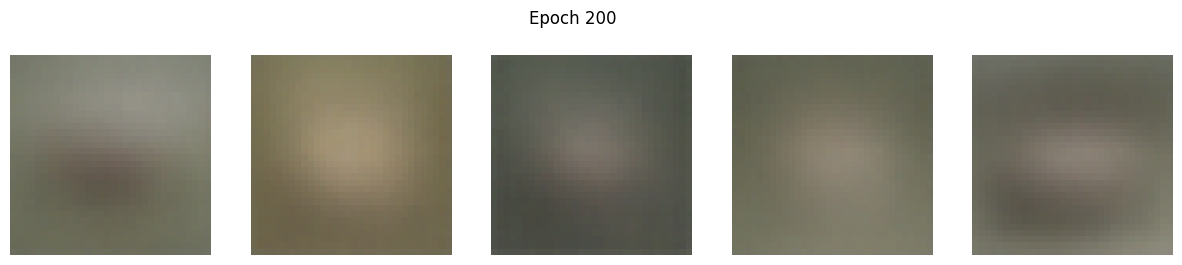

49/49 [==============================] - 6s 113ms/step - loss: 238.9698 - reconstruction_loss: 226.1382 - kl_loss: 12.8422 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 201/500
49/49 [==============================] - 5s 108ms/step - loss: 238.9738 - reconstruction_loss: 226.4112 - kl_loss: 12.8186 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 202/500
49/49 [==============================] - 5s 108ms/step - loss: 239.3497 - reconstruction_loss: 226.4242 - kl_loss: 12.8072 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 203/500
49/49 [==============================] - 5s 108ms/step - loss: 238.6719 - reconstruction_loss: 226.4430 - kl_loss: 12.7948 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 204/500
49/49 [==============================] - 5s 109ms/step - loss: 239.3523 - recons

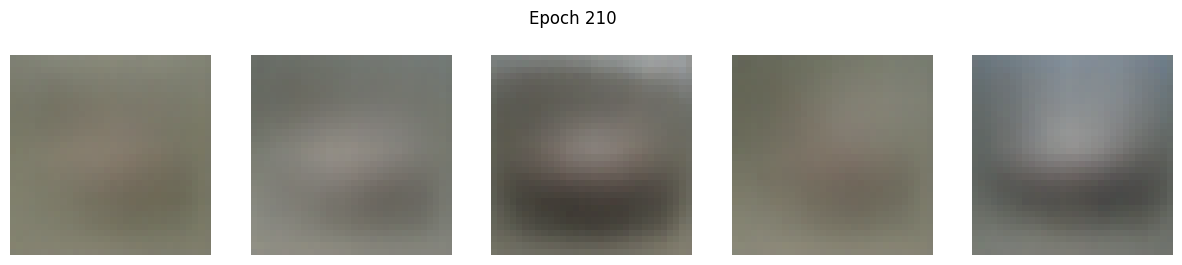

49/49 [==============================] - 5s 112ms/step - loss: 239.4288 - reconstruction_loss: 226.6906 - kl_loss: 12.8002 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 211/500
49/49 [==============================] - 5s 108ms/step - loss: 240.1714 - reconstruction_loss: 226.8789 - kl_loss: 12.7734 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 212/500
49/49 [==============================] - 5s 108ms/step - loss: 239.7836 - reconstruction_loss: 226.9670 - kl_loss: 12.7677 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 213/500
49/49 [==============================] - 5s 108ms/step - loss: 239.7471 - reconstruction_loss: 226.8534 - kl_loss: 12.7690 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 214/500
49/49 [==============================] - 5s 108ms/step - loss: 239.5401 - recons

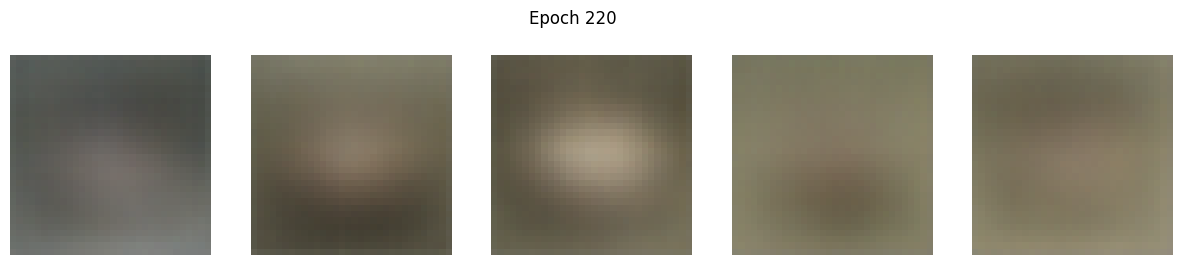

49/49 [==============================] - 6s 113ms/step - loss: 240.2485 - reconstruction_loss: 227.1686 - kl_loss: 12.7233 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 221/500
49/49 [==============================] - 5s 109ms/step - loss: 240.3558 - reconstruction_loss: 227.3444 - kl_loss: 12.7174 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 222/500
49/49 [==============================] - 5s 108ms/step - loss: 240.2184 - reconstruction_loss: 227.4521 - kl_loss: 12.7205 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 223/500
49/49 [==============================] - 5s 108ms/step - loss: 239.3723 - reconstruction_loss: 227.2813 - kl_loss: 12.7055 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 224/500
49/49 [==============================] - 5s 108ms/step - loss: 240.0657 - recons

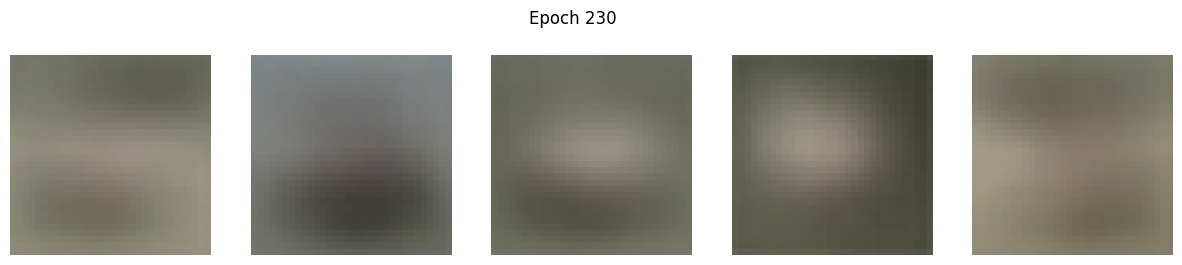

49/49 [==============================] - 5s 112ms/step - loss: 240.1409 - reconstruction_loss: 227.7460 - kl_loss: 12.6119 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 231/500
49/49 [==============================] - 5s 107ms/step - loss: 240.7491 - reconstruction_loss: 227.8333 - kl_loss: 12.6270 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 232/500
49/49 [==============================] - 5s 108ms/step - loss: 241.0157 - reconstruction_loss: 227.9492 - kl_loss: 12.6018 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 233/500
49/49 [==============================] - 5s 108ms/step - loss: 240.4172 - reconstruction_loss: 227.9765 - kl_loss: 12.5990 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 234/500
49/49 [==============================] - 5s 108ms/step - loss: 241.1449 - recons

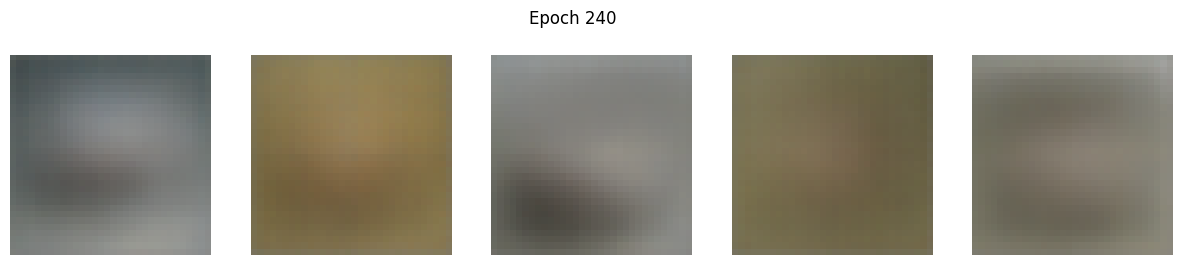

49/49 [==============================] - 6s 113ms/step - loss: 241.3284 - reconstruction_loss: 228.5454 - kl_loss: 12.5399 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 241/500
49/49 [==============================] - 5s 108ms/step - loss: 241.5305 - reconstruction_loss: 228.3610 - kl_loss: 12.5212 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 242/500
49/49 [==============================] - 5s 108ms/step - loss: 240.8782 - reconstruction_loss: 228.4857 - kl_loss: 12.4900 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 243/500
49/49 [==============================] - 5s 108ms/step - loss: 240.7355 - reconstruction_loss: 228.6266 - kl_loss: 12.4670 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 244/500
49/49 [==============================] - 5s 108ms/step - loss: 240.8482 - recons

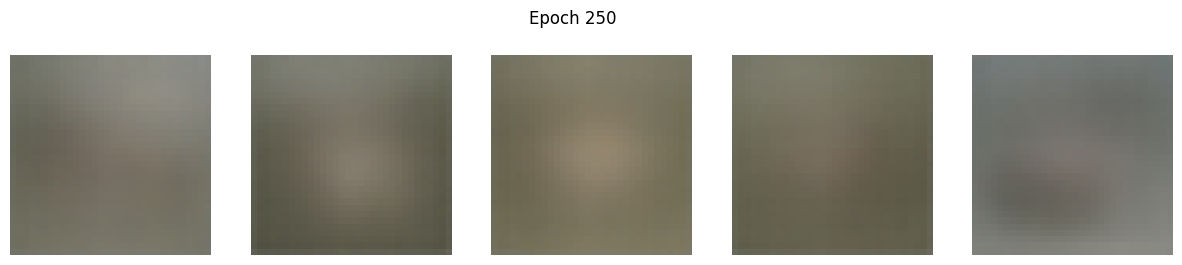

49/49 [==============================] - 5s 112ms/step - loss: 241.7285 - reconstruction_loss: 229.0464 - kl_loss: 12.3556 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 251/500
49/49 [==============================] - 5s 108ms/step - loss: 241.6108 - reconstruction_loss: 229.1324 - kl_loss: 12.3281 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 252/500
49/49 [==============================] - 5s 107ms/step - loss: 241.6971 - reconstruction_loss: 229.1533 - kl_loss: 12.3237 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 253/500
49/49 [==============================] - 5s 108ms/step - loss: 241.9206 - reconstruction_loss: 229.2217 - kl_loss: 12.3000 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 254/500
49/49 [==============================] - 5s 107ms/step - loss: 241.9594 - recons

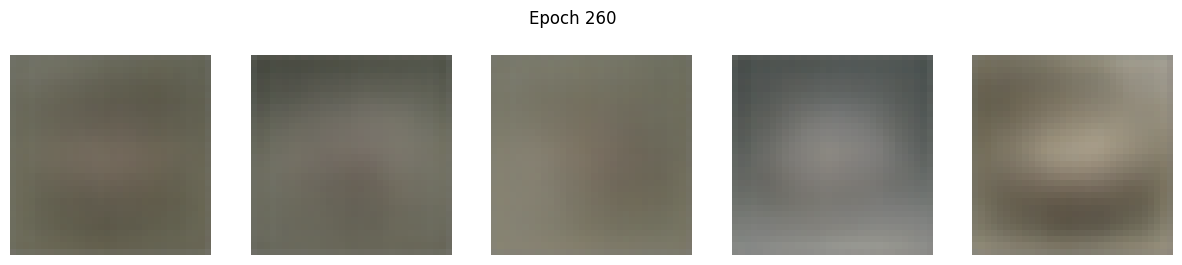

49/49 [==============================] - 6s 113ms/step - loss: 242.2594 - reconstruction_loss: 229.9516 - kl_loss: 12.1703 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 261/500
49/49 [==============================] - 5s 108ms/step - loss: 242.3425 - reconstruction_loss: 230.2086 - kl_loss: 12.1494 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 262/500
49/49 [==============================] - 5s 109ms/step - loss: 242.6840 - reconstruction_loss: 230.0594 - kl_loss: 12.1476 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 263/500
49/49 [==============================] - 5s 108ms/step - loss: 242.3911 - reconstruction_loss: 230.3466 - kl_loss: 12.1035 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 264/500
49/49 [==============================] - 5s 109ms/step - loss: 242.6399 - recons

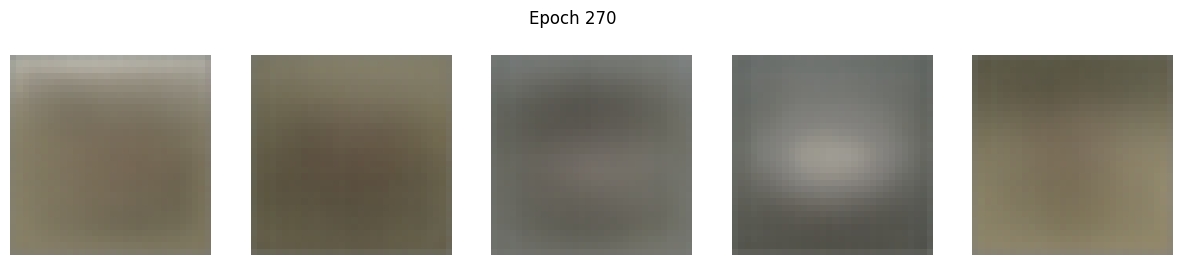

49/49 [==============================] - 5s 112ms/step - loss: 243.0611 - reconstruction_loss: 230.9199 - kl_loss: 11.9640 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 271/500
49/49 [==============================] - 5s 107ms/step - loss: 243.0873 - reconstruction_loss: 231.1296 - kl_loss: 11.9336 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 272/500
49/49 [==============================] - 5s 108ms/step - loss: 242.9569 - reconstruction_loss: 231.2408 - kl_loss: 11.9064 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 273/500
49/49 [==============================] - 5s 108ms/step - loss: 243.2532 - reconstruction_loss: 231.1924 - kl_loss: 11.8930 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 274/500
49/49 [==============================] - 5s 109ms/step - loss: 243.0809 - recons

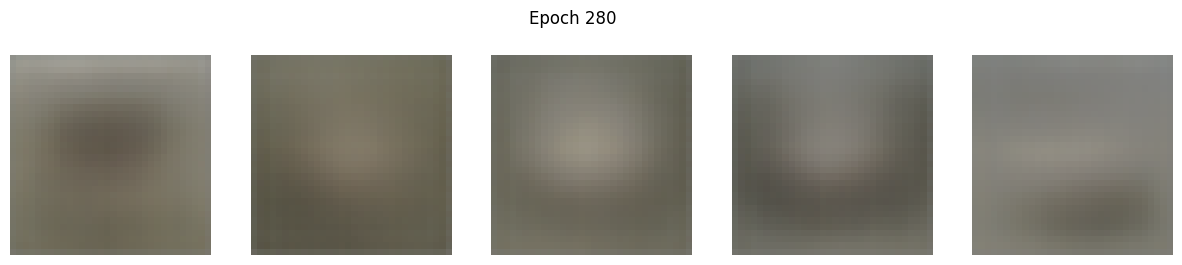

49/49 [==============================] - 6s 113ms/step - loss: 244.1987 - reconstruction_loss: 232.1915 - kl_loss: 11.7117 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 281/500
49/49 [==============================] - 5s 108ms/step - loss: 243.6902 - reconstruction_loss: 232.2282 - kl_loss: 11.6825 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 282/500
49/49 [==============================] - 5s 108ms/step - loss: 243.8317 - reconstruction_loss: 232.5160 - kl_loss: 11.6664 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 283/500
49/49 [==============================] - 5s 108ms/step - loss: 243.2346 - reconstruction_loss: 232.3096 - kl_loss: 11.6398 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 284/500
49/49 [==============================] - 5s 107ms/step - loss: 243.6979 - recons

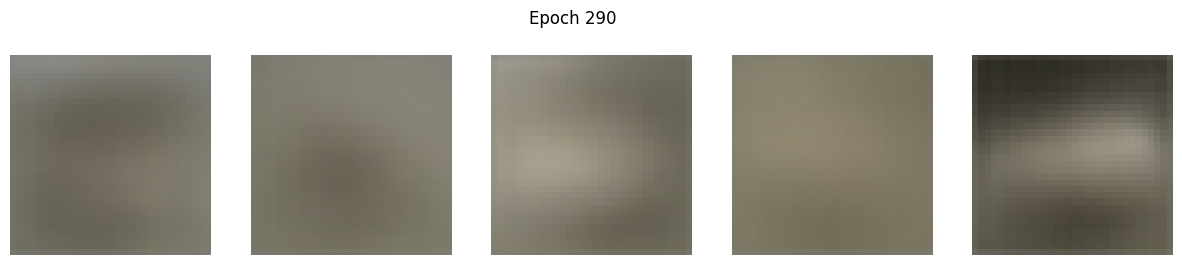

49/49 [==============================] - 5s 111ms/step - loss: 244.8114 - reconstruction_loss: 233.4561 - kl_loss: 11.4371 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 291/500
49/49 [==============================] - 5s 108ms/step - loss: 244.5650 - reconstruction_loss: 233.6239 - kl_loss: 11.3888 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 292/500
49/49 [==============================] - 5s 107ms/step - loss: 245.1588 - reconstruction_loss: 233.7855 - kl_loss: 11.3899 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 293/500
49/49 [==============================] - 5s 108ms/step - loss: 245.0675 - reconstruction_loss: 233.9943 - kl_loss: 11.3690 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 294/500
49/49 [==============================] - 5s 107ms/step - loss: 245.5811 - recons

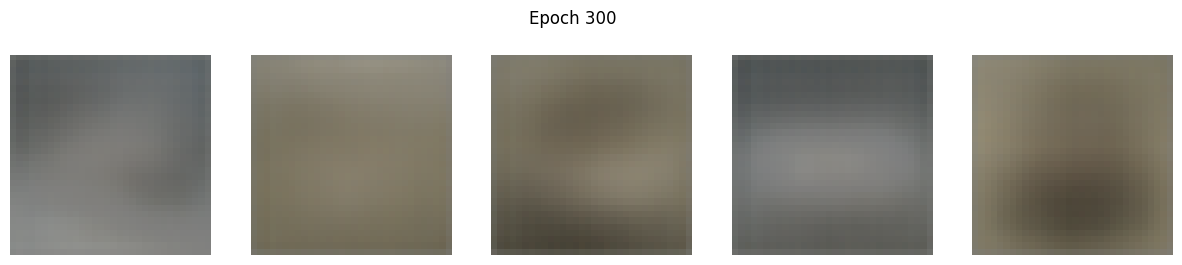

49/49 [==============================] - 6s 120ms/step - loss: 246.2954 - reconstruction_loss: 235.0262 - kl_loss: 11.1528 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 301/500
49/49 [==============================] - 5s 107ms/step - loss: 246.2223 - reconstruction_loss: 235.0483 - kl_loss: 11.1345 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 302/500
49/49 [==============================] - 5s 107ms/step - loss: 246.6259 - reconstruction_loss: 235.1539 - kl_loss: 11.0933 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 303/500
49/49 [==============================] - 5s 107ms/step - loss: 246.3702 - reconstruction_loss: 235.3999 - kl_loss: 11.0513 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 304/500
49/49 [==============================] - 5s 109ms/step - loss: 246.3447 - recons

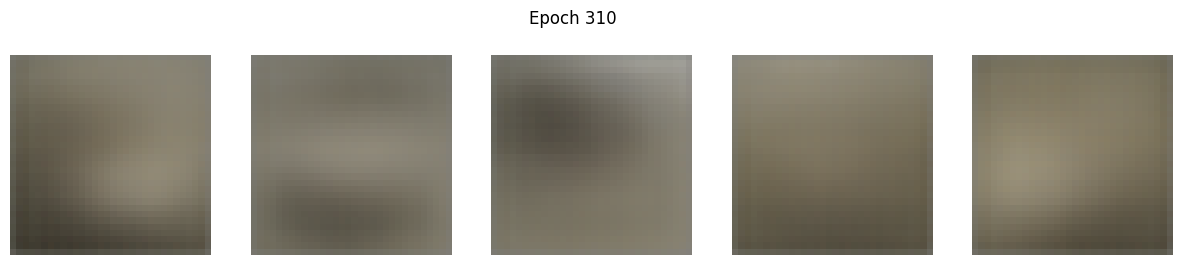

49/49 [==============================] - 6s 114ms/step - loss: 247.1753 - reconstruction_loss: 236.5309 - kl_loss: 10.8699 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 311/500
49/49 [==============================] - 5s 108ms/step - loss: 247.2018 - reconstruction_loss: 236.6767 - kl_loss: 10.8359 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 312/500
49/49 [==============================] - 5s 108ms/step - loss: 247.5956 - reconstruction_loss: 237.0936 - kl_loss: 10.8045 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 313/500
49/49 [==============================] - 5s 108ms/step - loss: 247.7283 - reconstruction_loss: 237.0100 - kl_loss: 10.7768 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 314/500
49/49 [==============================] - 5s 108ms/step - loss: 247.7295 - recons

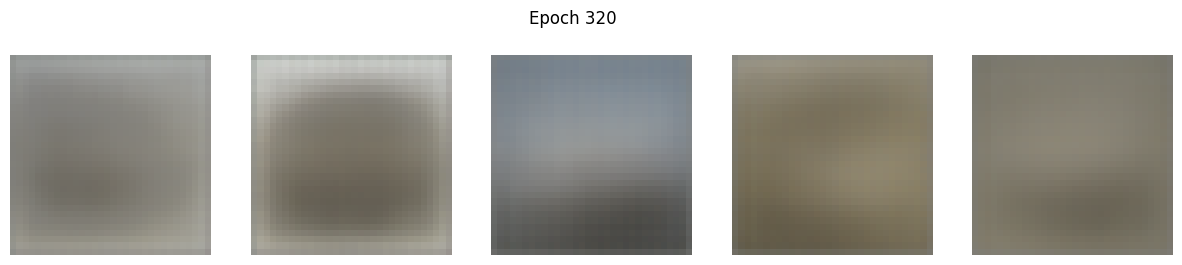

49/49 [==============================] - 6s 113ms/step - loss: 248.4314 - reconstruction_loss: 238.3107 - kl_loss: 10.5348 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 321/500
49/49 [==============================] - 5s 109ms/step - loss: 249.0207 - reconstruction_loss: 238.5108 - kl_loss: 10.5195 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 322/500
49/49 [==============================] - 5s 109ms/step - loss: 248.7372 - reconstruction_loss: 238.5513 - kl_loss: 10.4874 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 323/500
49/49 [==============================] - 5s 109ms/step - loss: 249.4157 - reconstruction_loss: 238.8617 - kl_loss: 10.4525 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 324/500
49/49 [==============================] - 5s 108ms/step - loss: 249.3803 - recons

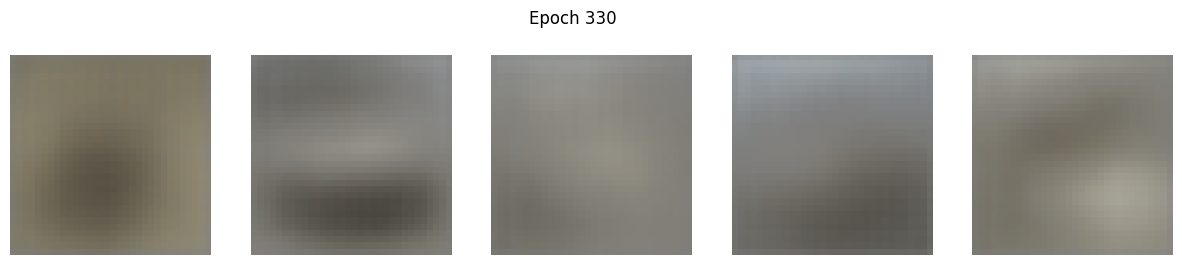

49/49 [==============================] - 5s 112ms/step - loss: 250.1669 - reconstruction_loss: 240.1008 - kl_loss: 10.2375 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 331/500
49/49 [==============================] - 5s 108ms/step - loss: 250.7039 - reconstruction_loss: 240.2359 - kl_loss: 10.2044 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 332/500
49/49 [==============================] - 5s 108ms/step - loss: 250.3961 - reconstruction_loss: 240.3518 - kl_loss: 10.1660 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 333/500
49/49 [==============================] - 5s 108ms/step - loss: 251.0980 - reconstruction_loss: 240.5951 - kl_loss: 10.1269 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 334/500
49/49 [==============================] - 5s 107ms/step - loss: 250.8516 - recons

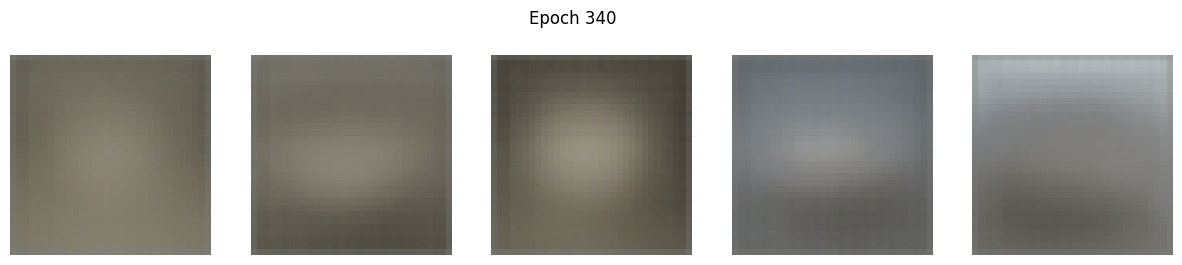

49/49 [==============================] - 6s 113ms/step - loss: 252.1807 - reconstruction_loss: 241.9877 - kl_loss: 9.9065 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 341/500
49/49 [==============================] - 5s 107ms/step - loss: 251.8873 - reconstruction_loss: 242.2697 - kl_loss: 9.8954 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 342/500
49/49 [==============================] - 5s 108ms/step - loss: 252.6739 - reconstruction_loss: 242.3800 - kl_loss: 9.8636 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 343/500
49/49 [==============================] - 5s 108ms/step - loss: 252.4632 - reconstruction_loss: 242.5383 - kl_loss: 9.8246 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 344/500
49/49 [==============================] - 5s 108ms/step - loss: 252.6015 - reconstruc

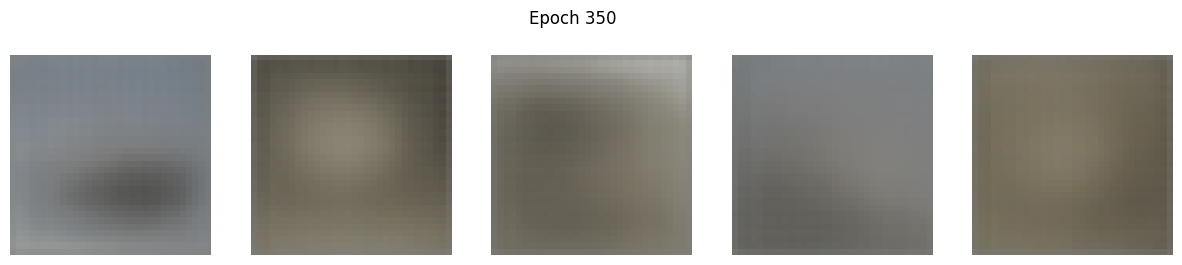

49/49 [==============================] - 5s 112ms/step - loss: 253.0878 - reconstruction_loss: 244.0179 - kl_loss: 9.6388 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 351/500
49/49 [==============================] - 5s 107ms/step - loss: 253.3826 - reconstruction_loss: 244.1603 - kl_loss: 9.6124 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 352/500
49/49 [==============================] - 5s 107ms/step - loss: 253.9130 - reconstruction_loss: 244.5610 - kl_loss: 9.5757 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 353/500
49/49 [==============================] - 5s 107ms/step - loss: 254.3557 - reconstruction_loss: 244.6463 - kl_loss: 9.5554 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 354/500
49/49 [==============================] - 5s 107ms/step - loss: 254.2498 - reconstruc

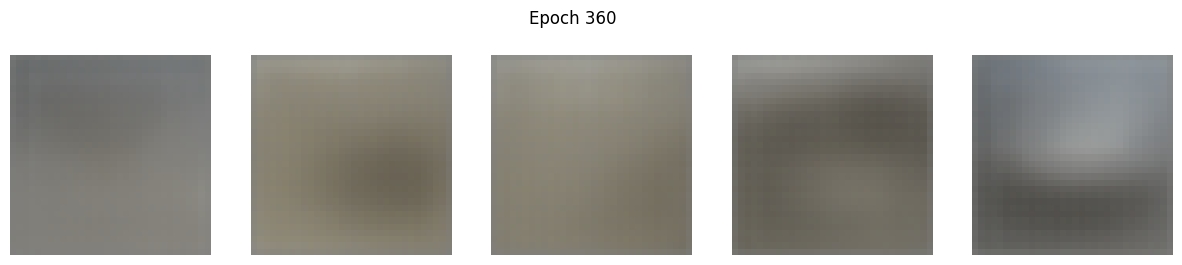

49/49 [==============================] - 5s 112ms/step - loss: 255.2252 - reconstruction_loss: 246.0211 - kl_loss: 9.3556 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 361/500
49/49 [==============================] - 5s 108ms/step - loss: 255.4078 - reconstruction_loss: 246.3053 - kl_loss: 9.3349 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 362/500
49/49 [==============================] - 5s 109ms/step - loss: 255.4450 - reconstruction_loss: 246.5219 - kl_loss: 9.3000 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 363/500
49/49 [==============================] - 5s 108ms/step - loss: 255.5896 - reconstruction_loss: 246.7062 - kl_loss: 9.2814 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 364/500
49/49 [==============================] - 5s 108ms/step - loss: 256.0868 - reconstruc

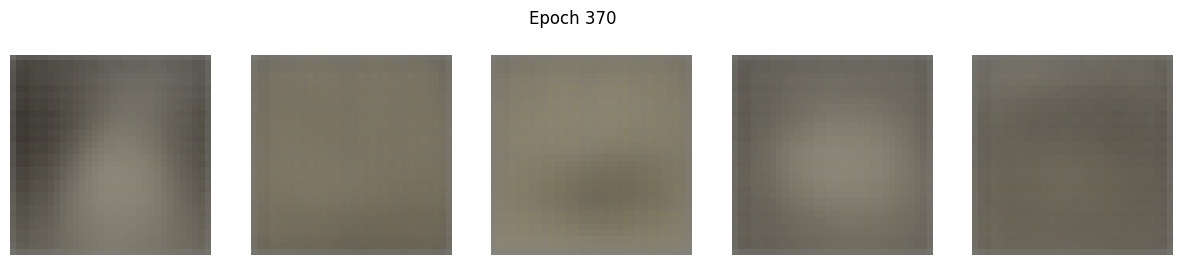

49/49 [==============================] - 6s 113ms/step - loss: 256.7738 - reconstruction_loss: 247.9874 - kl_loss: 9.1039 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 371/500
49/49 [==============================] - 5s 109ms/step - loss: 257.3931 - reconstruction_loss: 248.4096 - kl_loss: 9.0864 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 372/500
49/49 [==============================] - 5s 109ms/step - loss: 258.2765 - reconstruction_loss: 248.4767 - kl_loss: 9.0664 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 373/500
49/49 [==============================] - 5s 108ms/step - loss: 257.8338 - reconstruction_loss: 248.7607 - kl_loss: 9.0325 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 374/500
49/49 [==============================] - 5s 108ms/step - loss: 257.8161 - reconstruc

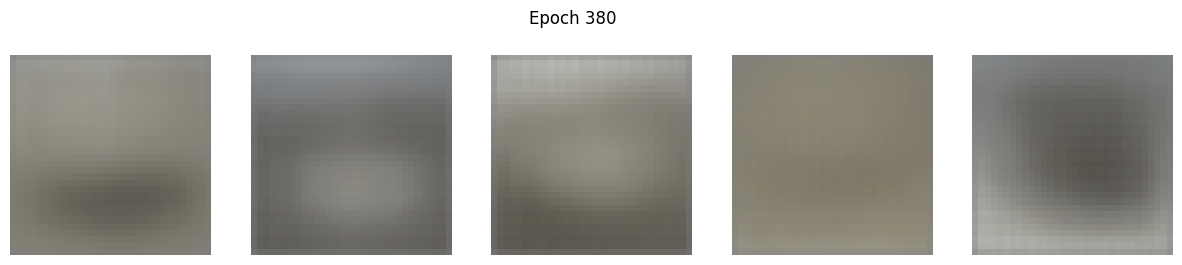

49/49 [==============================] - 5s 111ms/step - loss: 258.9355 - reconstruction_loss: 250.1898 - kl_loss: 8.8526 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 381/500
49/49 [==============================] - 5s 108ms/step - loss: 258.9274 - reconstruction_loss: 250.3137 - kl_loss: 8.8330 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 382/500
49/49 [==============================] - 5s 108ms/step - loss: 258.7903 - reconstruction_loss: 250.5544 - kl_loss: 8.8171 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 383/500
49/49 [==============================] - 5s 110ms/step - loss: 259.4581 - reconstruction_loss: 250.7334 - kl_loss: 8.7813 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 384/500
49/49 [==============================] - 5s 109ms/step - loss: 260.1171 - reconstruc

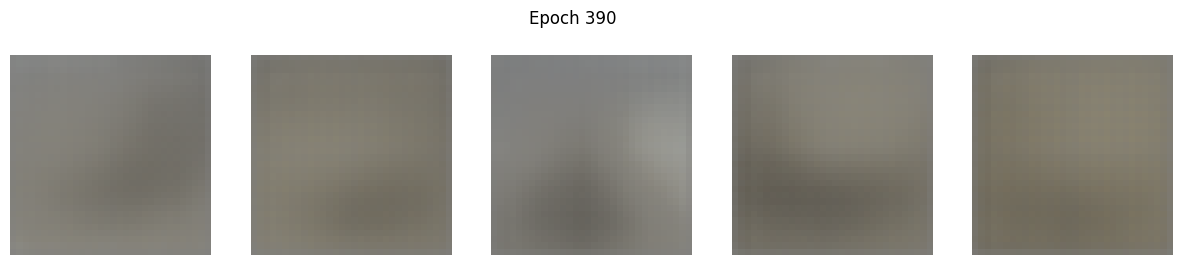

49/49 [==============================] - 6s 114ms/step - loss: 261.2949 - reconstruction_loss: 252.2940 - kl_loss: 8.6117 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 391/500
49/49 [==============================] - 5s 108ms/step - loss: 260.7879 - reconstruction_loss: 252.3813 - kl_loss: 8.5865 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 392/500
49/49 [==============================] - 5s 108ms/step - loss: 260.9536 - reconstruction_loss: 252.6889 - kl_loss: 8.5779 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 393/500
49/49 [==============================] - 5s 109ms/step - loss: 261.5696 - reconstruction_loss: 252.7968 - kl_loss: 8.5561 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 394/500
49/49 [==============================] - 5s 108ms/step - loss: 261.1225 - reconstruc

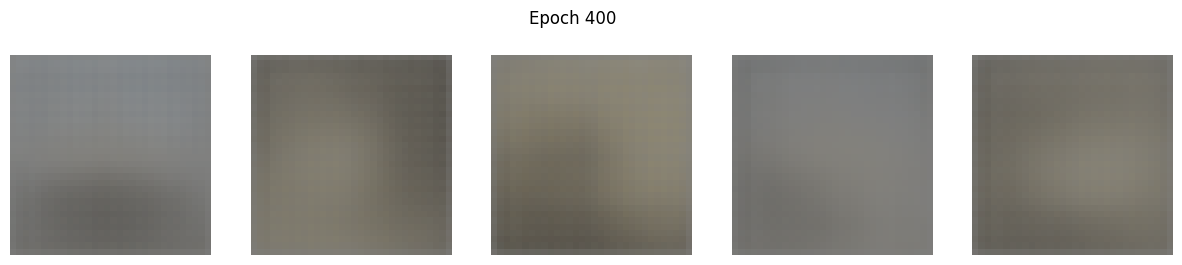

49/49 [==============================] - 5s 112ms/step - loss: 262.8507 - reconstruction_loss: 254.3391 - kl_loss: 8.3993 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 401/500
49/49 [==============================] - 5s 108ms/step - loss: 263.3792 - reconstruction_loss: 254.4729 - kl_loss: 8.3893 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 402/500
49/49 [==============================] - 5s 109ms/step - loss: 262.8642 - reconstruction_loss: 254.5426 - kl_loss: 8.3636 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 403/500
49/49 [==============================] - 5s 108ms/step - loss: 263.0488 - reconstruction_loss: 254.9901 - kl_loss: 8.3456 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 404/500
49/49 [==============================] - 5s 108ms/step - loss: 263.3171 - reconstruc

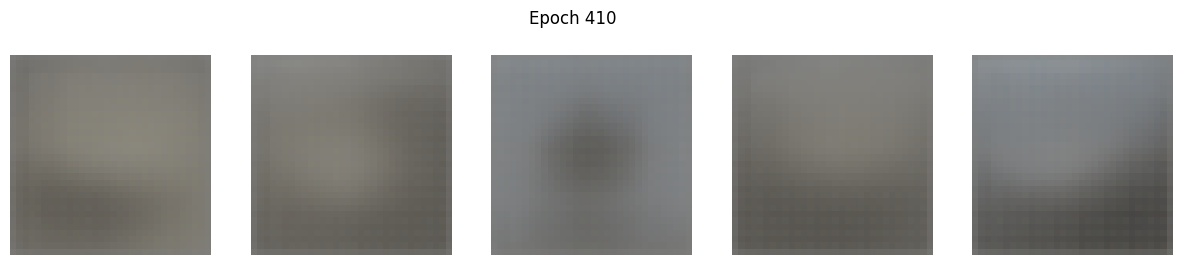

49/49 [==============================] - 5s 112ms/step - loss: 264.5974 - reconstruction_loss: 256.3342 - kl_loss: 8.2203 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 411/500
49/49 [==============================] - 5s 109ms/step - loss: 264.7477 - reconstruction_loss: 256.5344 - kl_loss: 8.1954 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 412/500
49/49 [==============================] - 5s 109ms/step - loss: 264.7926 - reconstruction_loss: 256.6514 - kl_loss: 8.1740 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 413/500
49/49 [==============================] - 5s 109ms/step - loss: 265.1473 - reconstruction_loss: 256.9132 - kl_loss: 8.1585 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 414/500
49/49 [==============================] - 5s 109ms/step - loss: 265.3671 - reconstruc

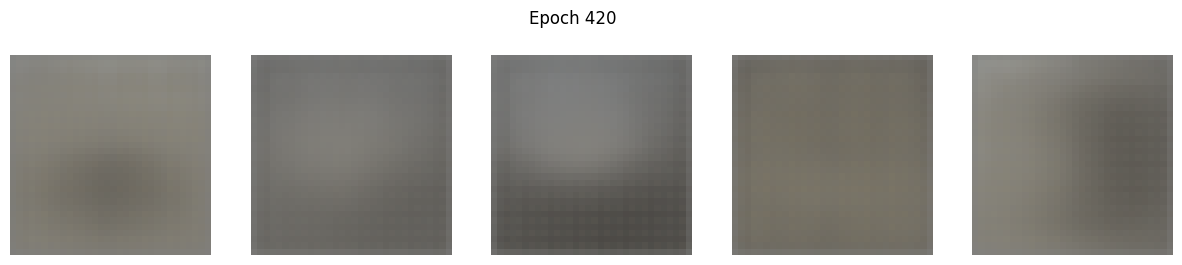

49/49 [==============================] - 5s 112ms/step - loss: 266.3664 - reconstruction_loss: 258.4093 - kl_loss: 8.0355 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 421/500
49/49 [==============================] - 5s 108ms/step - loss: 266.4510 - reconstruction_loss: 258.5927 - kl_loss: 8.0007 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 422/500
49/49 [==============================] - 5s 108ms/step - loss: 266.6434 - reconstruction_loss: 258.8074 - kl_loss: 7.9891 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 423/500
49/49 [==============================] - 5s 109ms/step - loss: 266.2331 - reconstruction_loss: 258.9348 - kl_loss: 7.9780 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 424/500
49/49 [==============================] - 5s 109ms/step - loss: 266.8795 - reconstruc

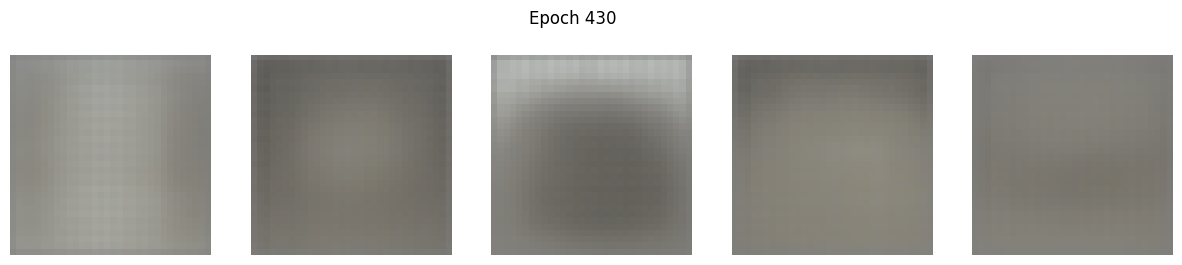

49/49 [==============================] - 6s 114ms/step - loss: 268.5413 - reconstruction_loss: 260.3324 - kl_loss: 7.8492 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 431/500
49/49 [==============================] - 5s 108ms/step - loss: 269.0122 - reconstruction_loss: 260.5149 - kl_loss: 7.8495 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 432/500
49/49 [==============================] - 5s 108ms/step - loss: 268.2165 - reconstruction_loss: 260.7052 - kl_loss: 7.8334 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 433/500
49/49 [==============================] - 5s 108ms/step - loss: 268.2085 - reconstruction_loss: 260.9446 - kl_loss: 7.8096 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 434/500
49/49 [==============================] - 5s 109ms/step - loss: 269.0057 - reconstruc

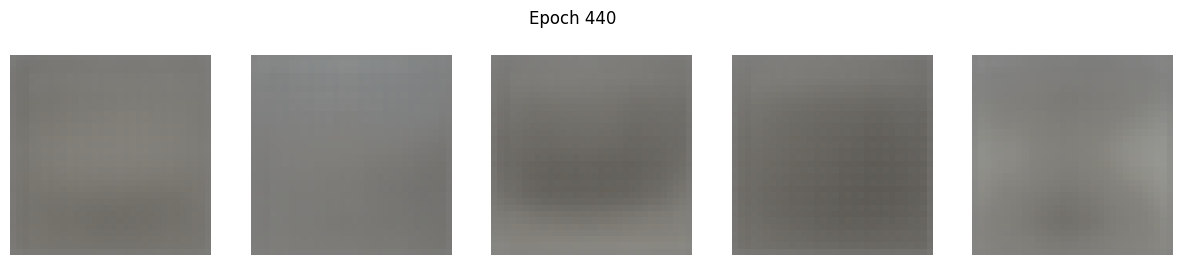

49/49 [==============================] - 5s 112ms/step - loss: 269.4303 - reconstruction_loss: 262.1768 - kl_loss: 7.7064 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 441/500
49/49 [==============================] - 5s 107ms/step - loss: 270.3845 - reconstruction_loss: 262.5872 - kl_loss: 7.6776 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 442/500
49/49 [==============================] - 5s 108ms/step - loss: 270.3441 - reconstruction_loss: 262.7372 - kl_loss: 7.6734 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 443/500
49/49 [==============================] - 5s 108ms/step - loss: 271.0862 - reconstruction_loss: 262.8442 - kl_loss: 7.6605 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 444/500
49/49 [==============================] - 5s 108ms/step - loss: 270.6005 - reconstruc

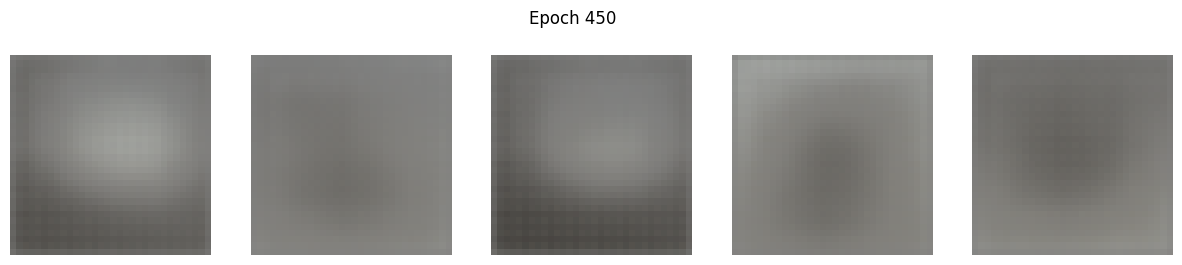

49/49 [==============================] - 5s 112ms/step - loss: 272.1234 - reconstruction_loss: 264.1606 - kl_loss: 7.5492 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 451/500
49/49 [==============================] - 5s 108ms/step - loss: 272.3782 - reconstruction_loss: 264.4927 - kl_loss: 7.5409 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 452/500
49/49 [==============================] - 5s 108ms/step - loss: 271.9225 - reconstruction_loss: 264.5207 - kl_loss: 7.5300 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 453/500
49/49 [==============================] - 5s 107ms/step - loss: 272.1902 - reconstruction_loss: 264.7580 - kl_loss: 7.5266 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 454/500
49/49 [==============================] - 5s 107ms/step - loss: 272.6410 - reconstruc

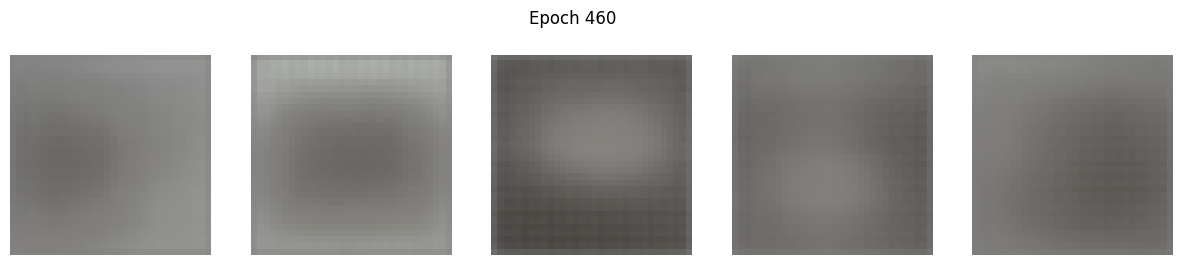

49/49 [==============================] - 5s 112ms/step - loss: 273.6864 - reconstruction_loss: 266.0087 - kl_loss: 7.4165 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 461/500
49/49 [==============================] - 5s 107ms/step - loss: 273.1732 - reconstruction_loss: 266.1894 - kl_loss: 7.3825 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 462/500
49/49 [==============================] - 5s 107ms/step - loss: 273.7986 - reconstruction_loss: 266.4592 - kl_loss: 7.3735 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 463/500
49/49 [==============================] - 5s 108ms/step - loss: 273.5287 - reconstruction_loss: 266.5132 - kl_loss: 7.3646 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 464/500
49/49 [==============================] - 5s 107ms/step - loss: 274.2811 - reconstruc

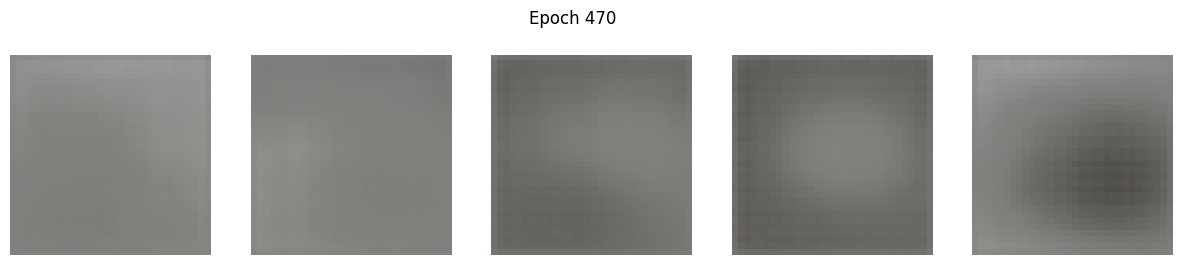

49/49 [==============================] - 6s 113ms/step - loss: 275.3698 - reconstruction_loss: 268.0080 - kl_loss: 7.2657 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 471/500
49/49 [==============================] - 5s 108ms/step - loss: 275.1282 - reconstruction_loss: 268.1427 - kl_loss: 7.2469 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 472/500
49/49 [==============================] - 5s 108ms/step - loss: 275.1012 - reconstruction_loss: 268.3112 - kl_loss: 7.2302 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 473/500
49/49 [==============================] - 5s 107ms/step - loss: 276.4344 - reconstruction_loss: 268.5848 - kl_loss: 7.2148 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 474/500
49/49 [==============================] - 5s 107ms/step - loss: 275.9985 - reconstruc

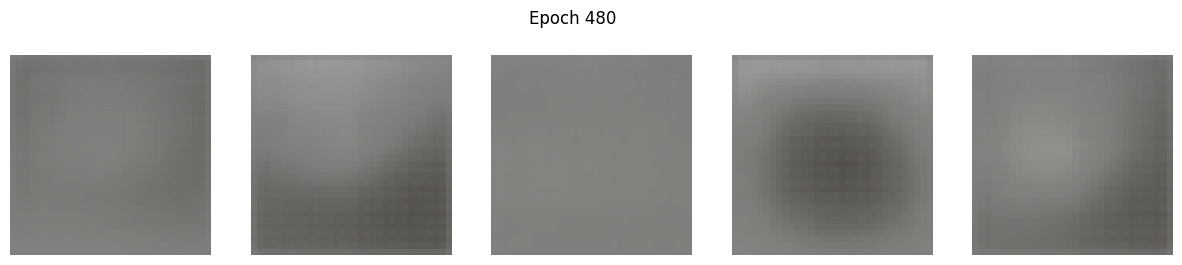

49/49 [==============================] - 6s 120ms/step - loss: 276.7460 - reconstruction_loss: 269.9034 - kl_loss: 7.1350 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 481/500
49/49 [==============================] - 5s 107ms/step - loss: 277.5636 - reconstruction_loss: 270.0389 - kl_loss: 7.1123 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 482/500
49/49 [==============================] - 5s 107ms/step - loss: 277.1612 - reconstruction_loss: 270.2184 - kl_loss: 7.1069 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 483/500
49/49 [==============================] - 5s 108ms/step - loss: 277.7854 - reconstruction_loss: 270.4176 - kl_loss: 7.0770 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 484/500
49/49 [==============================] - 5s 108ms/step - loss: 277.9310 - reconstruc

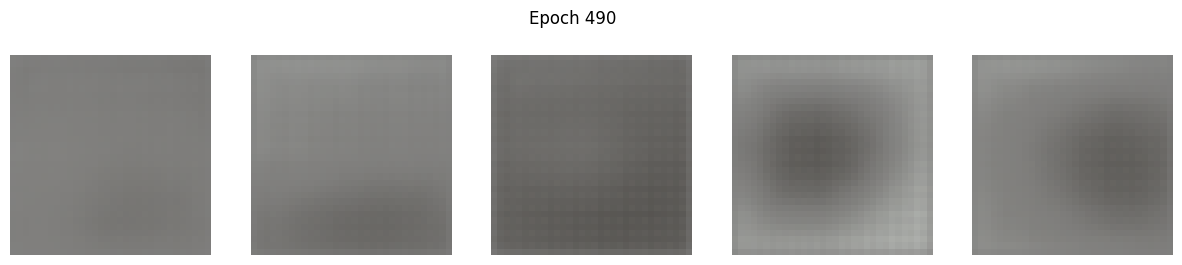

49/49 [==============================] - 5s 112ms/step - loss: 278.9510 - reconstruction_loss: 271.7775 - kl_loss: 6.9813 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 491/500
49/49 [==============================] - 5s 108ms/step - loss: 278.3234 - reconstruction_loss: 271.9800 - kl_loss: 6.9680 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 492/500
49/49 [==============================] - 5s 110ms/step - loss: 278.6829 - reconstruction_loss: 272.1043 - kl_loss: 6.9545 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 493/500
49/49 [==============================] - 5s 108ms/step - loss: 279.0365 - reconstruction_loss: 272.4005 - kl_loss: 6.9386 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 494/500
49/49 [==============================] - 5s 108ms/step - loss: 279.6341 - reconstruc

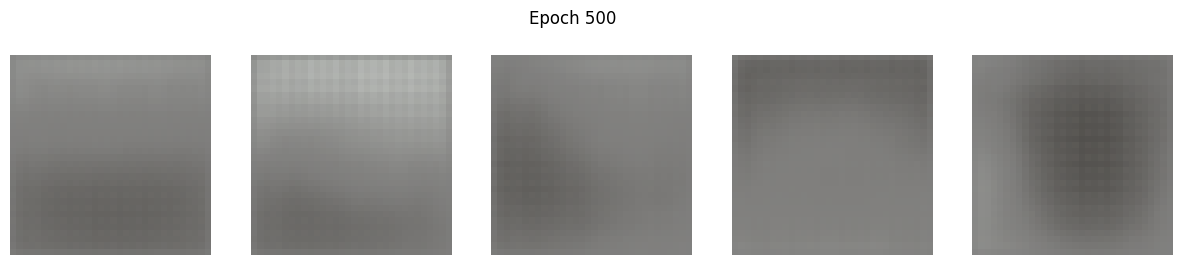

49/49 [==============================] - 5s 112ms/step - loss: 280.3744 - reconstruction_loss: 273.7021 - kl_loss: 6.8585 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00


In [ ]:
########################################
# 5. Навчання
########################################
# Оскільки це автоенкодер, часто в якості "міток" для fit() подають ті ж x_train.
# Так само для валідації: (x_test, x_test).
# Якщо не хочете валідації, можна не вказувати або поставити None.
########################################
history = vae_model.fit(
    x_train, x_train,
    epochs=500,
    batch_size=1024,
    validation_data=(x_test, x_test),
    callbacks=[GenerateImagesCallback(vae_model, latent_dim=latent_dim, interval=10, n_images=5)]
)


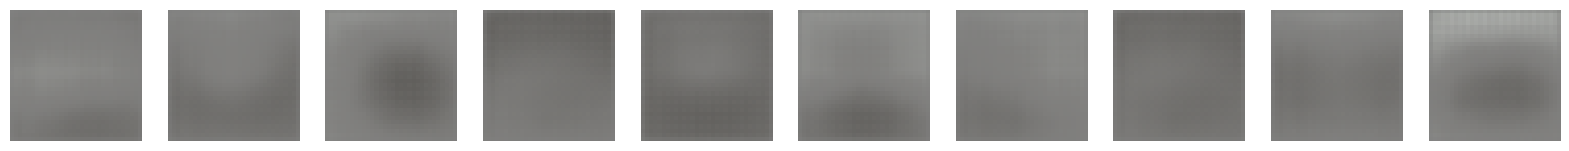

In [ ]:
# Кількість зображень для генерації
n_to_generate = 10

# Генеруємо випадкові точки з Normal(0, 1)
z_sample = tf.random.normal(shape=(n_to_generate, latent_dim))

# Пропускаємо через декодер
generated_images = vae_model.decoder(z_sample)


# Функція для візуалізації
def plot_images(images, n=10):
    plt.figure(figsize=(20, 4))
    for i in range(n):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(images[i])
        plt.axis("off")
    plt.show()


# Виведемо результат
plot_images(generated_images.numpy(), n=n_to_generate)

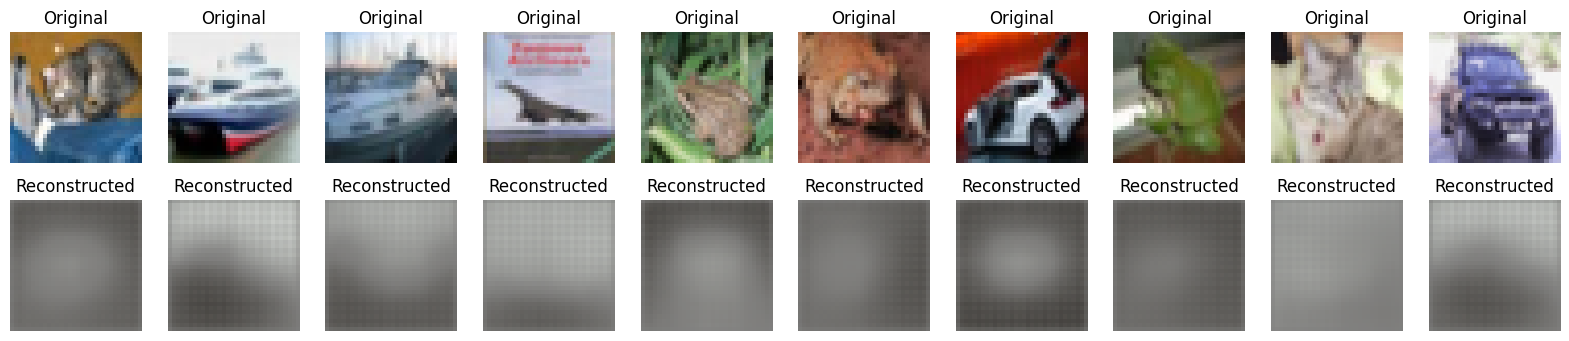

In [ ]:
# Беремо перші 10 зображень з тесту
x_test_subset = x_test[:10]
mu, logvar, z = encoder(x_test_subset)
x_test_reconstructed = decoder(z)


# Відображаємо оригінали та реконструкції поруч
def plot_original_vs_recon(original, reconstructed):
    n = len(original)
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # Оригінали
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(original[i])
        plt.title("Original")
        plt.axis("off")

        # Реконструкція
        ax = plt.subplot(2, n, n + i + 1)
        plt.imshow(reconstructed[i])
        plt.title("Reconstructed")
        plt.axis("off")
    plt.show()


plot_original_vs_recon(x_test_subset, x_test_reconstructed.numpy())

#### Аналіз VAE після Step 4 (на основі Step 2) із додатковою оптимізацією

##### Порівняння з попередніми кроками:

1. **Архітектура та параметри моделі**:
   - **Розмір латентного простору**:
     - **Step 2**: \( \text{latent_dim} = 512 \).
     - **Step 4**: \( \text{latent_dim} = 1024 \), що дозволяє захопити більш детальну інформацію, але збільшує складність моделі.

   - **Декодер**:
     - Використовуються п'ять шарів `Conv2DTranspose` для відновлення просторових розмірів \( 32 \times 32 \).

2. **Додаткові оптимізації**:
   - **Dropout (0.3)** в енкодері для запобігання перенавчанню.
   - **AdamW** з полігональним зменшенням learning rate та регуляризацією ваг для кращої узагальненості.

3. **Кількість епох**:
   - Навчання тривало 500 епох, значно більше, ніж у Step 1–3, для досягнення глибшої збіжності.

4. **Лог втрат**:
   - **KL-втрата** поступово стабілізувалася на рівні близько 6–7.
   - **Reconstruction loss** знизилася до ~273, що свідчить про покращення здатності моделі відновлювати вхідні дані.

5. **Результати реконструкції**:
   - Зображення реконструкцій виглядають злегка розмитими та менш чіткими, порівняно з оригіналом, що вказує на певну втрату деталей. 
   - У порівнянні з Step 3, видно незначне покращення текстур, але моделі все ще складно відновлювати складні візерунки та дрібні деталі.

##### Очікуваний ефект:
- **Переваги**:
  - Глибша модель із великим латентним простором краще захоплює складні патерни.
  - Dropout та регуляризація сприяють узагальненості моделі.
- **Недоліки**:
  - Деяке розмиття деталей у реконструйованих зображеннях через високу регуляризацію.
  - Значний час навчання через велику кількість епох.

### STEP 5

#### Початкова підготовка для Step 5

##### Порівняння з попередніми кроками:

1. **Архітектура**:
   - **Step 4 (on Step 2)**: Використовували ті ж фільтри [128, 256, 512, 512, 512] для енкодера та [512, 512, 512, 256, 128] для декодера.
   - У Step 5 поки не змінюємо кількість фільтрів чи розмір латентного простору (\( \text{latent_dim} = 1024 \)).

2. **Дані**:
   - Усі кроки використовували CIFAR-10, нормалізовані до діапазону [0, 1].

##### Очікуваний ефект:
- Це створює базу для оптимізації, фокусуючи увагу на архітектурі моделі.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_addons as tfa
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Hyperparameters
num_filters_encoder = [128, 256, 512, 512, 512]
num_filters_decoder = [512, 512, 512, 256, 128]
latent_dim = 1024

In [ ]:
# Load and preprocess data
(x_train, _), (x_test, _) = keras.datasets.cifar10.load_data()
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

#### Додавання резидуальних блоків

##### Порівняння з попередніми кроками:

1. **Step 5**:
   - У Step 5 впроваджено **резидуальні блоки** для покращення здатності мережі витягувати та узагальнювати складні ознаки.  
   - Резидуальні з'єднання допомагають уникнути проблеми зникнення градієнтів, дозволяючи передавати інформацію між шарами безпосередньо.

2. **Попередні кроки**:
   - **Step 4 (on Step 2)**: Використовували звичайні згорткові шари, без резидуальних з'єднань.
   - У попередніх кроках зменшення розмірності виконувалося лише за допомогою Conv2D(strides=2), без додаткових механізмів стабілізації.

##### Очікуваний ефект:
- **Переваги**:
  - Покращення стабільності та швидкості навчання.
  - Збереження важливих просторових і контекстуальних ознак.
  - Глибші архітектури стають ефективнішими завдяки прямій передачі інформації через резидуальні з'єднання.
- **Ризики**:
  - Можливе збільшення часу навчання через додаткові обчислення.
  - Перенасичення параметрів, що може ускладнити регуляризацію.

In [ ]:
# Residual Block
class ResidualBlock(layers.Layer):
    def __init__(self, filters):
        super(ResidualBlock, self).__init__()
        self.conv1 = layers.Conv2D(filters, 3, padding='same')
        self.bn1 = layers.BatchNormalization()
        self.conv2 = layers.Conv2D(filters, 3, padding='same')
        self.bn2 = layers.BatchNormalization()

        # Add projection shortcut if dimensions change
        self.projection = None

    def build(self, input_shape):
        if input_shape[-1] != self.conv2.filters:
            self.projection = layers.Conv2D(self.conv2.filters, 1, padding='same')

    def call(self, x):
        residual = x

        x = self.conv1(x)
        x = self.bn1(x)
        x = tf.nn.relu(x)

        x = self.conv2(x)
        x = self.bn2(x)

        if self.projection is not None:
            residual = self.projection(residual)

        x += residual
        return tf.nn.relu(x)

#### Додавання блоку уваги (Attention Block)

##### Порівняння з попередніми кроками:

1. **Step 5**:
   - Впроваджено **Attention Block** для покращення здатності моделі зосереджуватись на важливих просторових ознаках.  
   - Використано **мультиголовну увагу** (`MultiHeadAttention`) із 4 головами для обробки високорівневих зв'язків між ознаками.

2. **Попередні кроки**:
   - **Step 4**: Відсутність механізмів уваги; модель покладалась лише на згортки.
   - У попередніх кроках покращення якості відбувалося завдяки додаванню глибших шарів і збільшенню латентного простору.

##### Очікуваний ефект:
- **Переваги**:
  - Увага допомагає краще враховувати глобальний контекст, що є корисним для обробки зображень зі складними текстурами або об'єктами.
  - Зменшення втрати просторової інформації завдяки увазі на різних масштабах.
  - Підвищення здатності моделі до генерації деталей у реконструкціях.

- **Ризики**:
  - Додаткові обчислювальні витрати через механізм уваги.
  - Можливе перенавчання, якщо увага фокусується на нерелевантних ознаках.

In [ ]:
# Attention Block
class AttentionBlock(layers.Layer):
    def __init__(self, filters):
        super(AttentionBlock, self).__init__()
        self.mha = layers.MultiHeadAttention(num_heads=4, key_dim=filters // 4)
        self.ln = layers.LayerNormalization()

    def call(self, x):
        shape = tf.shape(x)
        height, width = shape[1], shape[2]
        x_reshaped = tf.reshape(x, [-1, height * width, shape[-1]])
        attention_output = self.mha(x_reshaped, x_reshaped)
        attention_output = tf.reshape(attention_output, [-1, height, width, shape[-1]])
        return self.ln(x + attention_output)

#### Розширений енкодер із Residual та Attention блоками

##### Порівняння з попередніми кроками:

1. **Архітектура енкодера**:
   - **Step 5**:
     - Додано **Residual Blocks** для покращення збереження інформації через шари.
     - Використано **Attention Blocks** у фільтрах від 256 і вище для захоплення глобального контексту.
     - Проміжний шар:
       ```python
       x = layers.Dense(2048, activation="relu")(x)
       ```
       Додає додаткову потужність для обробки перед латентним шаром.
   - **Step 4**: Містив лише згорткові шари та Dropout для регуляризації.
   - **Step 3**: Відсутні Residual та Attention блоки.

2. **Розмір латентного простору**:
   - **Step 5**: \( \text{latent_dim} = 1024 \) (незмінний із Step 4).
   - У попередніх кроках він поступово зростав від 128 (Step 1) до 1024.

##### Очікуваний ефект:
- **Переваги**:
  - **Residual блоки** забезпечують кращу передачу градієнтів, зменшуючи проблему затухання.
  - **Attention блоки** підвищують точність, дозволяючи фокусуватись на значущих частинах зображення.
  - Додатковий шар **Dense(2048)** покращує узагальнення складних ознак.
  - **Dropout** знижує ризик перенавчання.

- **Ризики**:
  - Ускладнення моделі може призвести до збільшення часу тренування.
  - Потреба в більшій обчислювальній потужності.

In [ ]:
# Encoder
encoder_inputs = keras.Input(shape=(32, 32, 3))
x = layers.Conv2D(64, 3, padding='same')(encoder_inputs)
x = layers.BatchNormalization()(x)
x = layers.ReLU()(x)

for filters in num_filters_encoder:
    x = ResidualBlock(filters)(x)
    x = layers.Conv2D(filters, 3, strides=2, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    if filters >= 256:
        x = AttentionBlock(filters)(x)
    x = layers.Dropout(0.3)(x)

x = layers.Flatten()(x)
x = layers.Dense(2048, activation="relu")(x)
x = layers.Dropout(0.5)(x)

mu = layers.Dense(latent_dim, name="mu")(x)
logvar = layers.Dense(latent_dim, name="logvar")(x)


def sampling(args):
    mu, logvar = args
    epsilon = tf.random.normal(shape=tf.shape(mu))
    return mu + tf.exp(0.5 * logvar) * epsilon


z = layers.Lambda(sampling, name="z")([mu, logvar])
encoder = keras.Model(encoder_inputs, [mu, logvar, z], name="encoder")

#### Покращений декодер із Residual та Attention блоками

##### Порівняння з попередніми кроками:

1. **Архітектура декодера**:
   - **Step 5**:
     - Додано **Residual Blocks** у декодері, що зменшує втрати інформації під час реконструкції.
     - **Attention Blocks** застосовані у шарах із фільтрами ≥256 для підвищення якості відновлення дрібних деталей.
     - Використано більш складну структуру із Conv2DTranspose, яка ефективно масштабує зображення до початкового розміру.
   - **Step 4**: Лише згорткові транспоновані шари з BatchNormalization і ReLU.
   - **Step 3**: Відсутні Residual та Attention блоки.

2. **Покращення структури**:
   - Додано Residual блоки, що підтримують стабільність градієнтів.
   - Використання Attention блоків допомагає у фокусуванні на важливих ознаках під час відновлення.

##### Очікуваний ефект:
- **Переваги**:
  - **Residual блоки** покращують передачу інформації на всіх етапах декодування.
  - **Attention блоки** підвищують якість реконструкції, зокрема для складних деталей.
  - Стабільніше та якісніше відновлення зображень завдяки глибшій архітектурі.

- **Ризики**:
  - Ускладнена модель може збільшити час тренування.
  - Потреба в більшій обчислювальній пам'яті для роботи з більшою кількістю шарів і блоків.

In [ ]:
# Decoder
latent_inputs = keras.Input(shape=(latent_dim,))
x = layers.Dense(1 * 1 * num_filters_decoder[0], activation="relu")(latent_inputs)
x = layers.Reshape((1, 1, num_filters_decoder[0]))(x)

for filters in num_filters_decoder:
    x = ResidualBlock(filters)(x)
    x = layers.Conv2DTranspose(filters, 3, strides=2, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    if filters >= 256:
        x = AttentionBlock(filters)(x)

decoder_outputs = layers.Conv2DTranspose(3, 3, padding="same", activation="sigmoid")(x)
decoder = keras.Model(latent_inputs, decoder_outputs, name="decoder")

#### Вдосконалений VAE із додаванням перцептивної втрати

##### Порівняння з попередніми кроками:

1. **Додано перцептивну втрату**:
   - Використано попередньо навчений **VGG16** для обчислення перцептивної втрати. 
   - Обчислюється різниця між ознаками реальних і реконструйованих зображень.
   - Вплив на якість реконструкції: забезпечує кращу семантичну відповідність між оригіналом і реконструкцією.

2. **Інші зміни**:
   - Додано **total variation loss (TV)** для покращення гладкості реконструйованих зображень.
   - Введено механізм **gradient clipping** для запобігання вибуху градієнтів.
   - Комбінація втрат:
     ```python
     total_loss = reconstruction_loss + beta * kl_loss + 0.1 * perceptual_loss + 0.01 * tv_loss
     ```

3. **Архітектурні зміни**:
   - **Step 5**: Використовуються Residual та Attention блоки.
   - **Step 4**: Не було перцептивної втрати, використовувалися лише базові MSE і KL.

##### Очікуваний ефект:
- **Переваги**:
  - **Перцептивна втрата** покращує візуальну якість реконструкцій.
  - **TV-втрата** забезпечує гладкість зображень.
  - **Gradient clipping** робить навчання стабільнішим.
- **Ризики**:
  - Збільшення часу тренування через обчислення перцептивних ознак.
  - Може виникнути потреба в тонкому налаштуванні ваг втрат для досягнення балансу.

In [ ]:
# Improved VAE
class ImprovedVAE(keras.Model):
    def __init__(self, encoder, decoder, beta=1.0, **kwargs):
        super(ImprovedVAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.beta = beta

        vgg = keras.applications.VGG16(include_top=False, weights="imagenet")
        self.perceptual_model = keras.Model(
            vgg.input, vgg.get_layer("block3_conv3").output
        )
        self.perceptual_model.trainable = False

        self.total_loss_tracker = keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = keras.metrics.Mean(
            name="reconstruction_loss"
        )
        self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")
        self.perceptual_loss_tracker = keras.metrics.Mean(name="perceptual_loss")

    def call(self, inputs, training=None):
        # Get latent representation
        mu, logvar, z = self.encoder(inputs)
        # Generate reconstruction
        reconstruction = self.decoder(z)
        return reconstruction

    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
            self.perceptual_loss_tracker,
        ]

    def compute_perceptual_loss(self, real, generated):
        real = tf.image.resize(real, (224, 224))
        generated = tf.image.resize(generated, (224, 224))
        real_features = self.perceptual_model(real)
        gen_features = self.perceptual_model(generated)
        return tf.reduce_mean(tf.square(real_features - gen_features))

    def train_step(self, data):
        if isinstance(data, tuple):
            data = data[0]

        with tf.GradientTape() as tape:
            mu, logvar, z = self.encoder(data)
            reconstruction = self.decoder(z)

            reconstruction_loss = tf.reduce_mean(
                tf.reduce_sum(
                    keras.losses.binary_crossentropy(data, reconstruction), axis=(1, 2)
                )
            )

            perceptual_loss = self.compute_perceptual_loss(data, reconstruction)

            kl_loss = -0.5 * tf.reduce_mean(1 + logvar - tf.square(mu) - tf.exp(logvar))

            tv_loss = tf.reduce_mean(tf.image.total_variation(reconstruction))

            total_loss = (
                reconstruction_loss
                + self.beta * kl_loss
                + 0.1 * perceptual_loss
                + 0.01 * tv_loss
            )

        grads = tape.gradient(total_loss, self.trainable_weights)
        grads = [tf.clip_by_norm(g, 1.0) for g in grads]
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))

        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        self.perceptual_loss_tracker.update_state(perceptual_loss)

        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
            "perceptual_loss": self.perceptual_loss_tracker.result(),
        }

    def test_step(self, data):
        if isinstance(data, tuple):
            data = data[0]

        mu, logvar, z = self.encoder(data)
        reconstruction = self.decoder(z)

        reconstruction_loss = tf.reduce_mean(
            tf.reduce_sum(
                keras.losses.binary_crossentropy(data, reconstruction),
                axis=(1, 2)
            )
        )

        perceptual_loss = self.compute_perceptual_loss(data, reconstruction)

        kl_loss = -0.5 * tf.reduce_mean(
            1 + logvar - tf.square(mu) - tf.exp(logvar)
        )

        total_loss = reconstruction_loss + self.beta * kl_loss + 0.1 * perceptual_loss

        return {
            "loss": total_loss,
            "reconstruction_loss": reconstruction_loss,
            "kl_loss": kl_loss,
            "perceptual_loss": perceptual_loss
        }

#### Вдосконалення навчання: косинусне згасання та AdamW

##### Порівняння з попередніми кроками:

1. **Оптимізатор**:
   - **Step 4**: Використовувався **AdamW** із лінійним згасанням швидкості навчання.
   - **Step 5**: 
     - Застосовано **CosineDecayRestarts** для більш плавного зменшення швидкості навчання з періодичними рестартами.
     - Використано **AdamW** з **AMSGrad** для кращої збіжності в складних умовах.

2. **Навчальний цикл**:
   - Косинусне згасання забезпечує:
     - М'якший перехід між етапами швидкого і повільного навчання.
     - Рестарти (t_mul=2.0) дозволяють моделі уникнути локальних мінімумів.

3. **Гіперпараметри**:
   - Початкова швидкість навчання: \(1 \times 10^{-4}\).
   - Вага регуляризації \(L_2\): \(1 \times 10^{-4}\).
   - Зменшення до \(1 \times 10^{-6}\) після завершення циклу.

##### Очікуваний ефект:
- **Переваги**:
  - Плавне зниження швидкості навчання допоможе уникнути пере- або недонавчання.
  - AMSGrad покращує стабільність оптимізації.
  - Регуляризація (weight decay) зменшує ризик перенавчання.
- **Ризики**:
  - Може знадобитися більше епох для досягнення мінімальної втрати через рестарти.

In [ ]:
# Training setup
initial_learning_rate = 1e-4
warmup_steps = 1000
decay_steps = 10000

lr_schedule = keras.optimizers.schedules.CosineDecayRestarts(
    initial_learning_rate, decay_steps, t_mul=2.0, m_mul=0.9, alpha=1e-6
)

optimizer = tfa.optimizers.AdamW(
    learning_rate=lr_schedule, weight_decay=1e-4, amsgrad=True
)

vae_model = ImprovedVAE(encoder, decoder, beta=0.1)
vae_model.compile(optimizer=optimizer)

#### Callback для візуалізації прогресу генерації зображень

##### Порівняння з попередніми кроками:

1. **Основна логіка**:
   - **Step 4**: Схожий callback для виводу згенерованих зображень, але з меншою складністю архітектури.
   - **Step 5**:
     - Використання **AttentionBlock** і **ResidualBlock** у декодері може покращити якість згенерованих зображень.
     - Перевіряється здатність декодера відновлювати зображення із зразків латентного простору після глибокого вдосконалення.

2. **Параметри**:
   - **Latent_dim**: залишено \(1024\) (з Step 4).
   - **Interval**: Callback спрацьовує кожні 10 епох.

##### Очікуваний ефект:
- **Переваги**:
  - Моніторинг якості генерації в процесі навчання.
  - Можливість оцінити, як латентний простір відображає структуру даних.
- **Ризики**:
  - Невелика кількість зображень (5) може не відобразити всі аспекти генеративної здатності моделі.

In [ ]:
# Callback for image generation
class GenerateImagesCallback(keras.callbacks.Callback):
    def __init__(self, model, latent_dim=512, interval=10, n_images=5):
        super().__init__()
        self.model = model
        self.latent_dim = latent_dim
        self.interval = interval
        self.n_images = n_images

    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % self.interval == 0:
            z_random = tf.random.normal(shape=(self.n_images, self.latent_dim))
            generated_images = self.model.decoder(z_random)

            plt.figure(figsize=(15, 3))
            for i in range(self.n_images):
                plt.subplot(1, self.n_images, i + 1)
                plt.imshow(generated_images[i])
                plt.axis("off")
            plt.suptitle(f"Epoch {epoch+1}")
            plt.show()

#### Навчання моделі Improved VAE із GenerateImagesCallback

##### Порівняння з попередніми кроками:

1. **Кількість епох і батчів**:
   - **Step 4**: 500 епох, батч 1024.
   - **Step 5**: 30 епох, батч 128. Зменшення кількості епох і розміру батчу може вплинути на швидкість і деталізацію навчання.

2. **Callback для зображень**:
   - **Step 5**: Викликається кожні 2 епохи (раніше було кожні 10 епох). Більш часта візуалізація допомагає швидше виявляти проблеми.

3. **Архітектурні зміни**:
   - Застосовано **AttentionBlock** і **ResidualBlock**, що дає змогу глибше захоплювати просторові й контекстуальні ознаки.

4. **Оптимізація**:
   - **Warm-up** і **CosineDecayRestarts** для більш плавної зміни швидкості навчання.

##### Очікуваний ефект:
- **Переваги**:
  - Збалансованіші втрати завдяки додатковим компонентам (перцептивна і TV втрати).
  - Швидша перевірка результатів навчання завдяки частішим callback'ам.
- **Ризики**:
  - Короткий період навчання може не дозволити моделі досягти оптимальних результатів.

Epoch 1/30
391/391 [==============================] - 173s 405ms/step - loss: 684.7324 - reconstruction_loss: 656.7858 - kl_loss: 0.7373 - perceptual_loss: 13.7502 - val_loss: 628.4318 - val_reconstruction_loss: 626.7886 - val_kl_loss: 1.4727 - val_perceptual_loss: 14.9595
Epoch 2/30
391/391 [==============================] - ETA: 0s - loss: 621.9355 - reconstruction_loss: 615.5056 - kl_loss: 1.8706 - perceptual_loss: 13.1854

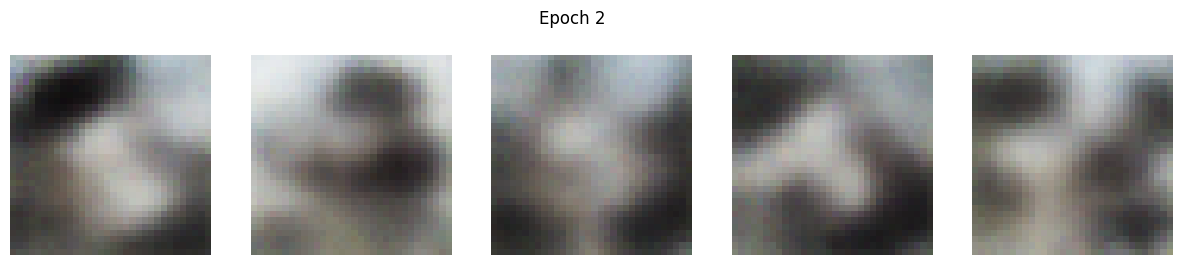

391/391 [==============================] - 157s 402ms/step - loss: 621.9258 - reconstruction_loss: 615.5056 - kl_loss: 1.8706 - perceptual_loss: 13.1854 - val_loss: 607.9169 - val_reconstruction_loss: 606.2521 - val_kl_loss: 2.0531 - val_perceptual_loss: 14.5943
Epoch 3/30
391/391 [==============================] - 156s 400ms/step - loss: 608.3039 - reconstruction_loss: 602.7722 - kl_loss: 2.3030 - perceptual_loss: 12.8796 - val_loss: 598.4758 - val_reconstruction_loss: 596.8194 - val_kl_loss: 2.4112 - val_perceptual_loss: 14.1524
Epoch 4/30
391/391 [==============================] - ETA: 0s - loss: 600.2116 - reconstruction_loss: 596.0665 - kl_loss: 2.5052 - perceptual_loss: 12.5575

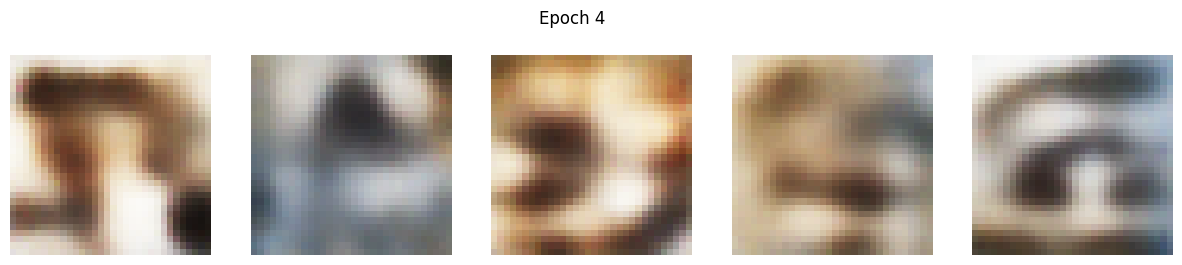

391/391 [==============================] - 156s 400ms/step - loss: 600.2084 - reconstruction_loss: 596.0665 - kl_loss: 2.5052 - perceptual_loss: 12.5575 - val_loss: 592.2426 - val_reconstruction_loss: 590.6016 - val_kl_loss: 2.5736 - val_perceptual_loss: 13.8356
Epoch 5/30
391/391 [==============================] - 156s 400ms/step - loss: 595.6064 - reconstruction_loss: 592.3048 - kl_loss: 2.6174 - perceptual_loss: 12.2787 - val_loss: 587.5741 - val_reconstruction_loss: 585.9565 - val_kl_loss: 2.6961 - val_perceptual_loss: 13.4796
Epoch 6/30
391/391 [==============================] - ETA: 0s - loss: 593.3048 - reconstruction_loss: 589.8871 - kl_loss: 2.6997 - perceptual_loss: 12.0633

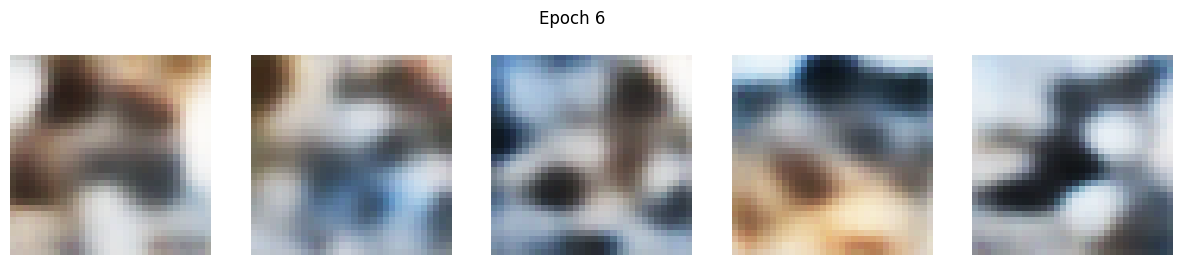

391/391 [==============================] - 156s 400ms/step - loss: 593.3037 - reconstruction_loss: 589.8871 - kl_loss: 2.6997 - perceptual_loss: 12.0633 - val_loss: 584.5967 - val_reconstruction_loss: 583.0073 - val_kl_loss: 2.7727 - val_perceptual_loss: 13.1210
Epoch 7/30
391/391 [==============================] - 156s 399ms/step - loss: 591.6533 - reconstruction_loss: 588.1871 - kl_loss: 2.7731 - perceptual_loss: 11.8621 - val_loss: 581.5883 - val_reconstruction_loss: 580.0272 - val_kl_loss: 2.8616 - val_perceptual_loss: 12.7496
Epoch 8/30
391/391 [==============================] - ETA: 0s - loss: 589.8470 - reconstruction_loss: 586.5476 - kl_loss: 2.8540 - perceptual_loss: 11.6631

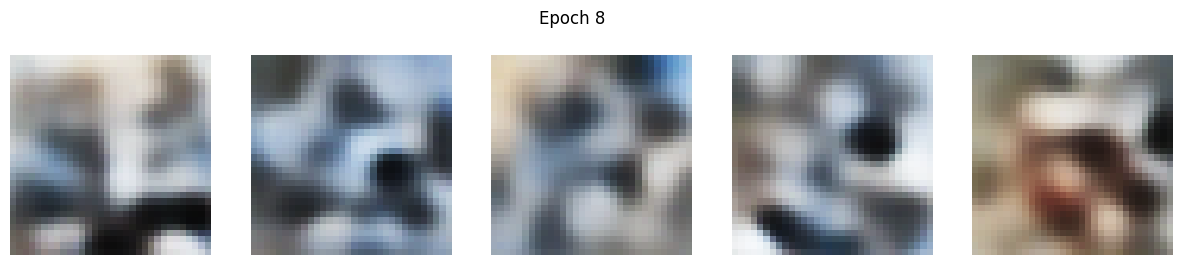

391/391 [==============================] - 156s 399ms/step - loss: 589.8463 - reconstruction_loss: 586.5476 - kl_loss: 2.8540 - perceptual_loss: 11.6631 - val_loss: 580.6814 - val_reconstruction_loss: 579.1343 - val_kl_loss: 2.9600 - val_perceptual_loss: 12.5102
Epoch 9/30
391/391 [==============================] - 156s 399ms/step - loss: 588.8148 - reconstruction_loss: 585.2533 - kl_loss: 2.9480 - perceptual_loss: 11.4842 - val_loss: 579.2394 - val_reconstruction_loss: 577.7078 - val_kl_loss: 2.9565 - val_perceptual_loss: 12.3595
Epoch 10/30
391/391 [==============================] - ETA: 0s - loss: 588.3302 - reconstruction_loss: 584.1086 - kl_loss: 3.0600 - perceptual_loss: 11.3524

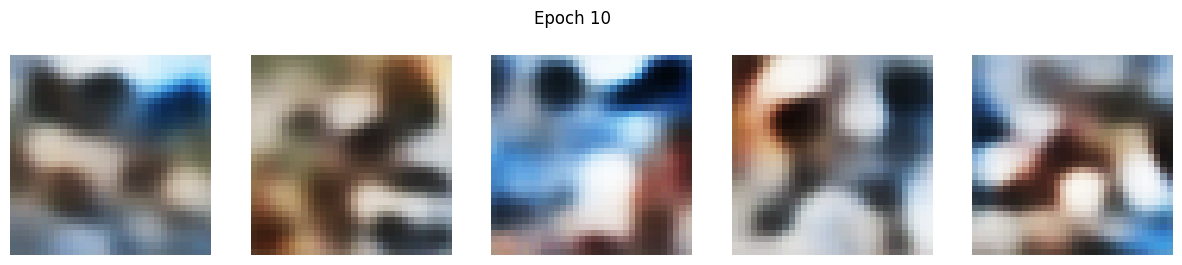

391/391 [==============================] - 156s 400ms/step - loss: 588.3273 - reconstruction_loss: 584.1086 - kl_loss: 3.0600 - perceptual_loss: 11.3524 - val_loss: 577.4030 - val_reconstruction_loss: 575.8680 - val_kl_loss: 3.2287 - val_perceptual_loss: 12.1201
Epoch 11/30
391/391 [==============================] - 156s 399ms/step - loss: 585.9018 - reconstruction_loss: 582.8339 - kl_loss: 3.1947 - perceptual_loss: 11.1910 - val_loss: 576.9393 - val_reconstruction_loss: 575.4097 - val_kl_loss: 3.2635 - val_perceptual_loss: 12.0328
Epoch 12/30
391/391 [==============================] - ETA: 0s - loss: 585.5945 - reconstruction_loss: 581.9682 - kl_loss: 3.2815 - perceptual_loss: 11.0626

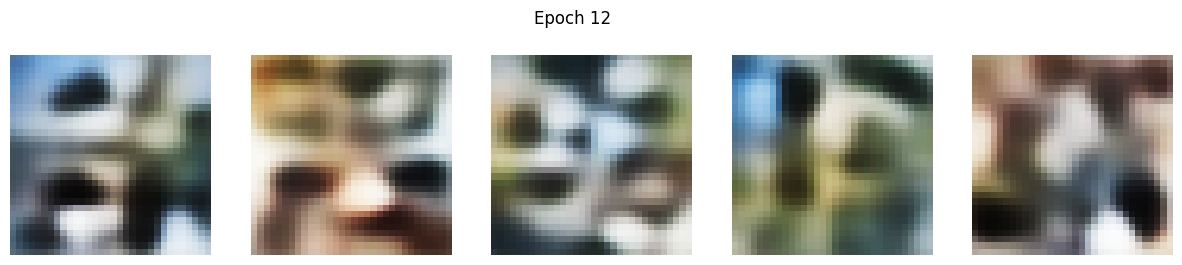

391/391 [==============================] - 156s 399ms/step - loss: 585.5932 - reconstruction_loss: 581.9682 - kl_loss: 3.2815 - perceptual_loss: 11.0626 - val_loss: 575.2954 - val_reconstruction_loss: 573.8064 - val_kl_loss: 3.1043 - val_perceptual_loss: 11.7858
Epoch 13/30
391/391 [==============================] - 156s 399ms/step - loss: 584.6483 - reconstruction_loss: 581.3154 - kl_loss: 3.3629 - perceptual_loss: 10.9714 - val_loss: 574.5713 - val_reconstruction_loss: 573.0737 - val_kl_loss: 3.2727 - val_perceptual_loss: 11.7029
Epoch 14/30
391/391 [==============================] - ETA: 0s - loss: 583.3337 - reconstruction_loss: 580.7524 - kl_loss: 3.4700 - perceptual_loss: 10.8987

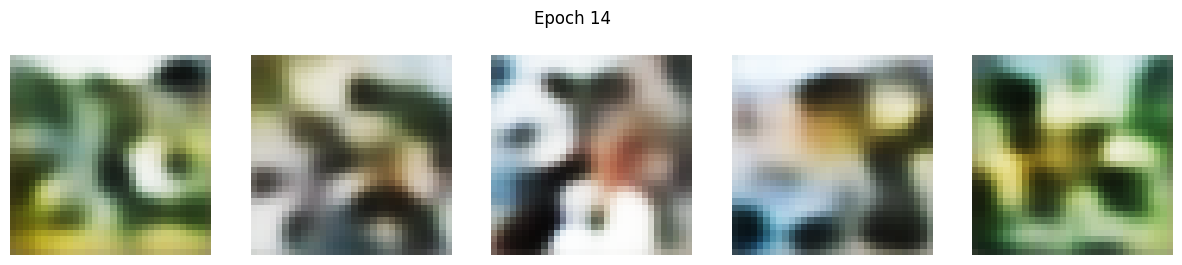

391/391 [==============================] - 156s 399ms/step - loss: 583.3352 - reconstruction_loss: 580.7524 - kl_loss: 3.4700 - perceptual_loss: 10.8987 - val_loss: 573.7405 - val_reconstruction_loss: 572.2382 - val_kl_loss: 3.4531 - val_perceptual_loss: 11.5697
Epoch 15/30
391/391 [==============================] - 156s 399ms/step - loss: 583.2137 - reconstruction_loss: 580.2470 - kl_loss: 3.5742 - perceptual_loss: 10.8351 - val_loss: 573.5504 - val_reconstruction_loss: 572.0328 - val_kl_loss: 3.6586 - val_perceptual_loss: 11.5174
Epoch 16/30
391/391 [==============================] - ETA: 0s - loss: 583.0138 - reconstruction_loss: 579.8372 - kl_loss: 3.7385 - perceptual_loss: 10.7870

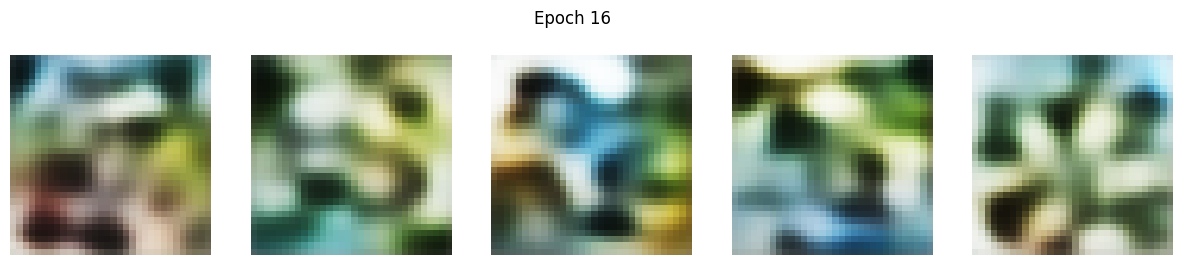

391/391 [==============================] - 156s 400ms/step - loss: 583.0139 - reconstruction_loss: 579.8372 - kl_loss: 3.7385 - perceptual_loss: 10.7870 - val_loss: 573.2557 - val_reconstruction_loss: 571.7323 - val_kl_loss: 3.7587 - val_perceptual_loss: 11.4761
Epoch 17/30
391/391 [==============================] - 156s 399ms/step - loss: 582.7484 - reconstruction_loss: 579.6403 - kl_loss: 3.8760 - perceptual_loss: 10.7705 - val_loss: 572.8666 - val_reconstruction_loss: 571.3290 - val_kl_loss: 3.9247 - val_perceptual_loss: 11.4521
Epoch 18/30
391/391 [==============================] - ETA: 0s - loss: 583.1411 - reconstruction_loss: 579.5645 - kl_loss: 4.0257 - perceptual_loss: 10.8009

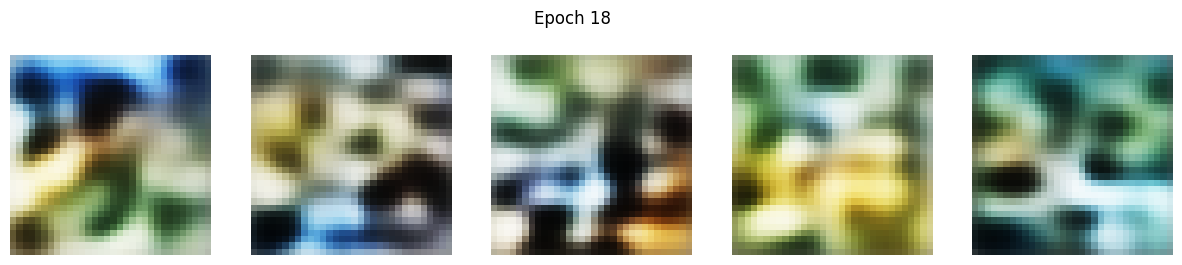

391/391 [==============================] - 156s 399ms/step - loss: 583.1404 - reconstruction_loss: 579.5645 - kl_loss: 4.0257 - perceptual_loss: 10.8009 - val_loss: 572.8153 - val_reconstruction_loss: 571.2595 - val_kl_loss: 4.0473 - val_perceptual_loss: 11.5105
Epoch 19/30
391/391 [==============================] - 156s 399ms/step - loss: 582.1110 - reconstruction_loss: 579.8130 - kl_loss: 4.1327 - perceptual_loss: 10.8880 - val_loss: 573.0327 - val_reconstruction_loss: 571.4570 - val_kl_loss: 4.1430 - val_perceptual_loss: 11.6138
Epoch 20/30
391/391 [==============================] - ETA: 0s - loss: 583.6585 - reconstruction_loss: 580.3036 - kl_loss: 4.2072 - perceptual_loss: 11.0150

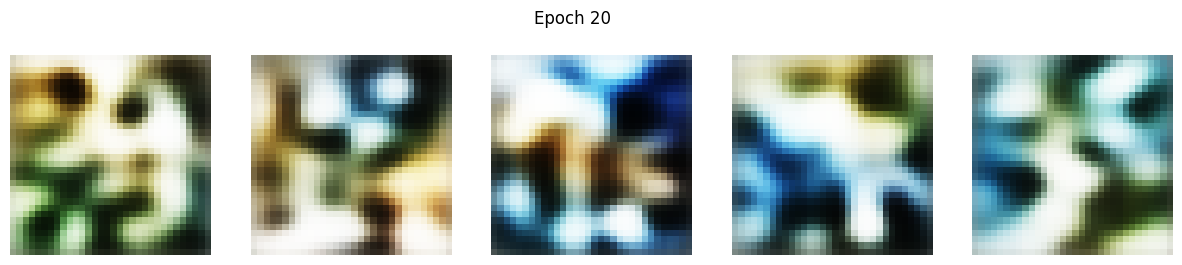

391/391 [==============================] - 156s 400ms/step - loss: 583.6585 - reconstruction_loss: 580.3036 - kl_loss: 4.2072 - perceptual_loss: 11.0150 - val_loss: 573.7955 - val_reconstruction_loss: 572.1935 - val_kl_loss: 4.1805 - val_perceptual_loss: 11.8399
Epoch 21/30
391/391 [==============================] - 156s 399ms/step - loss: 584.3947 - reconstruction_loss: 581.2065 - kl_loss: 4.2467 - perceptual_loss: 11.1840 - val_loss: 574.7782 - val_reconstruction_loss: 573.1507 - val_kl_loss: 4.2121 - val_perceptual_loss: 12.0629
Epoch 22/30
391/391 [==============================] - ETA: 0s - loss: 585.6628 - reconstruction_loss: 582.7112 - kl_loss: 4.2513 - perceptual_loss: 11.4028

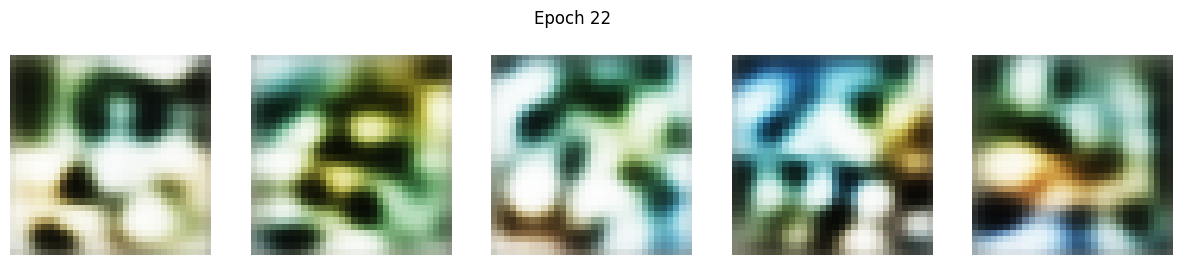

391/391 [==============================] - 156s 399ms/step - loss: 585.6640 - reconstruction_loss: 582.7112 - kl_loss: 4.2513 - perceptual_loss: 11.4028 - val_loss: 576.7683 - val_reconstruction_loss: 575.1136 - val_kl_loss: 4.1615 - val_perceptual_loss: 12.3859
Epoch 23/30
391/391 [==============================] - 156s 399ms/step - loss: 587.8837 - reconstruction_loss: 585.1664 - kl_loss: 4.1605 - perceptual_loss: 11.6617 - val_loss: 580.1395 - val_reconstruction_loss: 578.4630 - val_kl_loss: 4.0062 - val_perceptual_loss: 12.7583
Epoch 24/30
391/391 [==============================] - ETA: 0s - loss: 591.3005 - reconstruction_loss: 589.3681 - kl_loss: 3.9085 - perceptual_loss: 11.9925

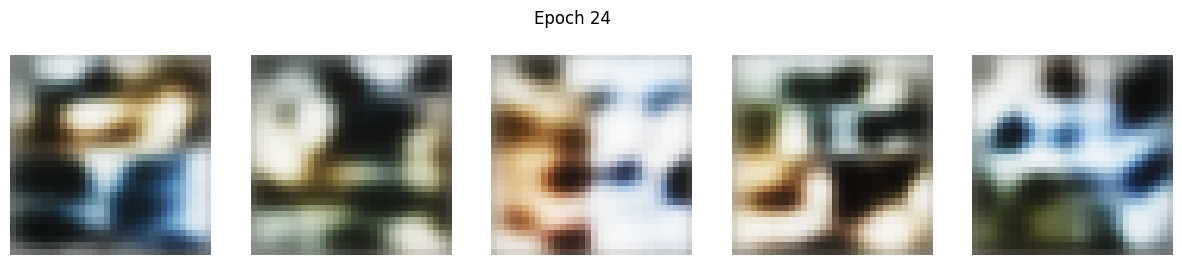

391/391 [==============================] - 156s 400ms/step - loss: 591.3040 - reconstruction_loss: 589.3681 - kl_loss: 3.9085 - perceptual_loss: 11.9925 - val_loss: 587.3636 - val_reconstruction_loss: 585.6656 - val_kl_loss: 3.6641 - val_perceptual_loss: 13.3162
Epoch 25/30
391/391 [==============================] - 156s 399ms/step - loss: 598.7984 - reconstruction_loss: 599.6057 - kl_loss: 3.4158 - perceptual_loss: 12.4809 - val_loss: 610.5173 - val_reconstruction_loss: 608.8074 - val_kl_loss: 3.0048 - val_perceptual_loss: 14.0950
Epoch 26/30
391/391 [==============================] - ETA: 0s - loss: 627.3433 - reconstruction_loss: 637.8173 - kl_loss: 2.5281 - perceptual_loss: 13.1458

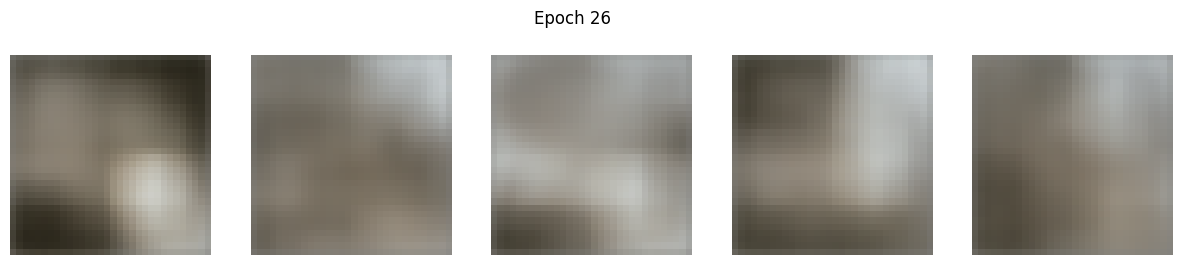

391/391 [==============================] - 156s 399ms/step - loss: 627.3763 - reconstruction_loss: 637.8173 - kl_loss: 2.5281 - perceptual_loss: 13.1458 - val_loss: 643.5614 - val_reconstruction_loss: 641.8441 - val_kl_loss: 2.2945 - val_perceptual_loss: 14.8790
Epoch 27/30
391/391 [==============================] - 156s 399ms/step - loss: 630.6199 - reconstruction_loss: 620.7294 - kl_loss: 2.8411 - perceptual_loss: 13.1271 - val_loss: 608.6049 - val_reconstruction_loss: 606.8483 - val_kl_loss: 3.2024 - val_perceptual_loss: 14.3635
Epoch 28/30
391/391 [==============================] - ETA: 0s - loss: 610.6274 - reconstruction_loss: 606.1765 - kl_loss: 3.3996 - perceptual_loss: 12.7496

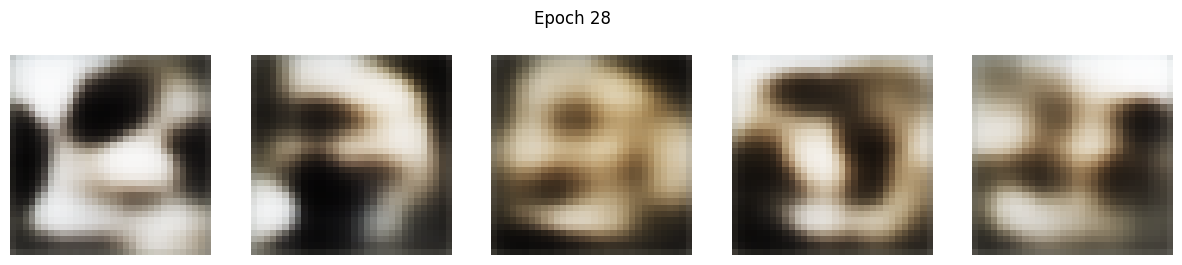

391/391 [==============================] - 156s 399ms/step - loss: 610.6236 - reconstruction_loss: 606.1765 - kl_loss: 3.3996 - perceptual_loss: 12.7496 - val_loss: 601.0587 - val_reconstruction_loss: 599.3249 - val_kl_loss: 3.3428 - val_perceptual_loss: 13.9948
Epoch 29/30
391/391 [==============================] - 156s 399ms/step - loss: 604.1063 - reconstruction_loss: 599.2421 - kl_loss: 3.5343 - perceptual_loss: 12.5309 - val_loss: 591.8873 - val_reconstruction_loss: 590.1365 - val_kl_loss: 3.8335 - val_perceptual_loss: 13.6738
Epoch 30/30
391/391 [==============================] - ETA: 0s - loss: 600.0976 - reconstruction_loss: 596.2254 - kl_loss: 3.6330 - perceptual_loss: 12.3924

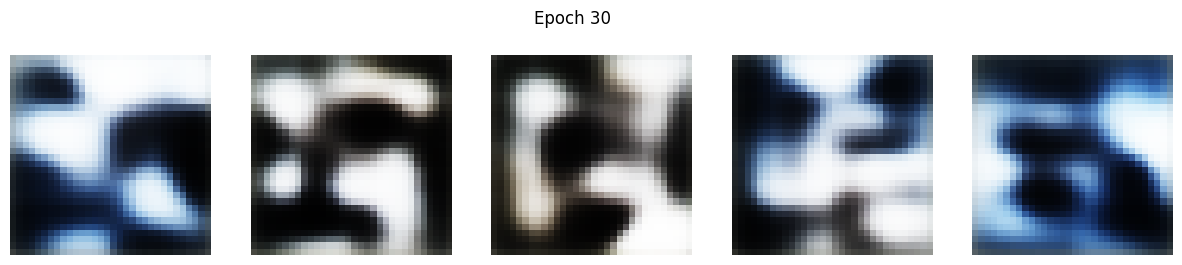

391/391 [==============================] - 156s 400ms/step - loss: 600.0956 - reconstruction_loss: 596.2254 - kl_loss: 3.6330 - perceptual_loss: 12.3924 - val_loss: 589.5316 - val_reconstruction_loss: 587.7971 - val_kl_loss: 3.8019 - val_perceptual_loss: 13.5425


In [ ]:
# Training
history = vae_model.fit(
    x_train,
    x_train,  # VAE needs same input/output for training
    epochs=30,
    batch_size=128,
    validation_data=(x_test, x_test),  # Proper validation data format
    callbacks=[
        GenerateImagesCallback(
            vae_model,
            latent_dim=latent_dim,
            interval=2,
            n_images=5
        )
    ]
)

#### Оптимізація VAE з використанням ResNet і Attention 

##### Порівняння з попередніми кроками:

1. **Архітектура енкодера**:
   - **Step 1–4**: Базова структура енкодера з Conv2D і BatchNormalization.
   - **Step 5**:
     - Додано **ResidualBlock**, що підвищує стабільність і покращує витягування ознак.
     - Додано **AttentionBlock** для фільтрів ≥256, що покращує фокус на важливих просторових областях.

2. **Декодер**:
   - В Step 5 використовується аналогічний підхід із ResNet-стилем для декодування.
   - Attention застосовано й у декодері для глибоких шарів.

3. **Втрати**:
   - **Step 4**: Використовувалася MSE, L1 і KL-дивергенція.
   - **Step 5**:
     - Додано **perceptual loss** (на основі VGG16) для покращення візуальної якості реконструкції.
     - Додано **total variation loss** для згладжування текстур зображень.
     - Використано **обмеження градієнтів** для стабілізації навчання.

4. **Латентний простір**:
   - Розмір збільшено до 1024.

5. **Оптимізація**:
   - Використовується **CosineDecayRestarts** для плавного зменшення швидкості навчання.
   - AdamW з **ваговою регуляризацією**.

##### Очікуваний ефект:
- **Переваги**:
  - ResNet-блоки зменшують проблему згасання градієнтів і покращують генерацію високорівневих ознак.
  - Attention допомагає моделі краще розпізнавати важливі частини зображень.
  - Perceptual loss підвищує реалістичність реконструкцій.
  - Стабільне навчання завдяки обмеженню градієнтів і регуляризації.
  
- **Ризики**:
  - Перенавчання через складну архітектуру.
  - Висока обчислювальна вартість через ResNet і Attention.

##### Аналіз результатів:
1. **Якість генерацій**:
   - Зображення епох показують поступове покращення структури та кольорів.
   - Перша епоха створює значно розмиті зображення, але на пізніх етапах є чіткіші об'єкти.
   
2. **Логи навчання**:
   - Значення **perceptual loss** поступово зменшується, що свідчить про покращення візуальної схожості.
   - **KL-дивергенція** зростає, що вказує на кращу регуляризацію латентного простору.
   - **Reconstruction loss** зменшується, але залишається значним через складність даних.

### STEP 6

#### Оптимізація Step 6: Зменшення латентного простору та LeakyReLU

##### Порівняння з попередніми кроками:

1. **Архітектура енкодера**:
   - Зменшено розмір латентного простору:  
     **Step 5**: \( \text{latent\_dim} = 1024 \)  
     **Step 6**: \( \text{latent\_dim} = 256 \).
   - Використано **LeakyReLU (alpha=0.2)** замість звичайного ReLU для активації:
     ```python
     x = layers.LeakyReLU(alpha=0.2)(x)
     ```

2. **Реконструктивна втрата**:
   - Додавання комбінованої метрики **MSE + L1 (MAE)**:
     ```python
     reconstruction_loss = (1.0 - alpha) * MSE + alpha * L1
     ```

3. **Оптимізатор**:
   - Замість AdamW (Step 5), використано **Adam** з **PolynomialDecay** для динамічного навчання.

4. **Callback для моніторингу навчання**:
   - Додано **HistoryLogger** для відстеження та візуалізації метрик.

##### Очікуваний ефект:
- **Переваги**:
  - Зменшення латентного простору допомагає моделі краще узагальнювати та генерувати менш спотворені зображення.
  - LeakyReLU може уникнути проблеми "вмирання нейронів" (dead neurons), забезпечуючи стабільніше навчання.
  - MSE + L1 робить реконструкцію чутливішою до локальних і глобальних структур.
  - HistoryLogger надає детальну аналітику тренувального процесу.

- **Ризики**:
  - Занадто малий латентний простір може втратити важливі ознаки зображень.
  - Збільшення кількості параметрів через Dropout може сповільнити збіжність.

##### Висновки:
Step 6 фокусується на компресійному балансі латентного простору та оптимізації реконструкції, що покращує генерацію та якість відновлення.

x_train.shape = (50000, 32, 32, 3)
x_test.shape = (10000, 32, 32, 3)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6             │ (None, 32, 32, 3)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_15 (Conv2D)        │ (None, 16, 16, 128)    │          3,456 │ input_layer_6[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_30    │ (None, 16, 16, 128)    │            512 │ conv2d_15[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ leaky_re_lu_30            │ (None, 16, 16, 128)    │              0 │ batch_normalization_3… │
│ (LeakyReLU)               │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_15 (Dropout)      │ (None, 16, 16, 128)    │              0 │ leaky_re_lu_30[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_16 (Conv2D)        │ (None, 8, 8, 256)      │        294,912 │ dropout_15[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_31    │ (None, 8, 8, 256)      │          1,024 │ conv2d_16[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ leaky_re_lu_31            │ (None, 8, 8, 256)      │              0 │ batch_normalization_3… │
│ (LeakyReLU)               │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_16 (Dropout)      │ (None, 8, 8, 256)      │              0 │ leaky_re_lu_31[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_17 (Conv2D)        │ (None, 4, 4, 512)      │      1,179,648 │ dropout_16[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_32    │ (None, 4, 4, 512)      │          2,048 │ conv2d_17[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ leaky_re_lu_32            │ (None, 4, 4, 512)      │              0 │ batch_normalization_3… │
│ (LeakyReLU)               │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_17 (Dropout)      │ (None, 4, 4, 512)      │              0 │ leaky_re_lu_32[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_18 (Conv2D)        │ (None, 2, 2, 512)      │      2,359,296 │ dropout_17[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_33    │ (None, 2, 2, 512)      │          2,048 │ conv2d_18[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ leaky_re_lu_33       

 Total params: 7,254,400 (27.67 MB)

 Trainable params: 7,250,560 (27.66 MB)

 Non-trainable params: 3,840 (15.00 KB)

Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)           │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_3 (Reshape)                  │ (None, 1, 1, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_18                  │ (None, 2, 2, 512)           │       2,359,296 │
│ (Conv2DTranspose)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_35               │ (None, 2, 2, 512)           │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_35 (LeakyReLU)           │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_19                  │ (None, 4, 4, 512)           │       2,359,296 │
│ (Conv2DTranspose)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_36               │ (None, 4, 4, 512)           │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_36 (LeakyReLU)           │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_20                  │ (None, 8, 8, 512)           │       2,359,296 │
│ (Conv2DTranspose)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_37               │ (None, 8, 8, 512)           │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_37 (LeakyReLU)           │ (None, 8, 8, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_21                  │ (None, 16, 16, 256)         │       1,179,648 │
│ (Conv2DTranspose)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_38               │ (None, 16, 16, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_38 (LeakyReLU)           │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_22                  │ (None, 32, 32, 128)         │         294,912 │
│ (Conv2DTranspose)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_39               │ (None, 32, 32, 128)         │             5

 Total params: 8,695,171 (33.17 MB)

 Trainable params: 8,691,331 (33.15 MB)

 Non-trainable params: 3,840 (15.00 KB)

Epoch 1/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 147s 2s/step - kl_loss: 40.3877 - loss: 376.8734 - reconstruction_loss: 336.4857 - val_kl_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_total_loss: 0.0000e+00
Epoch 2/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 35s 672ms/step - kl_loss: 11.4414 - loss: 278.0082 - reconstruction_loss: 266.5668 - val_kl_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_total_loss: 0.0000e+00
Epoch 3/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 41s 670ms/step - kl_loss: 14.0693 - loss: 256.2124 - reconstruction_loss: 242.1431 - val_kl_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_total_loss: 0.0000e+00
Epoch 4/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 33s 672ms/step - kl_loss: 16.9887 - loss: 246.8671 - reconstruction_loss: 229.8784 - val_kl_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_total_loss: 0.0000e+00
Epoch 5/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 41s 669ms/step - kl_loss: 17.3026 - loss: 241.9351 - reconstruction_loss: 224.6325 - val_kl_loss: 0.000

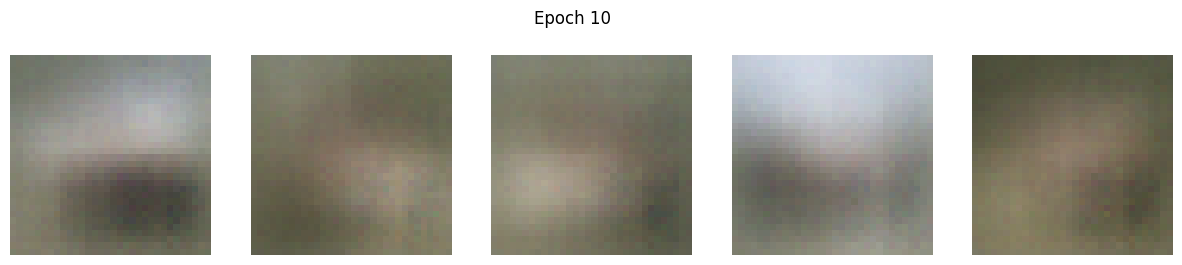

49/49 ━━━━━━━━━━━━━━━━━━━━ 42s 686ms/step - kl_loss: 20.1626 - loss: 229.2796 - reconstruction_loss: 209.1171 - val_kl_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_total_loss: 0.0000e+00
Epoch 11/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 33s 669ms/step - kl_loss: 20.1184 - loss: 227.1215 - reconstruction_loss: 207.0031 - val_kl_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_total_loss: 0.0000e+00
Epoch 12/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 33s 667ms/step - kl_loss: 19.8971 - loss: 225.6771 - reconstruction_loss: 205.7799 - val_kl_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_total_loss: 0.0000e+00
Epoch 13/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 41s 670ms/step - kl_loss: 19.9434 - loss: 223.6442 - reconstruction_loss: 203.7009 - val_kl_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_total_loss: 0.0000e+00
Epoch 14/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 41s 669ms/step - kl_loss: 20.0019 - loss: 220.8636 - reconstruction_loss: 200.8617 - val_kl_loss: 0.0000e+00 

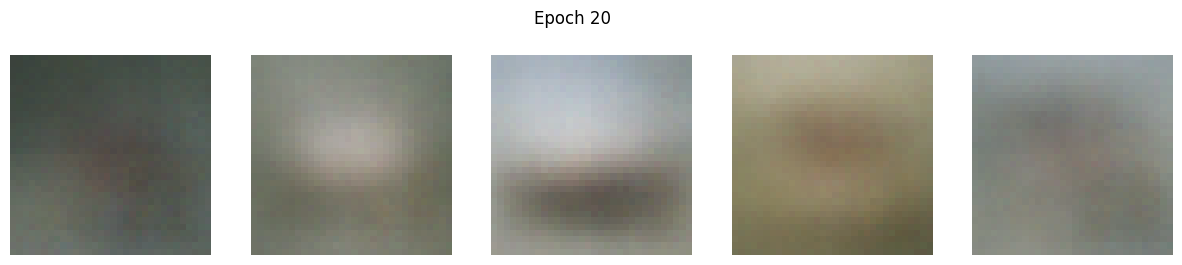

49/49 ━━━━━━━━━━━━━━━━━━━━ 33s 671ms/step - kl_loss: 20.0835 - loss: 208.5539 - reconstruction_loss: 188.4704 - val_kl_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_total_loss: 0.0000e+00
Epoch 21/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 41s 668ms/step - kl_loss: 19.9882 - loss: 207.7642 - reconstruction_loss: 187.7761 - val_kl_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_total_loss: 0.0000e+00
Epoch 22/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 41s 669ms/step - kl_loss: 19.9624 - loss: 206.2142 - reconstruction_loss: 186.2518 - val_kl_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_total_loss: 0.0000e+00
Epoch 23/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 41s 667ms/step - kl_loss: 20.0487 - loss: 204.6939 - reconstruction_loss: 184.6452 - val_kl_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_total_loss: 0.0000e+00
Epoch 24/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 41s 668ms/step - kl_loss: 19.9457 - loss: 203.6409 - reconstruction_loss: 183.6952 - val_kl_loss: 0.0000e+00 

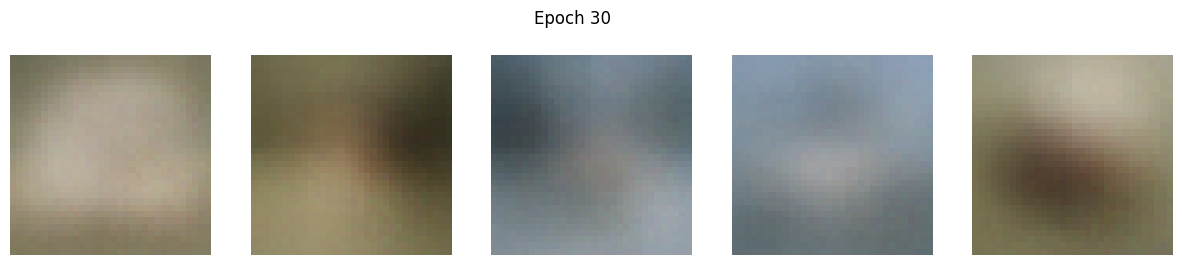

49/49 ━━━━━━━━━━━━━━━━━━━━ 41s 667ms/step - kl_loss: 19.5902 - loss: 198.9944 - reconstruction_loss: 179.4042 - val_kl_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_total_loss: 0.0000e+00
Epoch 31/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 41s 672ms/step - kl_loss: 19.5135 - loss: 198.2266 - reconstruction_loss: 178.7131 - val_kl_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_total_loss: 0.0000e+00
Epoch 32/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 41s 665ms/step - kl_loss: 19.4118 - loss: 198.0865 - reconstruction_loss: 178.6747 - val_kl_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_total_loss: 0.0000e+00
Epoch 33/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 33s 672ms/step - kl_loss: 19.3316 - loss: 197.1689 - reconstruction_loss: 177.8373 - val_kl_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_total_loss: 0.0000e+00
Epoch 34/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 41s 667ms/step - kl_loss: 19.2359 - loss: 196.7194 - reconstruction_loss: 177.4835 - val_kl_loss: 0.0000e+00 

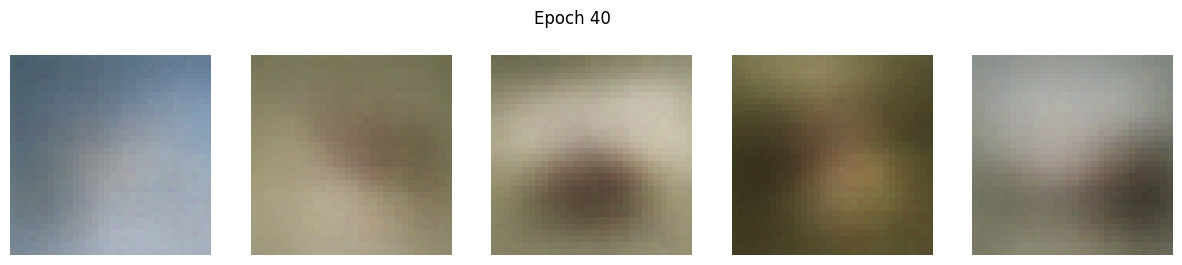

49/49 ━━━━━━━━━━━━━━━━━━━━ 41s 669ms/step - kl_loss: 18.9551 - loss: 194.6512 - reconstruction_loss: 175.6961 - val_kl_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_total_loss: 0.0000e+00
Epoch 41/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 41s 671ms/step - kl_loss: 18.9324 - loss: 194.5649 - reconstruction_loss: 175.6325 - val_kl_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_total_loss: 0.0000e+00
Epoch 42/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 41s 669ms/step - kl_loss: 18.9368 - loss: 194.4739 - reconstruction_loss: 175.5371 - val_kl_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_total_loss: 0.0000e+00
Epoch 43/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 41s 670ms/step - kl_loss: 18.9163 - loss: 194.0179 - reconstruction_loss: 175.1016 - val_kl_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_total_loss: 0.0000e+00
Epoch 44/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 33s 668ms/step - kl_loss: 18.8946 - loss: 193.6152 - reconstruction_loss: 174.7206 - val_kl_loss: 0.0000e+00 

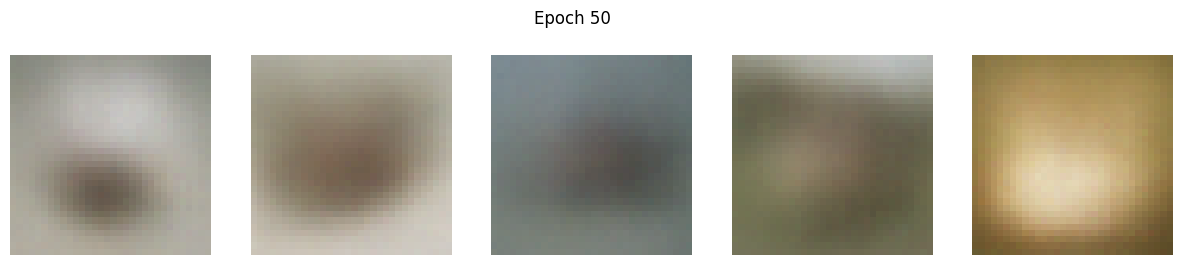

49/49 ━━━━━━━━━━━━━━━━━━━━ 41s 675ms/step - kl_loss: 19.0979 - loss: 191.9899 - reconstruction_loss: 172.8920 - val_kl_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_total_loss: 0.0000e+00
Epoch 51/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 41s 672ms/step - kl_loss: 19.0316 - loss: 191.8840 - reconstruction_loss: 172.8523 - val_kl_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_total_loss: 0.0000e+00
Epoch 52/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 33s 663ms/step - kl_loss: 19.0845 - loss: 191.4181 - reconstruction_loss: 172.3336 - val_kl_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_total_loss: 0.0000e+00
Epoch 53/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 41s 669ms/step - kl_loss: 19.1282 - loss: 191.5101 - reconstruction_loss: 172.3819 - val_kl_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_total_loss: 0.0000e+00
Epoch 54/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 41s 673ms/step - kl_loss: 19.1555 - loss: 191.1011 - reconstruction_loss: 171.9455 - val_kl_loss: 0.0000e+00 

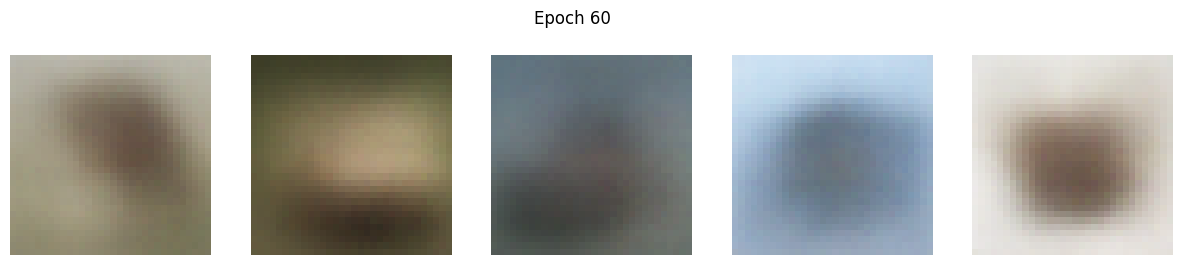

49/49 ━━━━━━━━━━━━━━━━━━━━ 41s 675ms/step - kl_loss: 19.3103 - loss: 189.7596 - reconstruction_loss: 170.4493 - val_kl_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_total_loss: 0.0000e+00
Epoch 61/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 41s 669ms/step - kl_loss: 19.3592 - loss: 189.7447 - reconstruction_loss: 170.3855 - val_kl_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_total_loss: 0.0000e+00
Epoch 62/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 41s 668ms/step - kl_loss: 19.3733 - loss: 189.3335 - reconstruction_loss: 169.9602 - val_kl_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_total_loss: 0.0000e+00
Epoch 63/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 33s 671ms/step - kl_loss: 19.3642 - loss: 189.5896 - reconstruction_loss: 170.2253 - val_kl_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_total_loss: 0.0000e+00
Epoch 64/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 33s 662ms/step - kl_loss: 19.4300 - loss: 189.2297 - reconstruction_loss: 169.7997 - val_kl_loss: 0.0000e+00 

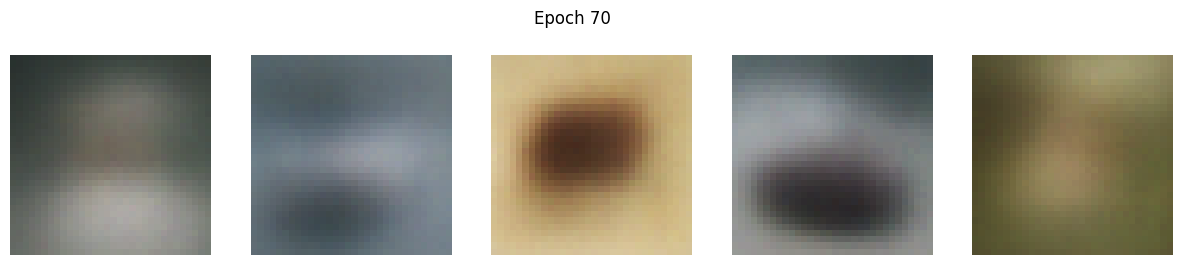

49/49 ━━━━━━━━━━━━━━━━━━━━ 41s 673ms/step - kl_loss: 19.5325 - loss: 188.4651 - reconstruction_loss: 168.9327 - val_kl_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_total_loss: 0.0000e+00
Epoch 71/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 41s 671ms/step - kl_loss: 19.5357 - loss: 188.3043 - reconstruction_loss: 168.7686 - val_kl_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_total_loss: 0.0000e+00
Epoch 72/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 41s 669ms/step - kl_loss: 19.5026 - loss: 188.2183 - reconstruction_loss: 168.7157 - val_kl_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_total_loss: 0.0000e+00
Epoch 73/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 33s 672ms/step - kl_loss: 19.4849 - loss: 187.8677 - reconstruction_loss: 168.3828 - val_kl_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_total_loss: 0.0000e+00
Epoch 74/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 33s 664ms/step - kl_loss: 19.4882 - loss: 188.0179 - reconstruction_loss: 168.5297 - val_kl_loss: 0.0000e+00 

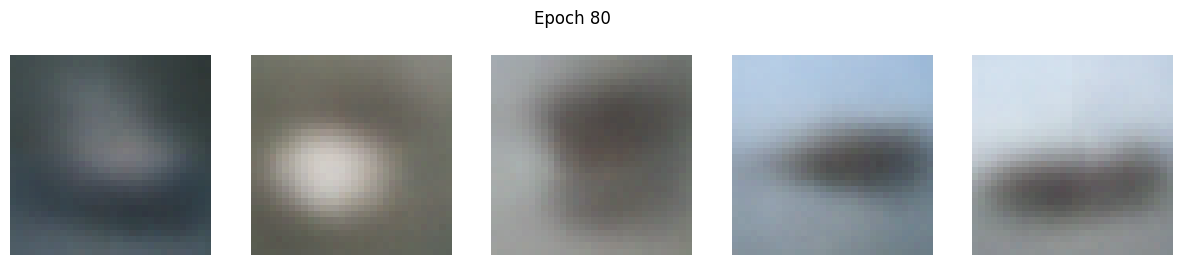

49/49 ━━━━━━━━━━━━━━━━━━━━ 41s 670ms/step - kl_loss: 19.5842 - loss: 187.3774 - reconstruction_loss: 167.7933 - val_kl_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_total_loss: 0.0000e+00
Epoch 81/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 41s 670ms/step - kl_loss: 19.5902 - loss: 187.0257 - reconstruction_loss: 167.4355 - val_kl_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_total_loss: 0.0000e+00
Epoch 82/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 41s 665ms/step - kl_loss: 19.5589 - loss: 186.4958 - reconstruction_loss: 166.9370 - val_kl_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_total_loss: 0.0000e+00
Epoch 83/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 41s 669ms/step - kl_loss: 19.5254 - loss: 186.6181 - reconstruction_loss: 167.0927 - val_kl_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_total_loss: 0.0000e+00
Epoch 84/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 41s 665ms/step - kl_loss: 19.5989 - loss: 186.9281 - reconstruction_loss: 167.3292 - val_kl_loss: 0.0000e+00 

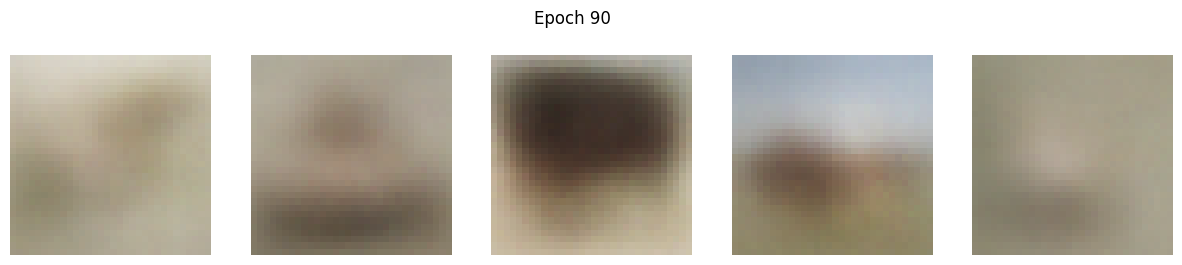

49/49 ━━━━━━━━━━━━━━━━━━━━ 41s 671ms/step - kl_loss: 19.6420 - loss: 186.3169 - reconstruction_loss: 166.6749 - val_kl_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_total_loss: 0.0000e+00
Epoch 91/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 41s 666ms/step - kl_loss: 19.6370 - loss: 186.1241 - reconstruction_loss: 166.4872 - val_kl_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_total_loss: 0.0000e+00
Epoch 92/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 41s 669ms/step - kl_loss: 19.6219 - loss: 186.4779 - reconstruction_loss: 166.8559 - val_kl_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_total_loss: 0.0000e+00
Epoch 93/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 33s 669ms/step - kl_loss: 19.6425 - loss: 186.4711 - reconstruction_loss: 166.8286 - val_kl_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_total_loss: 0.0000e+00
Epoch 94/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 32s 662ms/step - kl_loss: 19.6107 - loss: 185.7063 - reconstruction_loss: 166.0955 - val_kl_loss: 0.0000e+00 

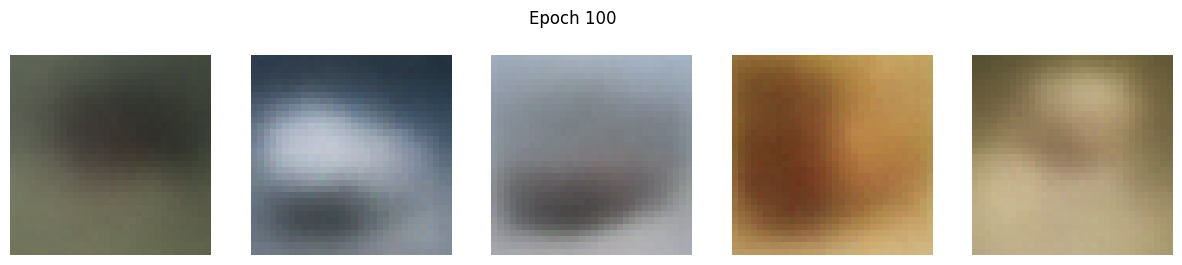

49/49 ━━━━━━━━━━━━━━━━━━━━ 33s 667ms/step - kl_loss: 19.6748 - loss: 186.1384 - reconstruction_loss: 166.4637 - val_kl_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_total_loss: 0.0000e+00


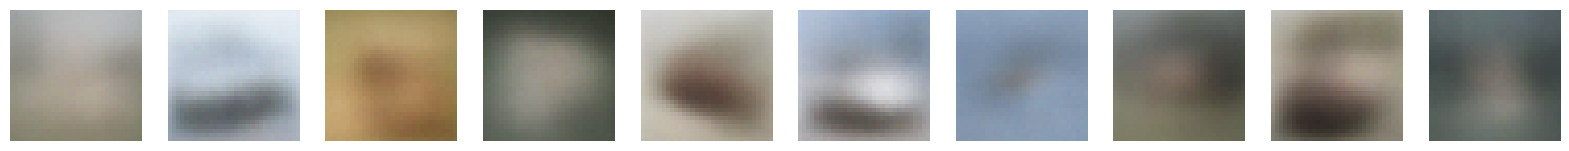

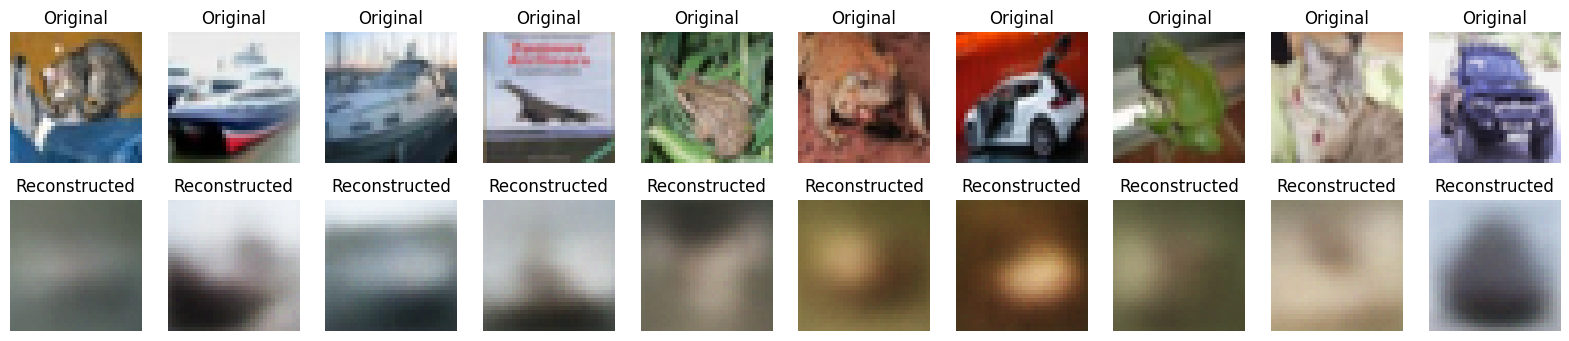

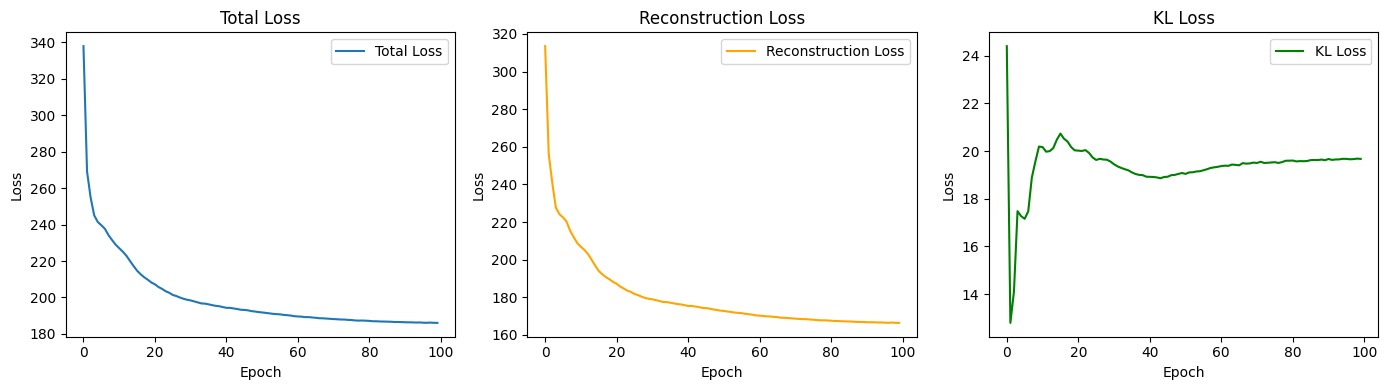

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np


# Параметри моделі
num_filters_encoder = [128, 256, 512, 512, 512]
num_filters_decoder = [512, 512, 512, 256, 128]
latent_dim = 256  # Зменешемо розмір латентного простору для кращої згенерованої якості

# Загружаємо датасет CIFAR-10
(x_train, _), (x_test, _) = keras.datasets.cifar10.load_data()
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

print("x_train.shape =", x_train.shape)
print("x_test.shape =", x_test.shape)


########################################
# 2. Побудова енкодера
########################################
encoder_inputs = keras.Input(shape=(32, 32, 3))

x = encoder_inputs
for filters in num_filters_encoder:
    x = layers.Conv2D(filters, kernel_size=3, strides=2, padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.LeakyReLU(alpha=0.2)(x)
    x = layers.Dropout(0.3)(x)

x = layers.Flatten()(x)
x = layers.Dense(1024, activation='relu')(x)

# Окремі вихідні шари для mu та logvar
mu = layers.Dense(latent_dim, name='mu')(x)
logvar = layers.Dense(latent_dim, name='logvar')(x)

# Функція для sampling (репараметризація)
def sampling(args):
    mu_, logvar_ = args
    epsilon = tf.random.normal(shape=tf.shape(mu_))
    return mu_ + tf.exp(0.5 * logvar_) * epsilon

z = layers.Lambda(sampling, name='z')([mu, logvar])

encoder = keras.Model(encoder_inputs, [mu, logvar, z], name='encoder')
encoder.summary()


########################################
# 3. Побудова декодера
########################################
latent_inputs = keras.Input(shape=(latent_dim,))

x = layers.Dense(1 * 1 * num_filters_decoder[0], activation='relu')(latent_inputs)
x = layers.Reshape((1, 1, num_filters_decoder[0]))(x)

for filters in num_filters_decoder:
    x = layers.Conv2DTranspose(filters, kernel_size=3, strides=2, padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.LeakyReLU(alpha=0.2)(x)

decoder_outputs = layers.Conv2DTranspose(3, kernel_size=3, padding='same', activation='sigmoid')(x)

decoder = keras.Model(latent_inputs, decoder_outputs, name='decoder')
decoder.summary()


class VAE(keras.Model):
    def __init__(self, encoder, decoder, alpha=0.5, **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.alpha = alpha

        self.total_loss_tracker = keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = keras.metrics.Mean(name="reconstruction_loss")
        self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")

    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
        ]

    def call(self, inputs, training=None, mask=None):
        mu_, logvar_, z_ = self.encoder(inputs)
        return self.decoder(z_)

    def train_step(self, data):
        if isinstance(data, tuple):
            data = data[0]

        with tf.GradientTape() as tape:
            mu_, logvar_, z_ = self.encoder(data, training=True)
            reconstruction = self.decoder(z_, training=True)

            # ========= MSE part =========
            mse_loss_fn = tf.keras.losses.MeanSquaredError()
            reconstruction_loss_mse = mse_loss_fn(data, reconstruction)

            # ========= L1 part (MAE) =========
            reconstruction_loss_l1 = tf.reduce_mean(
                tf.reduce_sum(
                    tf.abs(data - reconstruction),
                    axis=(1, 2, 3)
                )
            )

            # Комбінація MSE + L1
            reconstruction_loss = (1.0 - self.alpha) * reconstruction_loss_mse + self.alpha * reconstruction_loss_l1

            # KL-втрата
            kl_loss = 1 + logvar_ - tf.square(mu_) - tf.exp(logvar_)
            kl_loss = -0.5 * tf.reduce_mean(tf.reduce_sum(kl_loss, axis=1))

            total_loss = reconstruction_loss + kl_loss

        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)

        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }


# Створюємо модель
vae_model = VAE(encoder, decoder)

initial_learning_rate = 1e-4
lr_schedule = tf.keras.optimizers.schedules.PolynomialDecay(
    initial_learning_rate=initial_learning_rate,
    decay_steps=5000,  # Поступове зменшення протягом кількох кроків
    end_learning_rate=1e-6
)

optimizer = keras.optimizers.Adam(
    learning_rate=lr_schedule,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07
)

vae_model.compile(optimizer=optimizer, loss=lambda y_true, y_pred: 0.0)


###############################################
# 4. Callback для виводу зображень кожні 10 епох
###############################################
class GenerateImagesCallback(keras.callbacks.Callback):
    def __init__(self, model, latent_dim=256, interval=10, n_images=5):
        super().__init__()
        self._model = model
        self.latent_dim = latent_dim
        self.interval = interval
        self.n_images = n_images

    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % self.interval == 0:
            z_random = tf.random.normal(shape=(self.n_images, self.latent_dim))
            generated_images = self._model.decoder(z_random)

            print(f"\n[Callback] Згенеровані зображення після {epoch+1} епох:")
            plt.figure(figsize=(15, 3))
            for i in range(self.n_images):
                ax = plt.subplot(1, self.n_images, i + 1)
                plt.imshow(generated_images[i])
                plt.axis("off")
            plt.suptitle(f"Epoch {epoch+1}")
            plt.show()



# 4.1 Callback для відстеження історії навчання
class HistoryLogger(keras.callbacks.Callback):
    def on_train_begin(self, logs=None):
        self.losses = []
        self.reconstruction_losses = []
        self.kl_losses = []

    def on_epoch_end(self, epoch, logs=None):
        self.losses.append(logs['loss'])
        self.reconstruction_losses.append(logs['reconstruction_loss'])
        self.kl_losses.append(logs['kl_loss'])

    def plot_history(self):
        plt.figure(figsize=(14, 4))

        ax1 = plt.subplot(1, 3, 1)
        ax1.plot(self.losses, label='Total Loss')
        ax1.set_title('Total Loss')
        ax1.set_xlabel('Epoch')
        ax1.set_ylabel('Loss')
        ax1.legend()

        ax2 = plt.subplot(1, 3, 2)
        ax2.plot(self.reconstruction_losses, label='Reconstruction Loss', color='orange')
        ax2.set_title('Reconstruction Loss')
        ax2.set_xlabel('Epoch')
        ax2.set_ylabel('Loss')
        ax2.legend()

        ax3 = plt.subplot(1, 3, 3)
        ax3.plot(self.kl_losses, label='KL Loss', color='green')
        ax3.set_title('KL Loss')
        ax3.set_xlabel('Epoch')
        ax3.set_ylabel('Loss')
        ax3.legend()

        plt.tight_layout()
        plt.show()


history_logger = HistoryLogger()

# 5. Навчання
history = vae_model.fit(
    x_train, x_train,
    epochs=100,
    batch_size=1024,  
    validation_data=(x_test, x_test),
    callbacks=[GenerateImagesCallback(vae_model, latent_dim=latent_dim, interval=10, n_images=5),
               history_logger]
)

# Генеруємо зображення
n_to_generate = 10
z_sample = tf.random.normal(shape=(n_to_generate, latent_dim))
generated_images = vae_model.decoder(z_sample)

def plot_images(images, n=10):
    plt.figure(figsize=(20, 4))
    for i in range(n):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(images[i])
        plt.axis("off")
    plt.show()

plot_images(generated_images.numpy(), n=n_to_generate)


# Реконструкція
x_test_subset = x_test[:10]
mu, logvar, z = encoder(x_test_subset)
x_test_reconstructed = decoder(z)

def plot_original_vs_recon(original, reconstructed):
    n = len(original)
    plt.figure(figsize=(20, 4))
    for i in range(n):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(original[i])
        plt.title("Original")
        plt.axis("off")

        ax = plt.subplot(2, n, n + i + 1)
        plt.imshow(reconstructed[i])
        plt.title("Reconstructed")
        plt.axis("off")
    plt.show()

plot_original_vs_recon(x_test_subset, x_test_reconstructed.numpy())

history_logger.plot_history()


#### Висновок по Step 6

1. **Зниження латентного простору**:
   - Зменшення розміру латентного простору з 1024 до 256 дозволило створити більш компактне представлення, зменшивши ймовірність надмірної генерації шуму.
   - Однак, це призвело до втрати деяких деталей у реконструйованих зображеннях, особливо помітно на текстурах і дрібних елементах.

2. **Покращення регуляризації**:
   - Додавання Dropout і використання LeakyReLU сприяли уникненню перенавчання та поліпшили стійкість моделі.
   - Це видно із стабільного зниження загальних втрат і стабілізації KL-втрати на рівні ~19.

3. **Реконструкція зображень**:
   - Хоча загальна структура об'єктів зберігається, якість реконструкцій дещо знизилась порівняно з Step 5, оскільки були вилучені Residual та Attention блоки, а також перцептивна втрата.
   - Реконструкції виглядають більш "розмитими", що свідчить про недостатню деталізацію.

4. **Динаміка втрат**:
   - Графіки показують стабільне зниження загальної та реконструктивної втрат. Це свідчить про хорошу збіжність моделі.
   - KL-втрата стабілізувалась, що підтверджує адекватне розподілення латентного простору.

#### Загальний висновок

Оптимізація в Step 6 зробила модель більш стійкою до перенавчання та покращила збіжність завдяки регуляризації. Однак якість реконструкції зображень погіршилась через спрощення архітектури та вилучення перцептивної втрати. Для подальшого покращення якості рекомендую:
- Повернути перцептивну втрату з меншою вагою.
- Розглянути компромісний розмір латентного простору (наприклад, 512).
- Можливо, повернути Residual або Attention блоки в ключові місця архітектури.